<center>

# **FINAL PROJECT**

# **E-Commerce Customer Churn**

### **Irvan Elmahendra**
### **Annisa Dwi Ari**
### **Ifendo Mazenda Putra**

</center>

---

[E-Commerce Dataset](https://www.kaggle.com/ankitverma2010/ecommerce-customer-churn-analysis-and-prediction)


#   **Contents**

1. Domain & Data Understanding
2. Exploratory Data Analysis
  - Data Cleaning
  - Analysis, Insights
  - EDA Conclusion and Recommendation
3. Churn Predictive Model (Machine Learning)
  - Data Preperation
  - Model Benchmarking
  - Hyperparameter Tuning
  - Final Model Performance Analysis
  - ML Conclusion & Recomendation

# **Domain & Data Understanding**

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
from scipy.stats import shapiro, kstest
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_excel('ecom.xlsx')

##### **Domain**: E-Commerce | Customer Churn

### **Context**
Electronic commerce atau e-commerce adalah suatu proses terjadinya transaksi jual beli yang dalam prakteknya dilakukan secara online melalui media elektronik. Proses jual beli tidak lagi membutuhkan pertemuan tatap muka seperti pada toko konvensional. Marketplace merupakan salah satu model dari e-commerce yang bertindak sebagai perantara antara pembeli dan penjual.

E-commerce dalam beberapa tahun terakhir telah menunjukkan potensi yang besar bagi perekonomian nasional. Kementerian perdagangan mencatat, nilai transaksi hari belanja online nasional (harbolnas) 2023 sebesar Rp. 25,7 Triliun atau meningkat sebesar Rp.2,9 triliun dibandingkan Harbolnas 2022. Bank Indonesia memperkirakan nilai  transaksi e-commerce tumbuh 2,8% menjadi Rp.487 triliun pada 2024 dan 3,3% menjadi Rp. 504 triliun pada 2025.

Namun, dalam beberapa tahun terakhir pula telah banyak tumbuh e-commerce seperti Tokopedia, Bukalapak, Shopee, plasa.com, tokobagus dan sebagainya yang masing-masing memiliki strategi yang berbeda untuk merebut pasar di Indonesia. Banyaknya jumlah e-commerce tersebut, maka membuat tingkat persaingan antar e-commerce juga tinggi yang berakibat pada tutupnya beberapa e-commerce yang tidak mampu bersaing. Berdasarkan [Artikel](https://binus.ac.id/bandung/2019/08/persaingan-e-commerce-di-indonesia/), shopee menempati peringkat teratas, baik dari situs yang paling banyak dikunjungi, maupun tempat membeli barang disusul oleh tokopedia, lazada dan bukalapak.

### **Problem Statement**
Tingkat kehilangan customer, atau churn rate menjadi salah satu metrics yang penting bagi perusahaan. Tingginya churn rate bukan hanya dapat menghambat pencapaian target penjualan, tetapi juga merugikan profitabilitas perusahaan. Di era persaingan e-commerce yang semakin ketat, customer disuguhi dengan berbagai penawaran menarik dari platform lain. Fasilitas dan keuntungan yang kompetitif menjadi daya tarik utama bagi customer untuk beralih marketplace lain.

Dampak yang ditimbulkan dari churn rate yang tinggi tidak hanya secara finansial bagi perusahaan, diantaranya yaitu Penurunan pasar, kesulitan mendapatkan customer baru, reputasi perusahaan yang semakin menurun, tingginya biaya akusisi pelanggan atau biaya untuk mendapatkan pelanggan baru, gangguan terhadap operasional, dan beralihnya fokus dari inovasi baru.

Perusahaan sering kali mengalami tantangan dalam **mempertahankan pelanggan yang berpotensi churn**, dan juga tantangan dalam upaya untuk **mengalokasikan usaha retensi (diskon, kupon, dll) kepada pelanggan yang tepat**. Sebagai contoh, misalokasi pemberian diskon/kupon kepada pelanggan yang tidak tepat yang dapat mengakibatkan program retensi pelanggan terlalu mengeluarkan *cost* yang seharusnya tidak perlu dikeluarkan (tidak efektif). Sebaliknya, pelanggan yang berisiko churn namun tidak menerima usaha retensi mungkin akan meninggalkan perusahaan, sehingga menurunkan pendapatan perusahaan dan loyalitas pelanggan.

### **Goals**
Untuk mengatasi tantangan yang dihadapi, perusahaan perlu melaksanakan analisis terhadap setiap pelanggannya sehingga churn dapat dihindari. Langkah Analisa ini bertujuan untuk meminimalisir kemungkinan terjadinya churn dengan cara mengidentifikasi pola customer yang telah mengalami churn, dan merencanakan aksi yang dapat dilakukan untuk meminimalisir terjadinya churn berdasarkan pola customer yang ditemukan. Selain itu, perusahaan juga perlu untuk membangun model yang dapat memprediksi apakah customer tertentu akan mengalami churn. Dengan model prediktif ini, kita dapat mengidentifikasi pelanggan yang berpotensi churn dan mengambil aksi atau langkah pencegahan yang telah ditentukan pada analisa data yang akan dilakukan sebelumnya.

### **Analytic Approach**
Menganalisis data secara *descriptive* untuk dapat menemukan pola dari fitur-fitur customer yang ada, yang dapat memberikan wawasan (*Insight*) untuk menentukan aksi/pencegahan apa yang dapat diterapkan terhadap customer tersebut.

Selanjutnya, dibentuklah sebuah model prediktif yang dapat digunakan oleh perusahaan sebagai 'tool' untuk memprediksi apakah customer dengan feature tertentu akan churn/tidak. Untuk melakukan prediksi praktis/instan, dibentuk juga sebuah user interface dalam bentuk website agar model prediktif ini dapat digunakan/dinikmati oleh semua orang di perusahaan ini dan tidak hanya orang yang dapat mengoperasikan pemrograman python saja.

### **Metrics Evaluation**

Pada bagian pemodelan Machine Learning pada notebook ini, dibutuhkan evaluation metrics yang tepat. Mari kita breakdown confusion matrixnya terlebih dahulu:

1. **True Positives (TP)**: Customers that our model predicted will churn (1), and they actually did churn (1).
2. **True Negatives (TN)**: Customers that our model predicted will not churn (0), and they actually did not churn (0).
3. **False Positives (FP)**: Customers that our model predicted will churn (1), but they actually did not churn (0).
  - **Impact**: The company might allocate retention resources (discounts, coupons) to these customers unnecessarily. This can lead to increased costs without any actual benefit.
4. **False Negatives (FN)**: Customers that our model predicted will not churn (0), but they actually did churn (1).
  - **Impact**: These customers are not targeted with retention efforts, leading to a higher likelihood of them leaving our service(App), which directly impacts revenue. Acquiring new customers is needed which also generate costs.

Metrics to use : **F2 Score**

Impact dari False Negative adalah customer meninggalkan service/aplikasi kita, yang dimana hal tersebut sangat fatal dan berpengaruh langsung terhadap pendapatan perusahaan. Menurut [Artikel](https://hbr.org/2014/10/the-value-of-keeping-the-right-customers), Mengakuisisi customer baru akan memakan biaya 5 - 25 kali (Bergantung pada industrinya) lebih banyak dibandingkan mempertahankan customer yang sudah ada. Namun, memberikan resource retensi kepada pelanggan yang tidak seharusnya mendapatkannya (FP) juga mengakibatkan keluarnya *cost*, walaupun tidak sebesar kehilangan pelanggan. **F2 Score** adalah variasi dari skor F1, yang merupakan rata-rata harmonis dari presisi dan recall. Skor F2 memberikan penekanan lebih besar pada **False Negative** dibandingkan dengan **False Positive** sehingga cocok untuk kasus ini yang dimana impact dari False Negative lebih besar dan kritis.



  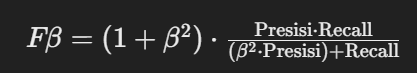

  Persamaan diatas adalah persamaan F score.
  - Jika β=1, kita mendapatkan F1 Score, yang di mana recall dan presisi diberi bobot yang sama.
  - Jika β>1, recall akan ditekankan lebih banyak daripada presisi. **Metrics yang kita gunakan adalah F2**. dalam F2 Score, nilai beta adalah β=2, sehingga recall diberi bobot 4 kali lebih besar (2^2 = 4)
  - Jika β<1, presisi ditekankan lebih banyak daripada recall.



### **Attributes Information**
| **Columns**   | **Description**                                                                                      |
|-------------|---------------------------------------------------------------------------------------------------|
| CustomerID | Unique customer ID |
| Churn | Churn Flag (0 : No Churn , 1 : Churn) |
| Tenure      | Tenure of customer in organization                                                                                           |
| Preferred Login Device      | Preferred login device of customer|
| CityTier | City tier|
| Warehouse To Home          | Distance in between warehouse to home of customer|
| Preferred Payment Mode     | Preferred payment method of customer|
| Number Of Device Registered  | Total number of deceives is registered on particular customer |
| Gender | Gender of customer |
| Hour Spend On App       | Number of hours spend on mobile application or website|
| Prefered Order Cat         | Total number of deceives is registered on particular customer                                   |
| Satisfaction Score      | Preferred order category of customer in last month                                                                           |
| Marital Status  | Satisfactory score of customer on service                                                                        |
| Number Of Address         | Marital status of customer|
| Complain | Any complaint has been raised in last month |
| Order Amount Hike From last Year | Percentage increases in order from last year |
| Coupon Used | Total number of coupon has been used in last month|
| Order Count | Total number of orders has been places in last month|
| DaySinceLastOrder |Day Since last order by customer|
| Cashback Amount | Average cashback in last month|

# **Exploratory Data Analysis**

## ***Data Cleaning***

In [ ]:
pd.DataFrame({
    'features': df.columns.values,
    'data_type': df.dtypes.values,
    'null_values': df.isna().mean().values * 100,
    'n_unique': df.nunique().values,
    'sample_unique': [df[col].unique() for col in df.columns]
})

,features,data_type,null_values,n_unique,sample_unique
0,CustomerID,int64,0.000000,5630,"[50001, 50002, 50003, 50004, 50005, 50006, 500..."
1,Churn,int64,0.000000,2,"[1, 0]"
2,Tenure,float64,4.689165,36,"[4.0, nan, 0.0, 13.0, 11.0, 9.0, 19.0, 20.0, 1..."
3,PreferredLoginDevice,object,0.000000,3,"[Mobile Phone, Phone, Computer]"
4,CityTier,int64,0.000000,3,"[3, 1, 2]"
5,WarehouseToHome,float64,4.458259,34,"[6.0, 8.0, 30.0, 15.0, 12.0, 22.0, 11.0, 9.0, ..."
6,PreferredPaymentMode,object,0.000000,7,"[Debit Card, UPI, CC, Cash on Delivery, E wall..."
7,Gender,object,0.000000,2,"[Female, Male]"
8,HourSpendOnApp,float64,4.529307,6,"[3.0, 2.0, nan, 1.0, 0.0, 4.0, 5.0]"
9,NumberOfDeviceRegistered,int64,0.000000,6,"[3, 4, 5, 2, 1, 6]"


### **Duplicates**

In [ ]:
df[df.duplicated()]

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount


Tidak terdapat data yang terduplikasi

### **Missing Values**

**Missing Values Columns** (All Numerical)

- Tenure
- WarehouseToHome
- HourSpendOnApp
- OrderAmountHikeFromlastYear
- CouponUsed
- OrderCount
- DaySinceLastOrder

<Axes: >

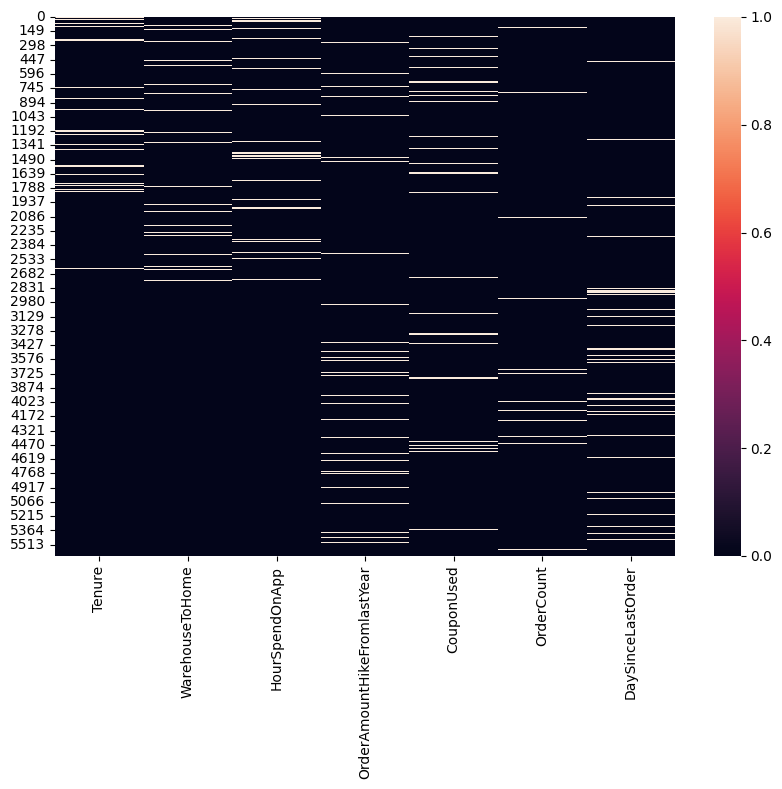

In [ ]:
# cek sebaran data missing value
plt.figure(figsize=(10,7))
sns.heatmap(df[['Tenure','WarehouseToHome','HourSpendOnApp','OrderAmountHikeFromlastYear','CouponUsed','OrderCount','DaySinceLastOrder']].isna())

Berdasarkan plot diatas, tiap kolom yang memiliki missing values tidak terlihat korelasi dengan satu sama lain, yang dimana ketika salah row dari kolom tertentu dibuang, missing values dari kolom lain tetap ada (tidak ikut terbuang). **Dibutuhkan metode imputasi**.

Untuk menentukan strategi imputasi yang tepat, pengecekan distribusi dari kolom dengan missing values dilakukan.

##### Tenure

In [ ]:
df['Tenure'].unique()

array([ 4., nan,  0., 13., 11.,  9., 19., 20., 14.,  8., 18.,  5.,  2.,
       30.,  1., 23.,  3., 29.,  6., 26., 28.,  7., 24., 25., 10., 15.,
       22., 27., 16., 12., 21., 17., 50., 60., 31., 51., 61.])

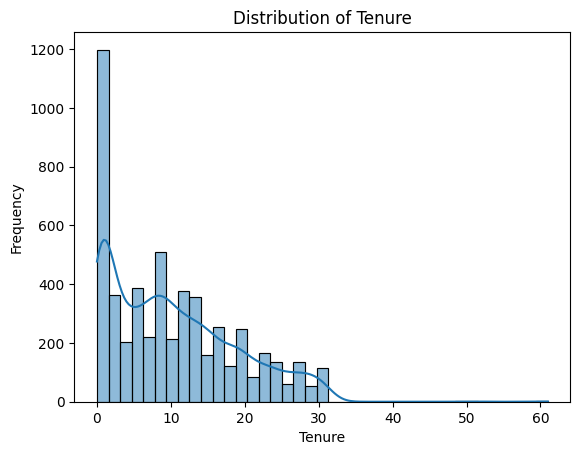

In [ ]:
tenure_column = df['Tenure'].dropna()

sns.histplot(tenure_column, kde=True)
plt.title('Distribution of Tenure')
plt.xlabel('Tenure')
plt.ylabel('Frequency')
plt.show()

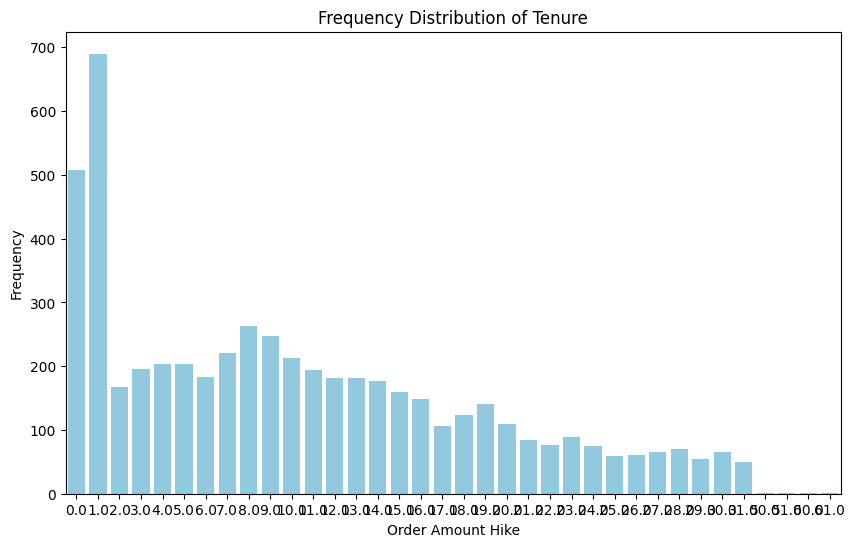

In [ ]:
value_counts = tenure_column.value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=value_counts.index, y=value_counts.values, color='skyblue')
plt.title('Frequency Distribution of Tenure')
plt.xlabel('Order Amount Hike')
plt.ylabel('Frequency')
plt.show()

In [ ]:
statistic, p_value = kstest(tenure_column, 'norm')
alpha = 0.05
print("Kolmogorov-Smirnov Test:")
print("Test Statistic:", statistic)
print("P-value:", p_value)
if p_value > alpha:
    print("Result: Data looks normally distributed (fail to reject H0)")
else:
    print("Result: Data does not look normally distributed (reject H0)")

Kolmogorov-Smirnov Test:
Test Statistic: 0.7539923205303896
P-value: 0.0
Result: Data does not look normally distributed (reject H0)


##### WarehouseToHome

In [ ]:
df['WarehouseToHome'].unique()

array([  6.,   8.,  30.,  15.,  12.,  22.,  11.,   9.,  31.,  18.,  13.,
        20.,  29.,  28.,  26.,  14.,  nan,  10.,  27.,  17.,  23.,  33.,
        19.,  35.,  24.,  16.,  25.,  32.,  34.,   5.,  21., 126.,   7.,
        36., 127.])

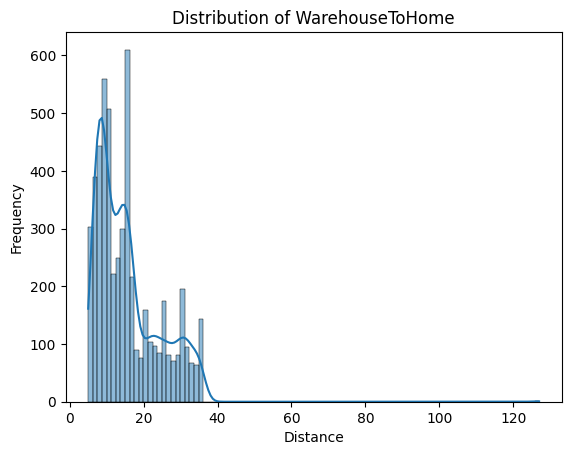

In [ ]:
warehouse_column = df['WarehouseToHome'].dropna()

# Visualizing the distribution of "Tenure"
sns.histplot(warehouse_column, kde=True)
plt.title('Distribution of WarehouseToHome')
plt.xlabel('Distance')
plt.ylabel('Frequency')
plt.show()

In [ ]:
statistic, p_value = kstest(warehouse_column, 'norm')
alpha = 0.05
print("Kolmogorov-Smirnov Test:")
print("Test Statistic:", statistic)
print("P-value:", p_value)
if p_value > alpha:
    print("Result: Data looks normally distributed (fail to reject H0)")
else:
    print("Result: Data does not look normally distributed (reject H0)")

Kolmogorov-Smirnov Test:
Test Statistic: 0.9999997133484281
P-value: 0.0
Result: Data does not look normally distributed (reject H0)


##### HourSpendOnApp

In [ ]:
df['HourSpendOnApp'].unique()

array([ 3.,  2., nan,  1.,  0.,  4.,  5.])

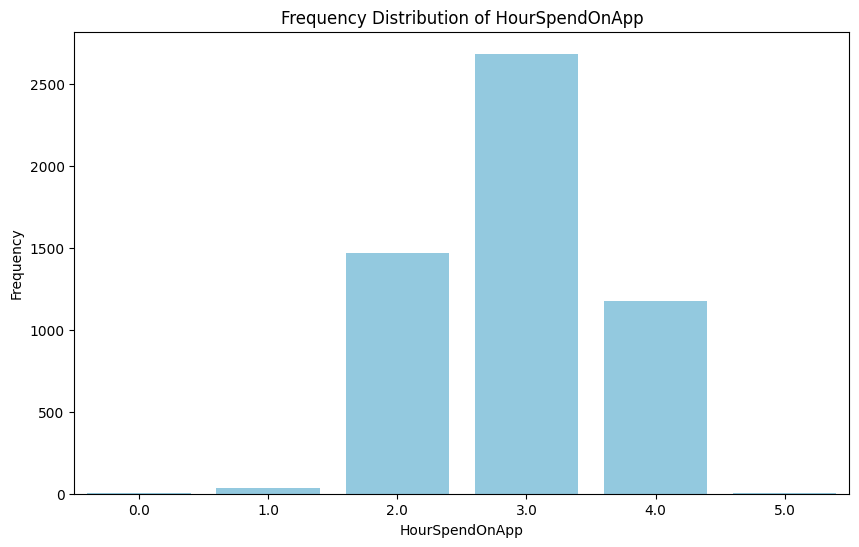

In [ ]:
hour_column = df['HourSpendOnApp'].dropna()

# Count the frequency of each unique value in the column
value_counts = hour_column.value_counts()

# Plotting the frequency distribution using a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=value_counts.index, y=value_counts.values, color='skyblue')
plt.title('Frequency Distribution of HourSpendOnApp')
plt.xlabel('HourSpendOnApp')
plt.ylabel('Frequency')
plt.show()

##### OrderAmountHikeFromlastYear

In [ ]:
df['OrderAmountHikeFromlastYear'].unique()

array([11., 15., 14., 23., 22., 16., 12., nan, 13., 17., 18., 24., 19.,
       20., 21., 25., 26.])

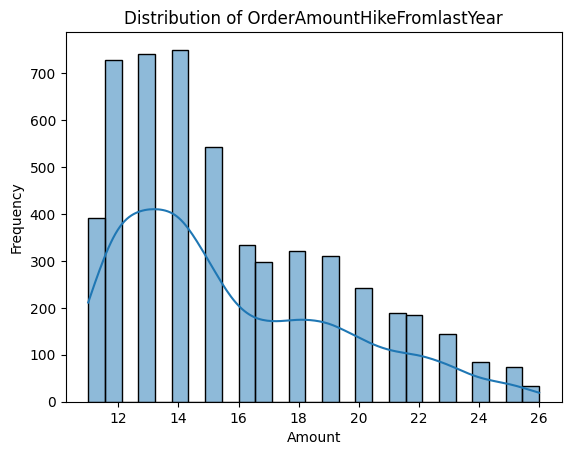

In [ ]:
orderhike_column = df['OrderAmountHikeFromlastYear'].dropna()

sns.histplot(orderhike_column, kde=True)
plt.title('Distribution of OrderAmountHikeFromlastYear')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()

In [ ]:
statistic, p_value = kstest(orderhike_column, 'norm')
alpha = 0.05
print("Kolmogorov-Smirnov Test:")
print("Test Statistic:", statistic)
print("P-value:", p_value)
if p_value > alpha:
    print("Result: Data looks normally distributed (fail to reject H0)")
else:
    print("Result: Data does not look normally distributed (reject H0)")

Kolmogorov-Smirnov Test:
Test Statistic: 1.0
P-value: 0.0
Result: Data does not look normally distributed (reject H0)


##### CouponUsed

In [ ]:
df['CouponUsed'].unique()

array([ 1.,  0.,  4.,  2.,  9.,  6., 11., nan,  7., 12., 10.,  5.,  3.,
       13., 15.,  8., 14., 16.])

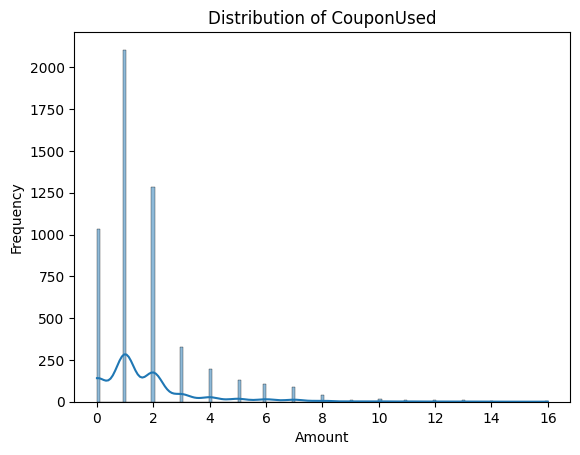

In [ ]:
coupon_column = df['CouponUsed'].dropna()

sns.histplot(coupon_column, kde=True)
plt.title('Distribution of CouponUsed')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()

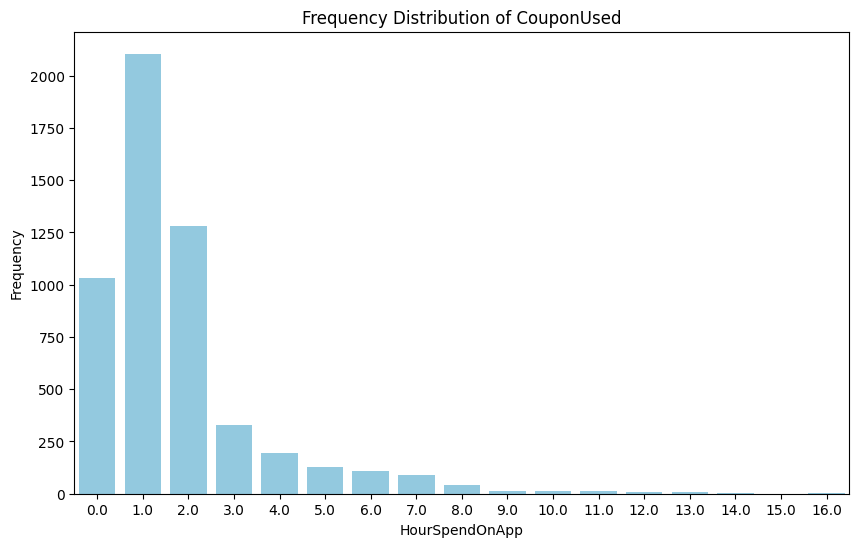

In [ ]:
value_counts = coupon_column.value_counts()

# Plotting the frequency distribution using a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=value_counts.index, y=value_counts.values, color='skyblue')
plt.title('Frequency Distribution of CouponUsed')
plt.xlabel('HourSpendOnApp')
plt.ylabel('Frequency')
plt.show()

##### OrderCount

In [ ]:
df['OrderCount'].unique()

array([ 1.,  6.,  2., 15.,  4.,  7.,  3.,  9., nan, 11.,  5., 12., 10.,
        8., 13., 14., 16.])

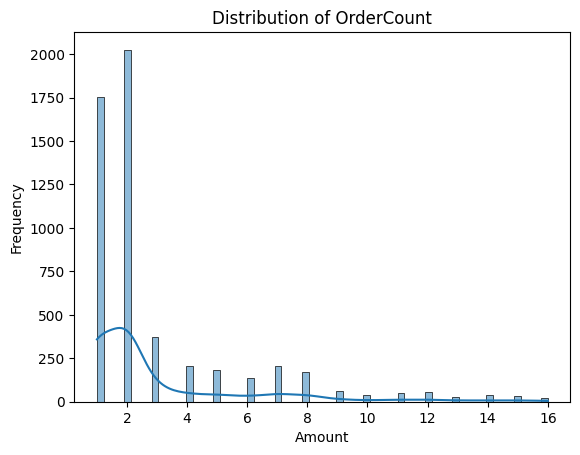

In [ ]:
order_column = df['OrderCount'].dropna()

sns.histplot(order_column, kde=True)
plt.title('Distribution of OrderCount')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()

##### DaySinceLastOrder

In [ ]:
df['DaySinceLastOrder'].unique()

array([ 5.,  0.,  3.,  7.,  2.,  1.,  8.,  6.,  4., 15.,  9., 11., 10.,
       nan, 13., 12., 17., 16., 14., 30., 46., 18., 31.])

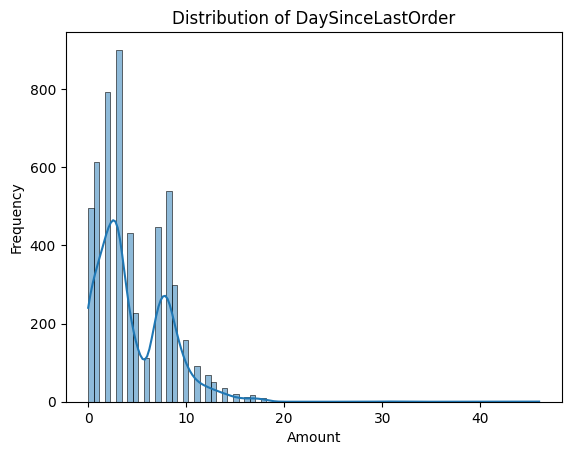

In [ ]:
lastorder_column = df['DaySinceLastOrder'].dropna()

sns.histplot(lastorder_column, kde=True)
plt.title('Distribution of DaySinceLastOrder')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()

### **Unique Values Check**

#### ***Categorical***

Didapatkan beberapa kategori yang memiliki makna yang sama:
- Credit card & CC
- Mobile Phone & Phone
- Cash on Delivery & COD

Preferred Login Device

In [ ]:
df['PreferredLoginDevice'].unique()

array(['Mobile Phone', 'Phone', 'Computer'], dtype=object)

In [ ]:
# Merging similar category
df['PreferredLoginDevice']=df['PreferredLoginDevice'].replace('Phone','Mobile Phone')

Preferred Payment Mode

In [ ]:
df['PreferredPaymentMode'].unique()

array(['Debit Card', 'UPI', 'CC', 'Cash on Delivery', 'E wallet', 'COD',
       'Credit Card'], dtype=object)

In [ ]:
# Merging similar category
df['PreferredPaymentMode'] = df['PreferredPaymentMode'].replace({'CC': 'Credit Card', 'COD': 'Cash on Delivery'})

Gender

In [ ]:
df['Gender'].unique()

array(['Female', 'Male'], dtype=object)

Prefered Order Cat

In [ ]:
df['PreferedOrderCat'].unique()

array(['Laptop & Accessory', 'Mobile', 'Mobile Phone', 'Others',
       'Fashion', 'Grocery'], dtype=object)

In [ ]:
# Merging Similar category
df['PreferedOrderCat']=df['PreferedOrderCat'].replace('Mobile','Mobile Phone')

MaritalStatus

In [ ]:
df['MaritalStatus'].unique()

array(['Single', 'Divorced', 'Married'], dtype=object)

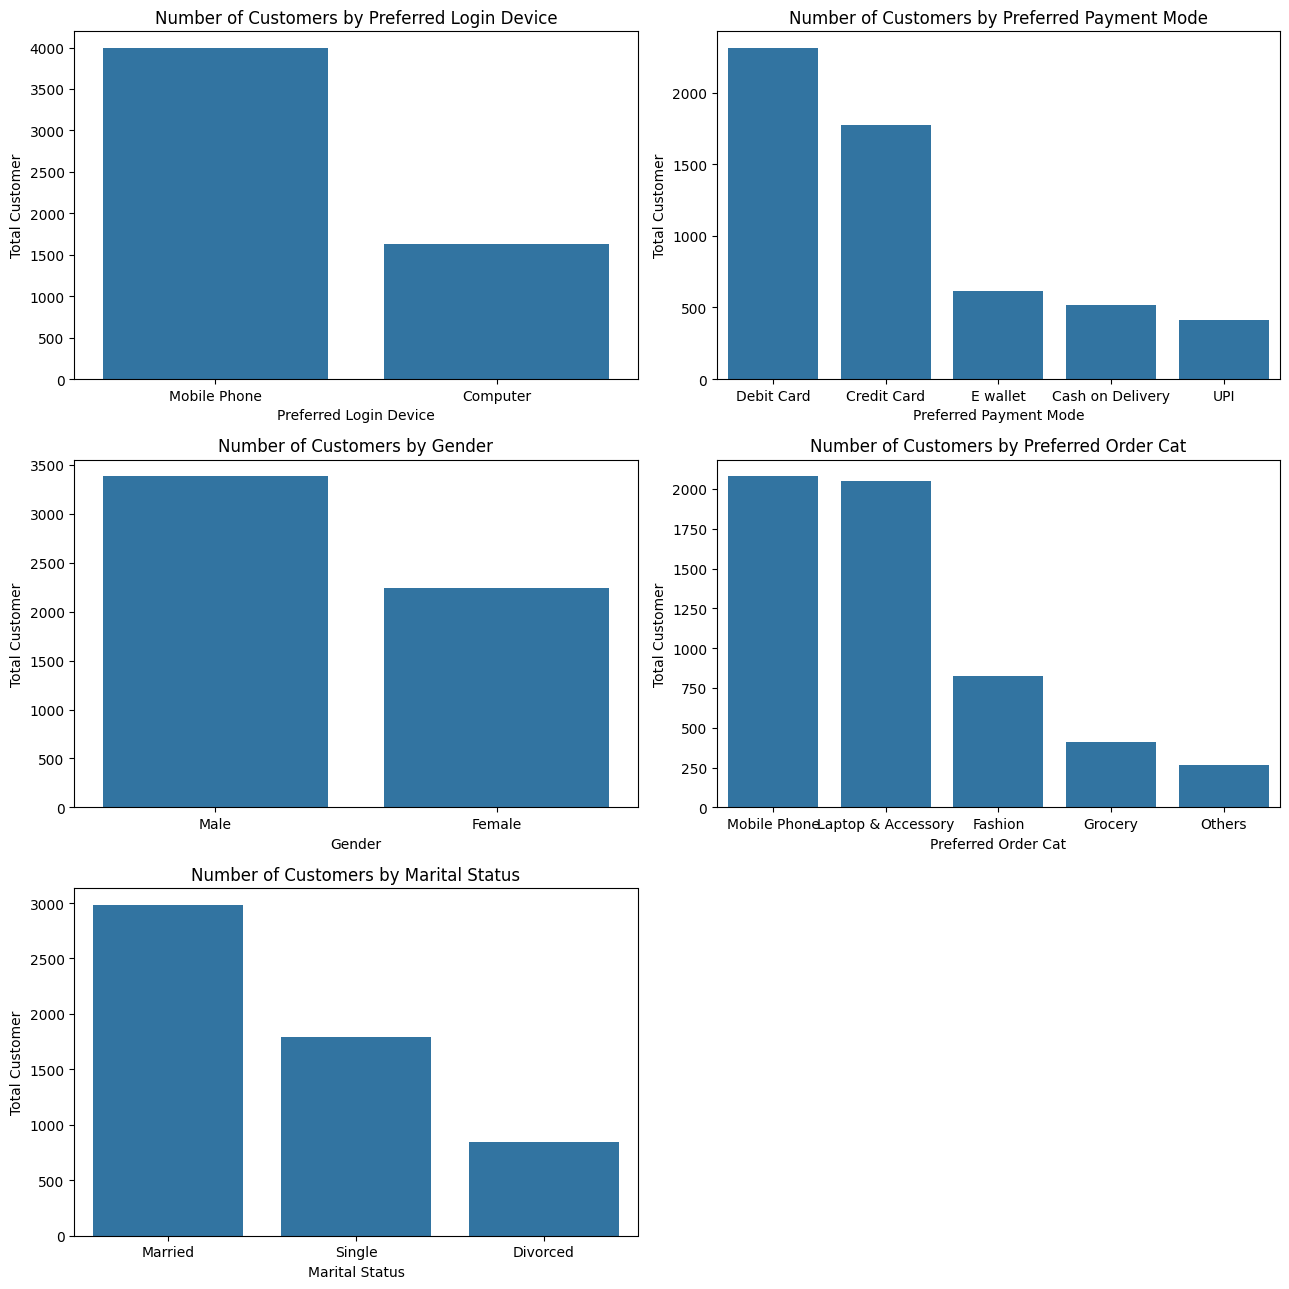

In [ ]:
columns = ['PreferredLoginDevice', 'PreferredPaymentMode', 'Gender', 'PreferedOrderCat', 'MaritalStatus']
counts = [df[col].value_counts() for col in columns]
fig, axs = plt.subplots(3, 2, figsize=(13,13))
titles = [
    'Preferred Login Device', 'Preferred Payment Mode',
    'Gender', 'Preferred Order Cat', 'Marital Status'
]

for ax, count, title in zip(axs.flat, counts, titles):
    sns.barplot(x=count.index, y=count.values, ax=ax)
    ax.set_title(f'Number of Customers by {title}')
    ax.set_xlabel(title)
    ax.set_ylabel('Total Customer')

fig.delaxes(axs[2, 1])    #Removing Empty Subplots
plt.tight_layout()
plt.show()


#### ***Numerical - Discrete***

Tenure

In [ ]:
df['Tenure'].unique()

array([ 4., nan,  0., 13., 11.,  9., 19., 20., 14.,  8., 18.,  5.,  2.,
       30.,  1., 23.,  3., 29.,  6., 26., 28.,  7., 24., 25., 10., 15.,
       22., 27., 16., 12., 21., 17., 50., 60., 31., 51., 61.])

City Tier

In [ ]:
df['CityTier'].unique()

array([3, 1, 2])

WarehouseToHome

In [ ]:
df['WarehouseToHome'].unique()

array([  6.,   8.,  30.,  15.,  12.,  22.,  11.,   9.,  31.,  18.,  13.,
        20.,  29.,  28.,  26.,  14.,  nan,  10.,  27.,  17.,  23.,  33.,
        19.,  35.,  24.,  16.,  25.,  32.,  34.,   5.,  21., 126.,   7.,
        36., 127.])

Hour Spend On App

In [ ]:
df['HourSpendOnApp'].unique()

array([ 3.,  2., nan,  1.,  0.,  4.,  5.])

Number Of Device Registered

In [ ]:
df['NumberOfDeviceRegistered'].unique()

array([3, 4, 5, 2, 1, 6])

Satisfaction Score

In [ ]:
df['SatisfactionScore'].unique()

array([2, 3, 5, 4, 1])

Number Of Address

In [ ]:
df['NumberOfAddress'].unique()

array([ 9,  7,  6,  8,  3,  2,  4, 10,  1,  5, 19, 21, 11, 20, 22])

Complain

In [ ]:
df['Complain'].unique()

array([1, 0])

Order Amount Hike From Last Year

In [ ]:
df['OrderAmountHikeFromlastYear'].unique()

array([11., 15., 14., 23., 22., 16., 12., nan, 13., 17., 18., 24., 19.,
       20., 21., 25., 26.])

Coupon Used

In [ ]:
df['CouponUsed'].unique()


array([ 1.,  0.,  4.,  2.,  9.,  6., 11., nan,  7., 12., 10.,  5.,  3.,
       13., 15.,  8., 14., 16.])

Order Count

In [ ]:
df['OrderCount'].unique()

array([ 1.,  6.,  2., 15.,  4.,  7.,  3.,  9., nan, 11.,  5., 12., 10.,
        8., 13., 14., 16.])

Day Since Last Order

In [ ]:
df['DaySinceLastOrder'].unique()

array([ 5.,  0.,  3.,  7.,  2.,  1.,  8.,  6.,  4., 15.,  9., 11., 10.,
       nan, 13., 12., 17., 16., 14., 30., 46., 18., 31.])

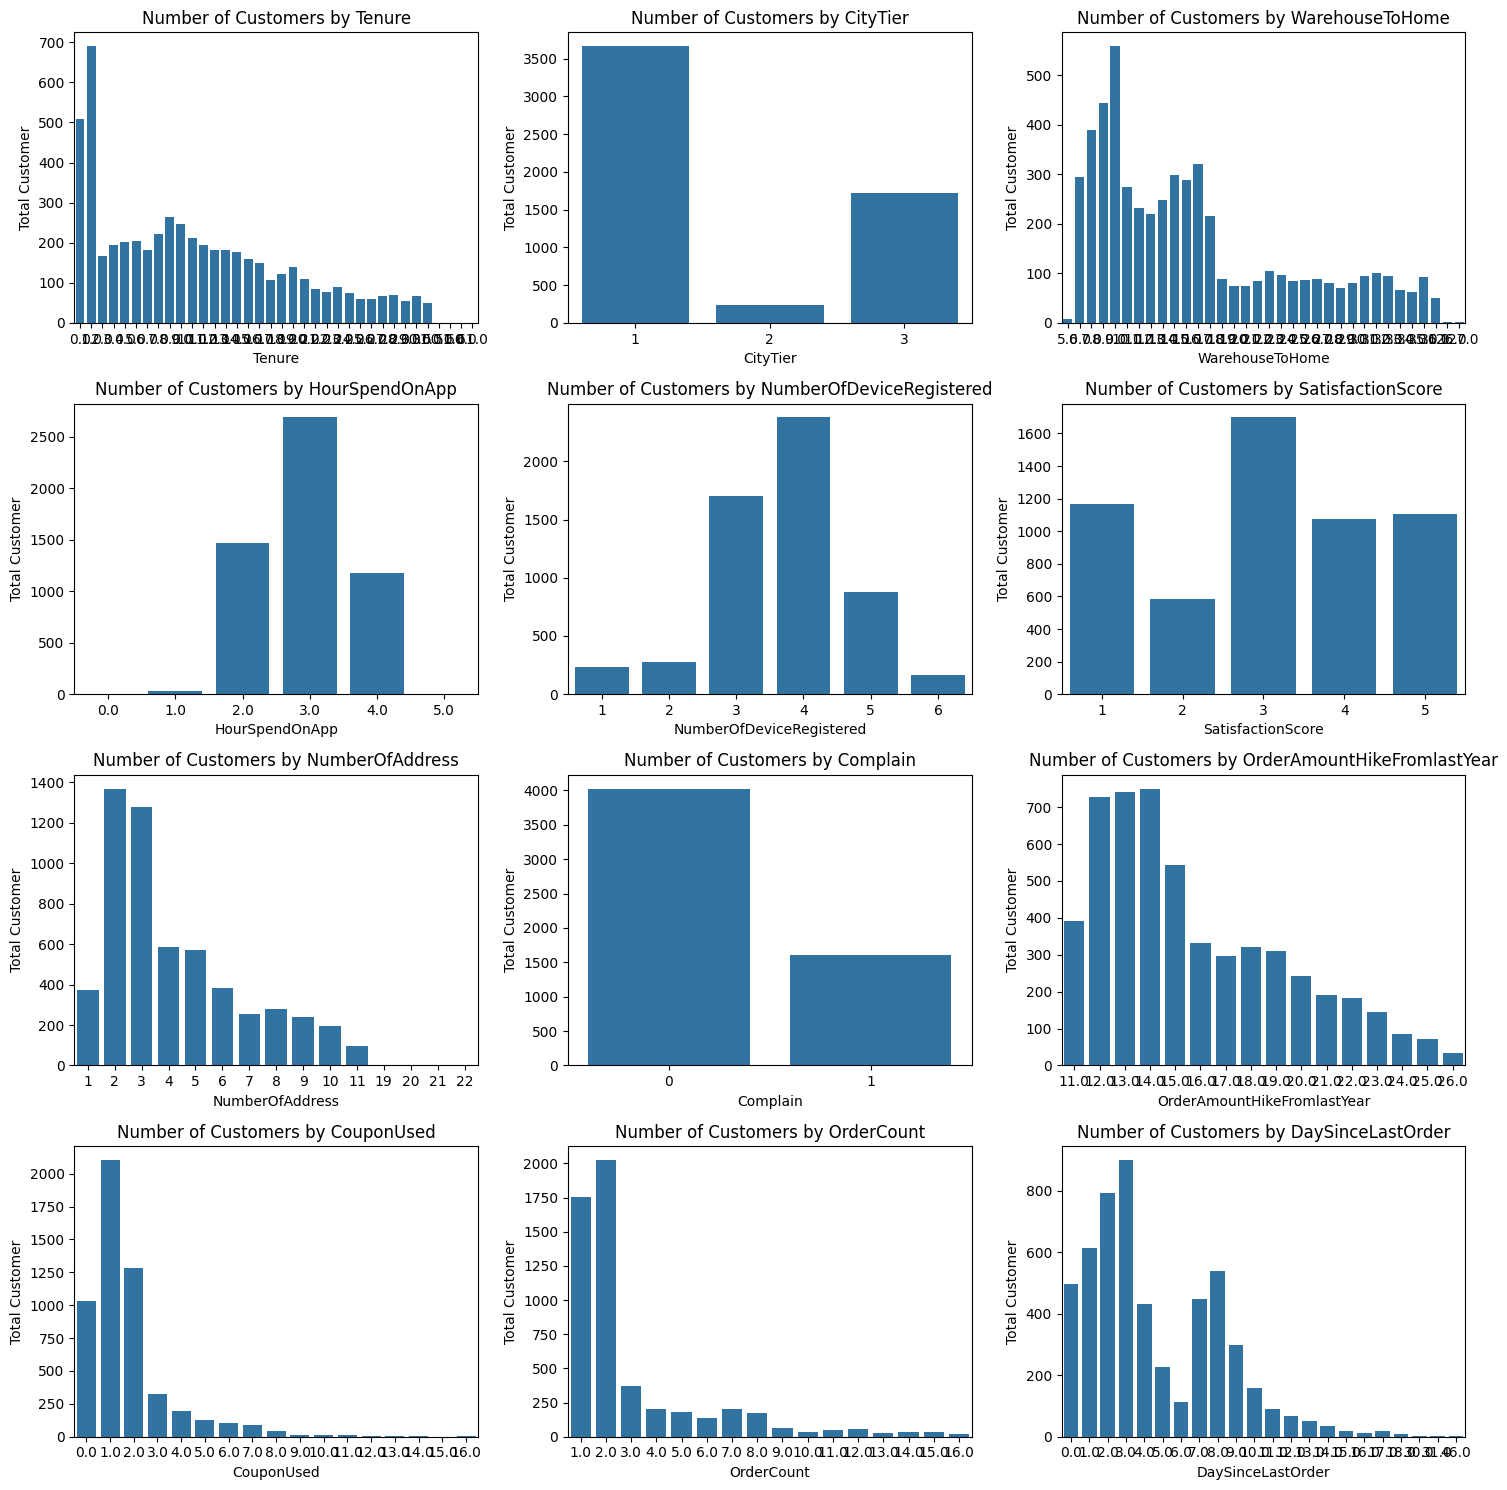

In [ ]:
columns = ['Tenure', 'CityTier', 'WarehouseToHome', 'HourSpendOnApp', 'NumberOfDeviceRegistered','SatisfactionScore','NumberOfAddress','Complain',
           'OrderAmountHikeFromlastYear','CouponUsed','OrderCount','DaySinceLastOrder']
counts = [df[col].value_counts() for col in columns]
fig, axs = plt.subplots(4,3, figsize=(15,15))
titles = [
    'Tenure', 'CityTier', 'WarehouseToHome', 'HourSpendOnApp', 'NumberOfDeviceRegistered','SatisfactionScore','NumberOfAddress','Complain',
    'OrderAmountHikeFromlastYear','CouponUsed','OrderCount','DaySinceLastOrder'
]

for ax, count, title in zip(axs.flat, counts, titles):
    sns.barplot(x=count.index, y=count.values, ax=ax)
    ax.set_title(f'Number of Customers by {title}')
    ax.set_xlabel(title)
    ax.set_ylabel('Total Customer')

plt.tight_layout()
plt.show()


In [ ]:
df[df['Churn'] == 1]['DaySinceLastOrder'].describe()

count    894.000000
mean       3.236018
std        3.415137
min        0.000000
25%        1.000000
50%        2.000000
75%        5.000000
max       46.000000
Name: DaySinceLastOrder, dtype: float64

#### ***Numerical - Continous***

Cashback Amount

In [ ]:
Cashback_unique = np.sort(df['CashbackAmount'].unique())
Cashback_unique

array([  0.  ,  12.  ,  25.  , ..., 324.43, 324.73, 324.99])

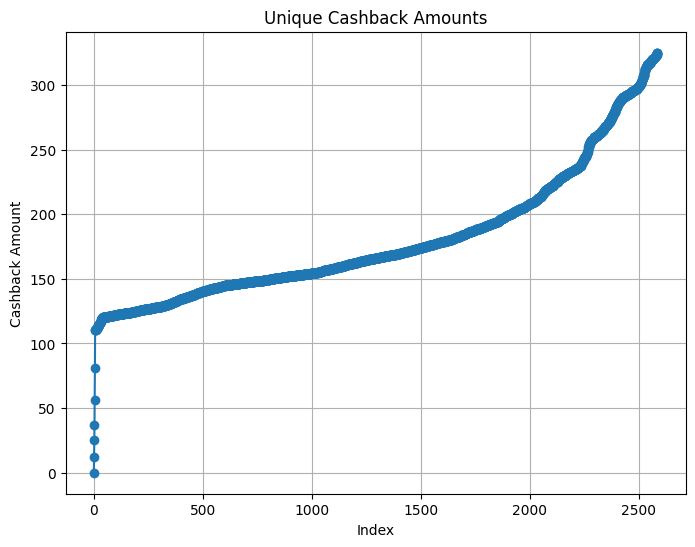

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(Cashback_unique, marker='o', linestyle='-')
plt.title('Unique Cashback Amounts')
plt.xlabel('Index')
plt.ylabel('Cashback Amount')
plt.grid(True)
plt.show()

### **Outliers Check**

#### Outliers Check Variables

Melakukan pengecekan outliers pada variabel numerical yang; memiliki banyak value (asumsi: lebih dari 10), bukan sebagai variable primary key (memiliki value sebanyak record) dan diutamakan pada variabel data kontinu.

| **Columns**                    | **Total Unique Value** | **Data Type** |
|--------------------------------|------------------------|---------------|
| Tenure                         | 36                     | Discrete      |
| Warehouse To Home              | 34                     | Discrete      |
| Number Of Address              | 15                     | Discrete      |
| Order Amount Hike From Last Year | 16                   | Discrete      |
| Coupon Used                    | 17                     | Discrete      |
| Order Count                    | 16                     | Discrete      |
| Day Since Last Order           | 22                     | Discrete      |
| Cashback Amount                | 2586                   | Continuous    |



In [ ]:
# function untuk mengecek oulier menggunakan metode InterQuartile Range (IQR)

def iqr_outliers_detector(df, col,  threshold = 1.5):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - threshold * IQR
    upper_bound = Q3 + threshold * IQR

    outlier= df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    return outlier, lower_bound, upper_bound

#### Outlier in Tenure

In [ ]:
# run outlier detector
col = 'Tenure'
t_outlier, lowbound, upbound = iqr_outliers_detector(df, col)

# show outlier result
print('Total Outlier Found:',len(t_outlier))
print(f'With Lower {lowbound} and Upper {upbound}')

Total Outlier Found: 4
With Lower -19.0 and Upper 37.0


#### Outlier in WarehouseToHome

In [ ]:
# run outlier detector
col = 'WarehouseToHome'
w_outlier, lowbound, upbound = iqr_outliers_detector(df, col)

# show outlier result
print('Total Outlier Found:',len(w_outlier))
print(f'With Lower {lowbound} and Upper {upbound}')


Total Outlier Found: 2
With Lower -7.5 and Upper 36.5


#### Outlier in HourSpendOnApp

In [ ]:
# run outlier detector
col = 'HourSpendOnApp'
w_outlier, lowbound, upbound = iqr_outliers_detector(df, col)

# show outlier result
print('Total Outlier Found:',len(w_outlier))
print(f'With Lower {lowbound} and Upper {upbound}')

Total Outlier Found: 6
With Lower 0.5 and Upper 4.5


#### Outlier in NumberOfAddress

In [ ]:
# run outlier detector
col = 'NumberOfAddress'
n_outlier, lowbound, upbound = iqr_outliers_detector(df, col)

# show outlier result
print('Total Outlier Found:',len(n_outlier))
print(f'With Lower {lowbound} and Upper {upbound}')

Total Outlier Found: 4
With Lower -4.0 and Upper 12.0


#### Outlier in OrderAmountHikeFromlastYear

In [ ]:
# run outlier detector
col = 'OrderAmountHikeFromlastYear'
oa_outlier, lowbound, upbound = iqr_outliers_detector(df, col)

# show outlier result
print('Total Outlier Found:',len(oa_outlier))
print(f'With Lower {lowbound} and Upper {upbound}')

Total Outlier Found: 33
With Lower 5.5 and Upper 25.5


#### Outlier in CouponUsed

In [ ]:
# run outlier detector
col = 'CouponUsed'
cu_outlier, lowbound, upbound = iqr_outliers_detector(df, col)

# show outlier result
print('Total Outlier Found:',len(cu_outlier))
print(f'With Lower {lowbound} and Upper {upbound}')

Total Outlier Found: 629
With Lower -0.5 and Upper 3.5


#### Outlier in OrderCount

In [ ]:
# run outlier detector
col = 'OrderCount'
oc_outlier, lowbound, upbound = iqr_outliers_detector(df, col)

# show outlier result
print('Total Outlier Found:',len(oc_outlier))
print(f'With Lower {lowbound} and Upper {upbound}')

Total Outlier Found: 703
With Lower -2.0 and Upper 6.0


#### Outlier in DaySinceLastOrder

In [ ]:
# run outlier detector
col = 'DaySinceLastOrder'
d_outlier, lowbound, upbound = iqr_outliers_detector(df, col)

# show outlier result
print('Total Outlier Found:',len(d_outlier))
print(f'With Lower {lowbound} and Upper {upbound}')

Total Outlier Found: 62
With Lower -5.5 and Upper 14.5


#### Outlier in CashbackAmount

In [ ]:
# run outlier detector
col = 'CashbackAmount'
ca_outlier, lowbound, upbound = iqr_outliers_detector(df, col)

# show outlier result
print('Total Outlier Found:',len(ca_outlier))
print(f'With Lower {lowbound} and Upper {upbound}')

Total Outlier Found: 438
With Lower 69.83625 and Upper 272.32625


#### Outliers Visualization

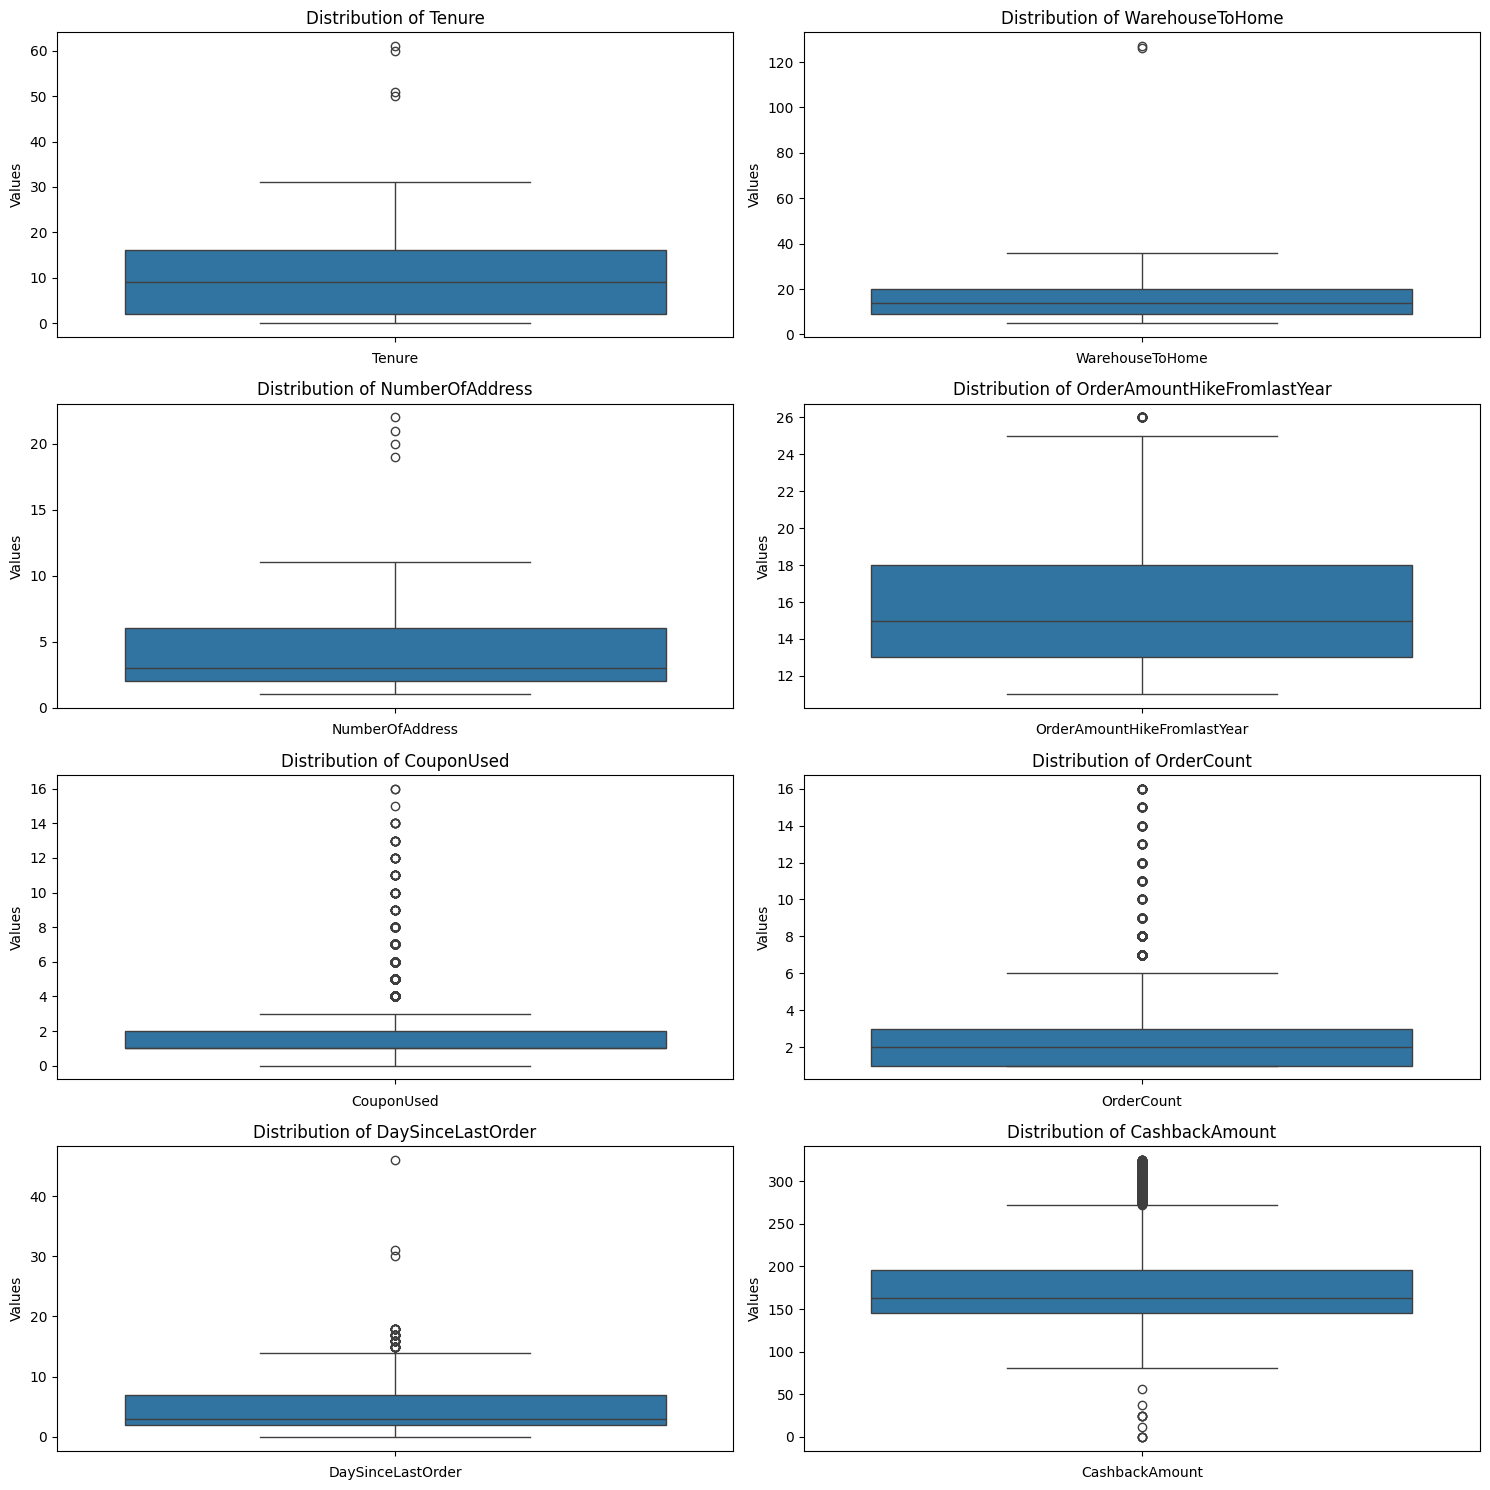

In [ ]:
columns = ['Tenure', 'WarehouseToHome', 'NumberOfAddress',
           'OrderAmountHikeFromlastYear', 'CouponUsed',
           'OrderCount', 'DaySinceLastOrder', 'CashbackAmount']

fig, axs = plt.subplots(4, 2, figsize=(15, 15))
titles = ['Tenure', 'WarehouseToHome', 'NumberOfAddress',
          'OrderAmountHikeFromlastYear', 'CouponUsed',
          'OrderCount', 'DaySinceLastOrder', 'CashbackAmount']

for ax, col, title in zip(axs.flat, columns, titles):
    sns.boxplot(y=df[col], ax=ax)
    ax.set_title(f'Distribution of {title}')
    ax.set_xlabel(title)
    ax.set_ylabel('Values')

plt.tight_layout()
plt.show()

### **Data Cleaning Summary & Action**

**Missing Values**

| **Columns**                  | **Data Type** | **Distribution** | **Action**        | **Additional Info**     | **Replacement Value**  |
| ---------------------------- | ------------- | ---------------- | --------------    |  -------------           | ---------------------  |
| Tenure                       | Discrete       | Skewed           | Replace: 0        | Considered as a new customer | 0                      |
| WarehouseToHome              | Discrete       | Skewed           | Replace: Median   | The Mode is too close to the 2nd & 3rd most frequent data | 14.0                   |
| HourSpendOnApp               | Discrete       | Skewed           | Replace: Mode     | The Mode is Dominant     | 3.0                    |
| OrderAmountHikeFromlastYear  | Discrete       | Skewed           | Replace: 0        | Considered as a new customer, or did not have any orders last year | 0                      |
| CouponUsed                   | Discrete       | Skewed           | Replace: Mode     | The Mode is Dominant     | 1.0                    |
| OrderCount                   | Discrete       | Skewed           | Replace: Median   | The Mode is too close to the 2nd most frequent data | 2.0                    |
| DaySinceLastOrder            | Discrete       | Skewed           | Replace: Median   | The Mode is too close to the 2nd most frequent data | 3.0                    |


- There are no common missing values between any of the columns.
- Dropping all of the missing values would result in too much loss of data and information (32%). Imputation will be needed.
- Missing values will be replaced by the **mode for columns where the mode is dominant** and by the **median for the other columns**.
- Missing values on ***Tenure*** and ***OrderAmountHikeFromlastYear*** are set to 0, as we assume these are new customer.

In [ ]:
df['Tenure'].fillna(0, inplace=True)
df['WarehouseToHome'].fillna(df['WarehouseToHome'].median(), inplace=True)
df['HourSpendOnApp'].fillna(df['HourSpendOnApp'].mode()[0], inplace=True)
df['OrderAmountHikeFromlastYear'].fillna(0, inplace=True)
df['CouponUsed'].fillna(df['CouponUsed'].mode()[0], inplace=True)
df['OrderCount'].fillna(df['OrderCount'].median(), inplace=True)
df['DaySinceLastOrder'].fillna(df['DaySinceLastOrder'].median(), inplace=True)

In [ ]:
tenure_replacement = 0
warehouse_to_home_replacement = df['WarehouseToHome'].median()
hour_spend_on_app_replacement = df['HourSpendOnApp'].mode()[0]
order_amount_hike_replacement = 0
coupon_used_replacement = df['CouponUsed'].mode()[0]
order_count_replacement = df['OrderCount'].median()
day_since_last_order_replacement = df['DaySinceLastOrder'].median()

print(f"Replacement value for 'Tenure': {tenure_replacement}")
print(f"Replacement value for 'WarehouseToHome': {warehouse_to_home_replacement}")
print(f"Replacement value for 'HourSpendOnApp': {hour_spend_on_app_replacement}")
print(f"Replacement value for 'OrderAmountHikeFromlastYear': {order_amount_hike_replacement}")
print(f"Replacement value for 'CouponUsed': {coupon_used_replacement}")
print(f"Replacement value for 'OrderCount': {order_count_replacement}")
print(f"Replacement value for 'DaySinceLastOrder': {day_since_last_order_replacement}")

Replacement value for 'Tenure': 0
Replacement value for 'WarehouseToHome': 14.0
Replacement value for 'HourSpendOnApp': 3.0
Replacement value for 'OrderAmountHikeFromlastYear': 0
Replacement value for 'CouponUsed': 1.0
Replacement value for 'OrderCount': 2.0
Replacement value for 'DaySinceLastOrder': 3.0


**Unique Values**

- Duplicate data not found
- Similar categories are merged
  - "Credit Card" & "CC" on: PreferredPaymentMode
  - "Mobile Phone" & "Phone" on: PreferredLoginDevice & PreferedOrderCat
  - "Cash On Delivery" & "COD" on: PreferredPaymentMode

**Outliers**

| **Column** | **Total Outlier** | **Lower** | **Upper** | **Action** | **Additional Info** |
|------------|-------------------|-----------|-----------|------------|---------------------|
| Tenure | 4 | -19.0 | 37.0 | | |
| Warehouse to Home | 2 | -7.5 | 36.5 | | |
| Hour Spend On App	| 6 | 0.5 | 4.5 | |||
| Number Of Address | 4 | -4.0 | 12.0 | Drop | Customer having more than 12 address doesnt make sense. probably a **Bot** or an **Error** |
| Order Amount Hike From Last Year | 33 | 5.5 | 25.5 | | |
| Coupon Used | 629 | -0.5 | 3.5 | | |
| Order Count | 703 | -2.0 | 6.0 | | |
| Day Since Last Order | 62 | -5.5 | 14.5 | | |
| Cashback Amount | 438 | 69.83625 | 272.32625 | | |


Pada pengecekan outliers, terdapat 4 customer yang memiliki jumlah alamat diatas 12, yang dimana hal tersebut berpotensi terdapat error pada penginputan data ataupun bot.

In [ ]:
n_outlier

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
260,50261,1,NaN,Computer,1,10.0,Cash on Delivery,Male,2.0,3,Mobile Phone,2,Single,19,1,23.0,1.0,1.0,0.0,122.85
691,50692,0,12.0,Computer,1,15.0,Debit Card,Male,3.0,3,Laptop & Accessory,4,Single,21,0,15.0,1.0,1.0,3.0,167.82
3075,53076,1,1.0,Computer,1,11.0,Cash on Delivery,Male,3.0,4,Mobile Phone,2,Single,20,1,24.0,2.0,2.0,1.0,147.85
3506,53507,0,13.0,Computer,1,16.0,Debit Card,Male,4.0,4,Laptop & Accessory,4,Single,22,0,16.0,2.0,2.0,4.0,192.82


In [ ]:
# Number Of Address
df.drop(n_outlier.index, inplace= True)

**Total data after cleaning**

In [ ]:
print('Total Data After Cleaning :',len(df))

Total Data After Cleaning : 5626


Secara keseluruhan, *loss of data* yang terjadi pada proses cleaning ini sebanyak **4 buah data** (row)

## **Analysis**

Pada analisis ini dibagi menjadi tiga bagian analisis yaitu :
- **Customer Demography**

  1. Gender
  2. Marital Status
  3. City Tier
  4. Order Count in City Tier

- **Customer Behavior**

  1. Tenure
  2. Hour Spend On App
  3. Complain
  4. Complain in Satisfaction Score

- **Customer Preferences**

  1. Preferrence Login Device
  2. Preferrence Payment Mode
  3. Preferrence Order Category
  4. Warehouse to Home
  5. Coupon Used
  6. Coupon Used in PreferredPaymentMode

**Churn Rate**

In [ ]:
avg_churn = 100* len(df[df['Churn']==1]) / len(df['Churn'])

### **Customer Demography**

#### Gender

In [ ]:
customers_churned = df.groupby('Gender').Churn.sum()
total_customers = df['Gender'].value_counts()
customers_not_churn = total_customers - customers_churned
perc_of_total_cust = round(customers_churned * 100 / total_customers, 2)

result = pd.concat([total_customers, customers_churned, customers_not_churn, perc_of_total_cust], axis=1)
result.columns = ['Total_Customers','Customers_churned','customers_not_churn',  'perc_of_total_cust']
result = result.reset_index()
result_gender = result.sort_values(by='perc_of_total_cust', ascending=False)
print(result_gender)

   Gender  Total_Customers  Customers_churned  customers_not_churn  \
0    Male             3380                598                 2782   
1  Female             2246                348                 1898   

   perc_of_total_cust  
0               17.69  
1               15.49  


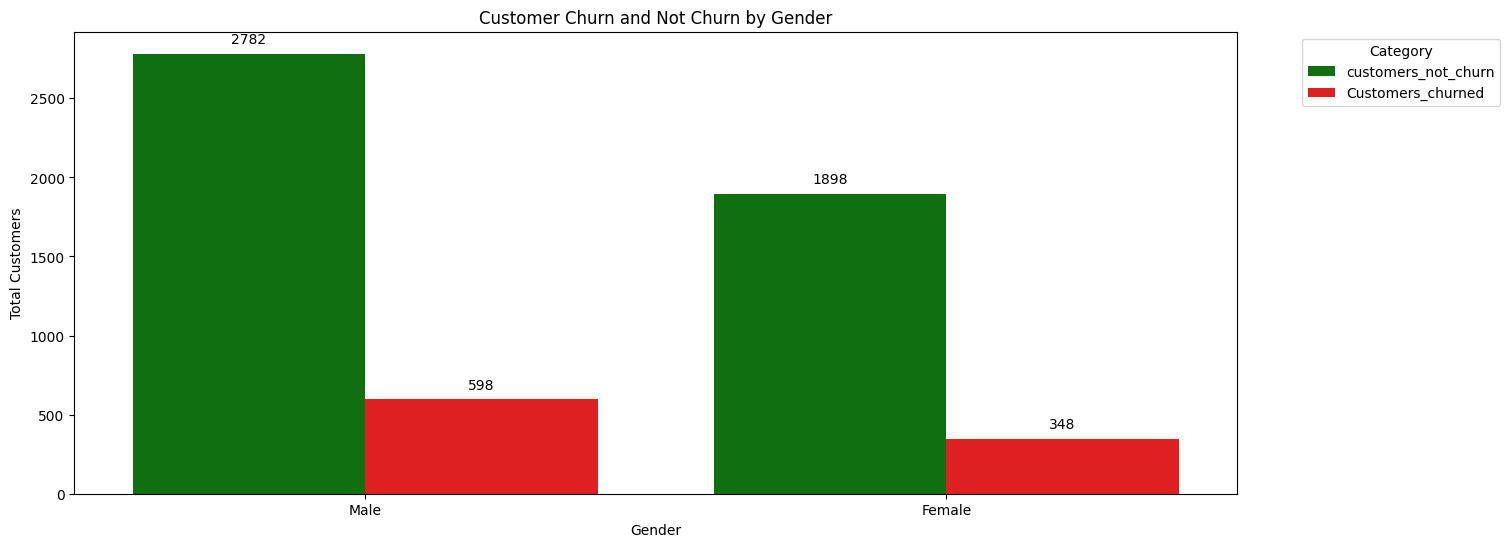

In [ ]:
# Melt DataFrame
gender_melt = pd.melt(result_gender, id_vars='Gender', value_vars=['customers_not_churn', 'Customers_churned'], var_name='Category', value_name='Count')
# Visualisasi
plt.figure(figsize=(15, 6))
sns.barplot(x='Gender', y='Count', hue='Category',data=gender_melt,palette={'customers_not_churn': 'green', 'Customers_churned': 'red'})

# label
for p in plt.gca().patches:
  if p.get_height() != 0:
      price_label = f"{int(p.get_height())}"
      plt.gca().annotate(price_label, (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=10, color='black')

plt.title('Customer Churn and Not Churn by Gender')
plt.xlabel('Gender')
plt.ylabel('Total Customers')
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

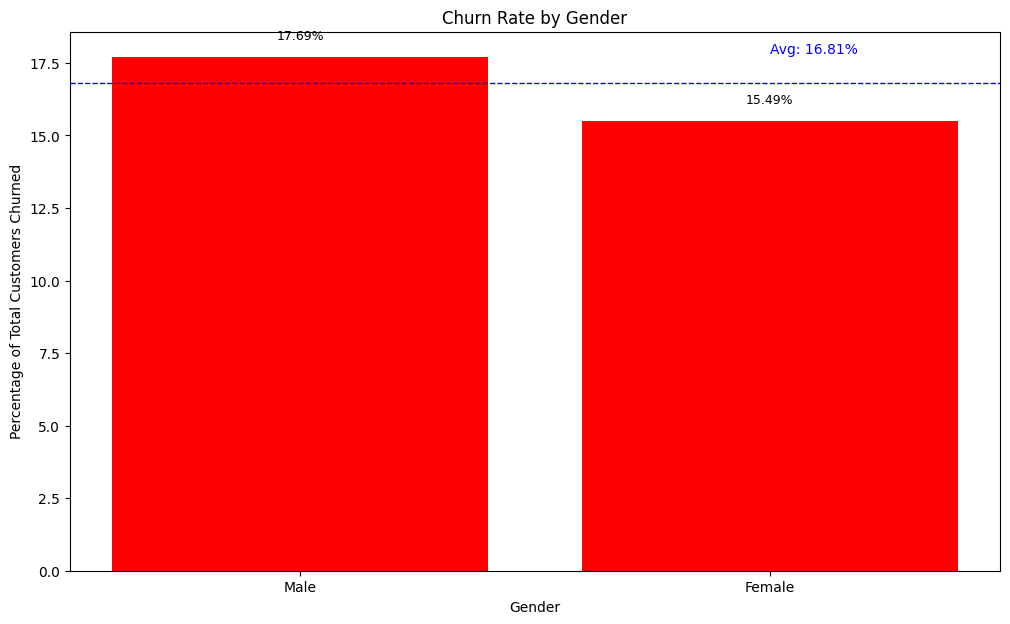

In [ ]:
# Visualisasi
plt.figure(figsize=(12, 7))
plt.bar(result_gender['Gender'], result_gender['perc_of_total_cust'],color ='red')
plt.xlabel('Gender')
plt.ylabel('Percentage of Total Customers Churned')
plt.title('Churn Rate by Gender')

# Label
for device, perc in zip(result_gender['Gender'], result_gender['perc_of_total_cust']):
    plt.text(device, perc + 0.5, f'{perc}%', ha='center', va='bottom', fontsize=9)

# Add label for average churn rate
plt.axhline(y=avg_churn, color='blue', linestyle='--', linewidth=1)
plt.text(len(result_gender['Gender']) - 1, avg_churn + 1, f'Avg: {avg_churn:.2f}%', color='blue', fontsize=10)

plt.show()

- Berdasarkan **Gender**, Laki-laki memiliki jumlah customer yang lebih banyak dibandingkan dengan wanita tetapi churn rate laki-laki juga lebih tinggi yaitu 17%. Hal ini dapat disebabkan karena perbedaan preferensi dan kebutuhan antara laki-laki dan wanita.

#### Marital Status

In [ ]:
customers_churned = df.groupby('MaritalStatus').Churn.sum()
total_customers = df['MaritalStatus'].value_counts()
customers_not_churn = total_customers - customers_churned
perc_of_total_cust = round(customers_churned * 100 / total_customers, 2)

result = pd.concat([total_customers, customers_churned, customers_not_churn, perc_of_total_cust], axis=1)
result.columns = ['Total_Customers','Customers_churned','customers_not_churn',  'perc_of_total_cust']
result = result.reset_index()
result_status = result.sort_values(by='perc_of_total_cust', ascending=False)
print(result_status)

  MaritalStatus  Total_Customers  Customers_churned  customers_not_churn  \
1        Single             1792                478                 1314   
2      Divorced              848                124                  724   
0       Married             2986                344                 2642   

   perc_of_total_cust  
1               26.67  
2               14.62  
0               11.52  


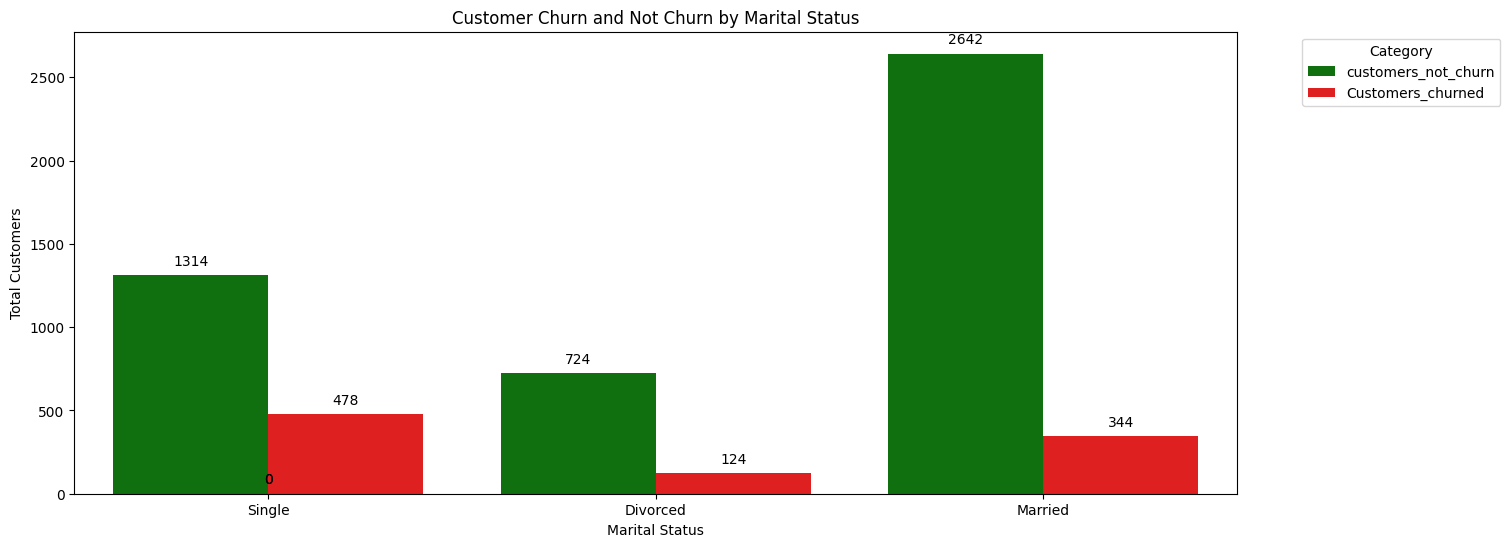

In [ ]:
# Melt DataFrame
status_melt = pd.melt(result_status, id_vars='MaritalStatus', value_vars=['customers_not_churn', 'Customers_churned'], var_name='Category', value_name='Count')
# Visualisasi
plt.figure(figsize=(15, 6))
sns.barplot(x='MaritalStatus', y='Count', hue='Category',data=status_melt,palette={'customers_not_churn': 'green', 'Customers_churned': 'red'})

# label
for p in plt.gca().patches:
    price_label = f"{int(p.get_height())}"
    plt.gca().annotate(price_label, (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=10, color='black')
plt.title('Customer Churn and Not Churn by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Total Customers')
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

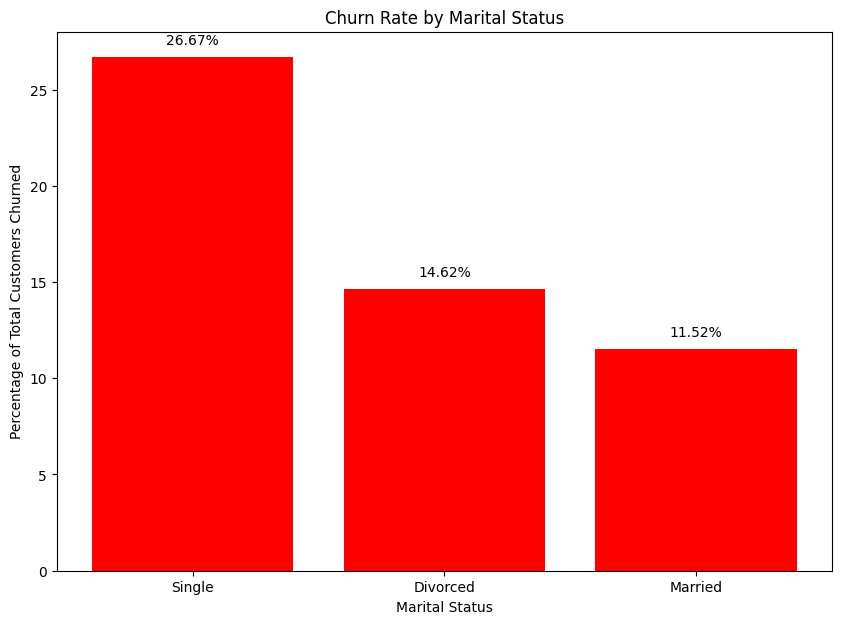

In [ ]:
# Visualisasi
plt.figure(figsize=(10, 7))
plt.bar(result_status['MaritalStatus'], result_status['perc_of_total_cust'],color ='red')
plt.xlabel('Marital Status')
plt.ylabel('Percentage of Total Customers Churned')
plt.title('Churn Rate by Marital Status')

# Label
for device, perc in zip(result_status['MaritalStatus'], result_status['perc_of_total_cust']):
    plt.text(device, perc + 0.5, f'{perc}%', ha='center', va='bottom', fontsize=10)

plt.show()

 - Berdasarkan status pernikahan dapat dilihat bahwa single memiliki tingkat churn rate dua kali lipat dibandingkan Married dan Divorce. Hal ini mungkin disebabkan dengan adanya perbedaan kebutuhan antara customer yang single dan married.

#### City Tier

In [ ]:
customers_churned = df.groupby('CityTier').Churn.sum()
total_customers = df['CityTier'].value_counts()
customers_not_churn = total_customers - customers_churned
perc_of_total_cust = round(customers_churned * 100 / total_customers, 2)

result = pd.concat([total_customers, customers_churned, customers_not_churn,perc_of_total_cust], axis=1)
result.columns = ['Total_Customers','Customers_churned', 'customers_not_churn', 'perc_of_total_cust']
result = result.reset_index()
result_city = result.sort_values(by='perc_of_total_cust', ascending=False)
print(result_city)

   CityTier  Total_Customers  Customers_churned  customers_not_churn  \
1         3             1722                368                 1354   
2         2              242                 48                  194   
0         1             3662                530                 3132   

   perc_of_total_cust  
1               21.37  
2               19.83  
0               14.47  


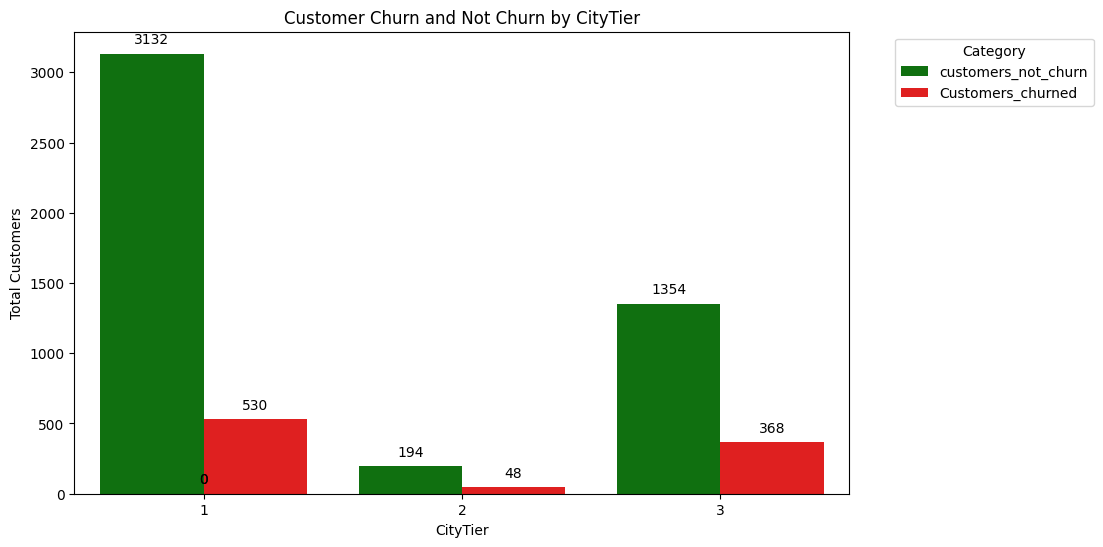

In [ ]:
# Melt DataFrame
city_melt = pd.melt(result_city, id_vars='CityTier', value_vars=['customers_not_churn', 'Customers_churned'], var_name='Category', value_name='Count')

# Visualisasi
plt.figure(figsize=(10, 6))
sns.barplot(x='CityTier', y='Count', hue='Category',data=city_melt,palette={'customers_not_churn': 'green', 'Customers_churned': 'red'})

# label
for p in plt.gca().patches:
    price_label = f"{int(p.get_height())}"
    plt.gca().annotate(price_label, (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=10, color='black')
plt.title('Customer Churn and Not Churn by CityTier')
plt.xlabel('CityTier')
plt.ylabel('Total Customers')
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

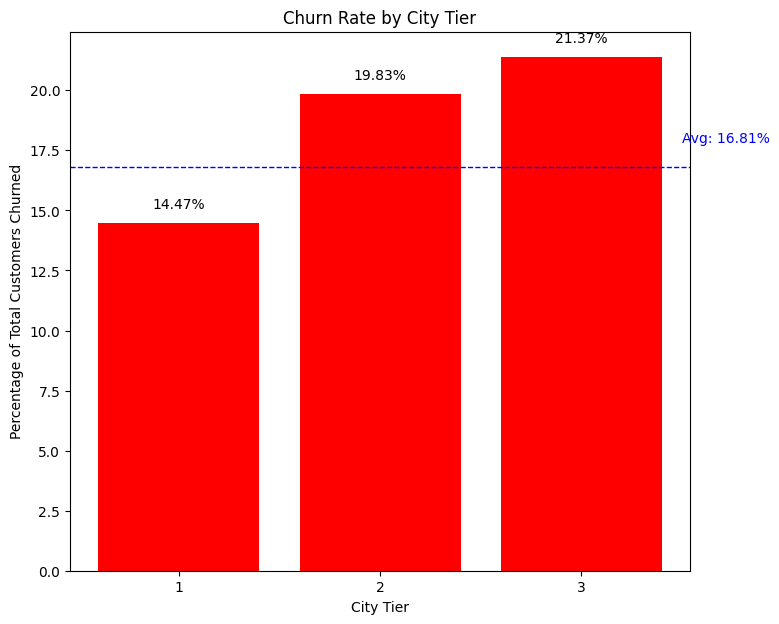

In [ ]:
# Visualisasi
plt.figure(figsize=(8, 7))
plt.bar(result_city['CityTier'], result_city['perc_of_total_cust'], color = 'red')
plt.xlabel('City Tier')
plt.ylabel('Percentage of Total Customers Churned')
plt.title('Churn Rate by City Tier')

# Label
for device, perc in zip(result_city['CityTier'], result_city['perc_of_total_cust']):
    plt.text(device, perc + 0.5, f'{perc}%', ha='center', va='bottom', fontsize=10)
plt.xticks(result_city['CityTier'])

# Add label for average churn rate
plt.axhline(y=avg_churn, color='blue', linestyle='--', linewidth=1)
plt.text(len(result_city['CityTier']) + 0.5, avg_churn + 1, f'Avg: {avg_churn:.2f}%', color='blue', fontsize=10)

plt.show()

- Berdasarkan **City tier**, City tier 3 menunjukkan churn rate yang sangat tinggi dibandingkan dengan city tier lainnya. Hal ini mungkin disebabkan dengan pembangunan infrastruktur yang belum berkembang dan mempengaruhi kepada kepuasan customer. Selanjutnya, dilihat pada city tier 2 yang memiliki churn rate hanya memiliki selisih 2% dengan city tier 3 hal ini cukup disayangkan karena kota ini sudah lebih tertata dan berkembang dibandingkan dengan city tier 3.

#### OrderCount in CityTier

In [ ]:
df_order_city = df.groupby(['CityTier', 'Churn']).agg({'OrderCount': 'sum'}).reset_index()
df_order_city['OrderCount_Percentage'] = df_order_city.groupby('CityTier')['OrderCount'].transform(lambda x: x / x.sum() * 100)
df_order_city

,CityTier,Churn,OrderCount,OrderCount_Percentage
0,1,0,9177.0,86.169014
1,1,1,1473.0,13.830986
2,2,0,535.0,85.874799
3,2,1,88.0,14.125201
4,3,0,4298.0,79.651594
5,3,1,1098.0,20.348406


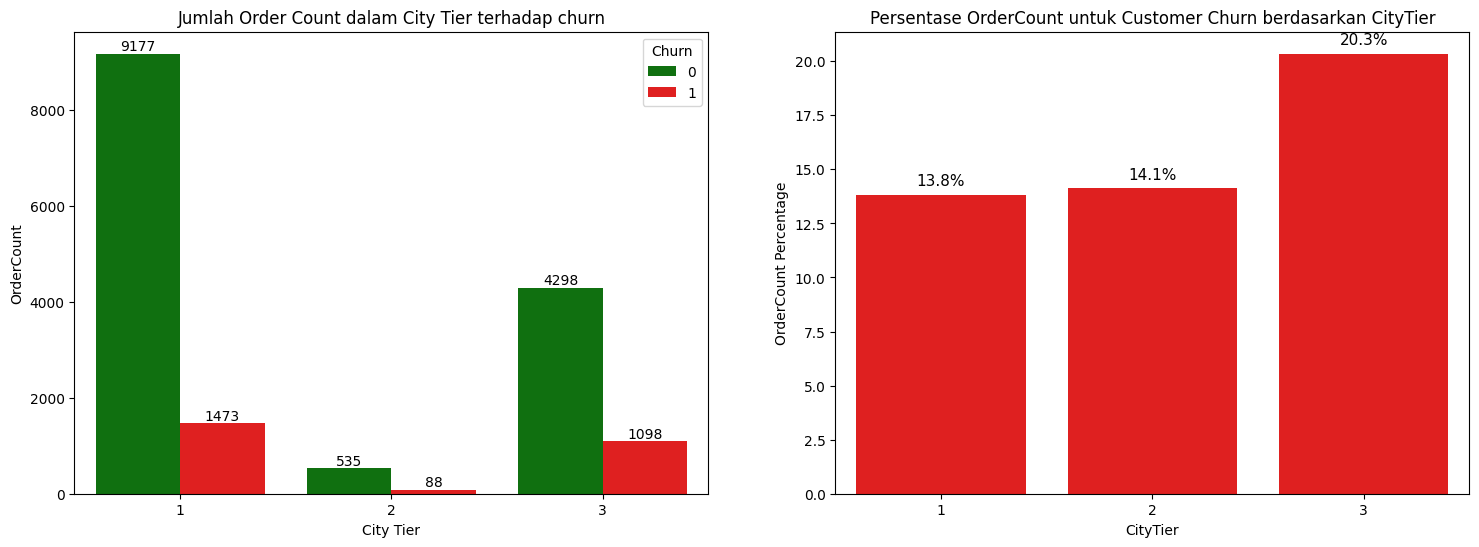

<Figure size 1000x600 with 0 Axes>

In [ ]:
# Membuat figure dan axes untuk subplot
fig, axs = plt.subplots(1, 2, figsize=(18, 6))

# Subplot 1: Jumlah OrderCound dalam setiap CityTier berdasarkan Churn dan non Churn
plt.figure(figsize=(10, 6))
sns.barplot(ax = axs[0], data=df_order_city, x='CityTier', y='OrderCount', hue='Churn', palette=['green', 'red'])
axs[0].set_title('Jumlah Order Count dalam City Tier terhadap churn')
axs[0].set_xlabel('City Tier')
axs[0].set_ylabel('OrderCount')

for p in axs[0].patches:
    height = p.get_height()
    if height!=0:
        axs[0].annotate(f'{height:.0f}',
                    (p.get_x() + p.get_width() / 2, height),
                    ha='center', va='bottom', color='black')

# Subplot 2: Persentase Churn berdasarkan CityTier
sns.barplot(ax=axs[1], data= df_order_city[df_order_city['Churn'] == 1], x='CityTier', y='OrderCount_Percentage', color='red')
axs[1].set_title('Persentase OrderCount untuk Customer Churn berdasarkan CityTier')
axs[1].set_xlabel('CityTier')
axs[1].set_ylabel('OrderCount Percentage')

for p in axs[1].patches:
    axs[1].annotate(f'{p.get_height():.1f}%',
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', color='black', fontsize=11, rotation=0, xytext=(0, 10),
                    textcoords='offset points')

# Menampilkan plot
plt.tight_layout()
plt.show()

Analisis Kuantitatif:
1. Total OrderCount: Total OrderCount untuk pelanggan non-churn jauh lebih tinggi daripada pelanggan yang churn.
   - Non-Churn: 14,010 order, Churn: 2,659 order.
2. Persentase OrderCount:
   - Mayoritas pelanggan non-churn berasal dari CityTier 1 (86.2%), diikuti oleh CityTier 2 (85.9%) dan CityTier 3 (79.7%).
   - Persentase pelanggan yang churn lebih tinggi di CityTier 3 (20.3%) dibandingkan dengan CityTier 1 (13.8%) dan CityTier 2 (14.1%).

Analisis Kualitatif:
1. Pengaruh Kota pada Churn: Terdapat perbedaan signifikan dalam kecenderungan churn antara CityTier. **CityTier 3 memiliki persentase churn yang lebih tinggi**, menunjukkan bahwa faktor geografis dapat mempengaruhi keputusan pelanggan untuk churn.
2. Kebiasaan Belanja: Meskipun mayoritas pelanggan berada di CityTier 1, mereka cenderung melakukan lebih banyak order, terutama yang tidak churn. Ini menunjukkan bahwa **pelanggan di CityTier 1 mungkin lebih terbiasa dengan penggunaan platform dan lebih loyal**.

Analisis Pola:
1. Pola Persentase OrderCount: Terdapat tren **penurunan persentase OrderCount pada kasus churn untuk setiap CityTier**, menunjukkan bahwa **frekuensi pembelian dapat menjadi faktor penting dalam keputusan churn**.

### **Customer Behavior**

#### Tenure

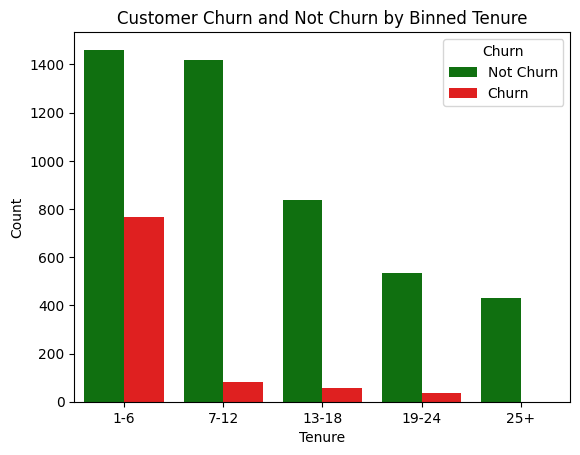

In [ ]:
bins = [0, 6, 13, 19, 25, np.inf]
labels = ['1-6', '7-12', '13-18', '19-24', '25+']
df['Tenure Binned'] = pd.cut(df['Tenure'], bins=bins, labels=labels, right=False)


sns.countplot(data=df, x='Tenure Binned', hue='Churn', palette={0: 'green', 1: 'red'}, dodge=True, order=labels)


plt.xlabel('Tenure')
plt.ylabel('Count')
plt.title('Customer Churn and Not Churn by Binned Tenure')
plt.legend(title='Churn', labels=['Not Churn', 'Churn'])


plt.show()



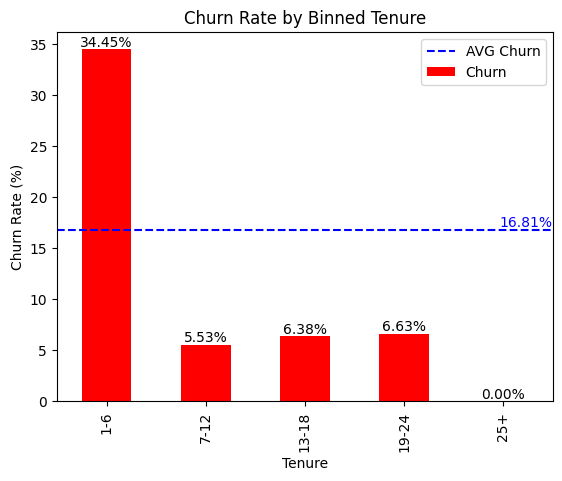

In [ ]:
churn_rate = df.groupby('Tenure Binned')['Churn'].mean() * 100

churn_rate.plot(kind='bar', color='red')

plt.xlabel('Tenure')
plt.ylabel('Churn Rate (%)')
plt.title('Churn Rate by Binned Tenure')

for i, rate in enumerate(churn_rate):
    plt.text(i, rate, f'{rate:.2f}%', ha='center', va='bottom')

average_churn = df['Churn'].mean() * 100
plt.axhline(y=average_churn, color='blue', linestyle='--', label='AVG Churn')
plt.text(len(churn_rate)-0.5, average_churn, f'{average_churn:.2f}%', color='blue', ha='right', va='bottom')

plt.legend()

plt.show()


-  Berdasarkan **Tenure** : Berdasarkan grafik diatas dapat dilihat bahwa tenure pada (1-6 bulan) memiliki tingkat churn tertinggi yaitu kurang lebih 5 kali lipat dibandingkan pada periode tenure lainnya. Namun terjadi penurunan yang sangat drastis pada tenure (7-12) hal ini menunjukkan bahwa customer mulai loyal terhadap layanan yang diberikan tetapi perlu kita ketahui bahwa terjadi kenaikan pada tenure setelah namun tidak secara signifikan. Namun semakin lama tenure nya customer yang churn menurun maka dari itu perlu kita jaga keloyalitasan para customer terhadap layanan yang diberikan.

#### Hour Spend On App

In [ ]:
customers_churned = df.groupby('HourSpendOnApp').Churn.sum()
total_customers = df['HourSpendOnApp'].value_counts()
customers_not_churn = total_customers - customers_churned
perc_of_total_cust = round(customers_churned * 100 / total_customers, 2)

result = pd.concat([total_customers, customers_churned, customers_not_churn,perc_of_total_cust], axis=1)
result.columns = ['Total_Customers','Customers_churned', 'customers_not_churn', 'perc_of_total_cust']
result = result.reset_index().rename(columns={'index': 'HourSpendOnApp'})
result_hour = result.sort_values(by='HourSpendOnApp')
print(result_hour)

   HourSpendOnApp  Total_Customers  Customers_churned  customers_not_churn  \
4             0.0                3                  0                    3   
3             1.0               35                  0                   35   
1             2.0             1470                231                 1239   
0             3.0             2940                517                 2423   
2             4.0             1175                198                  977   
5             5.0                3                  0                    3   

   perc_of_total_cust  
4                0.00  
3                0.00  
1               15.71  
0               17.59  
2               16.85  
5                0.00  


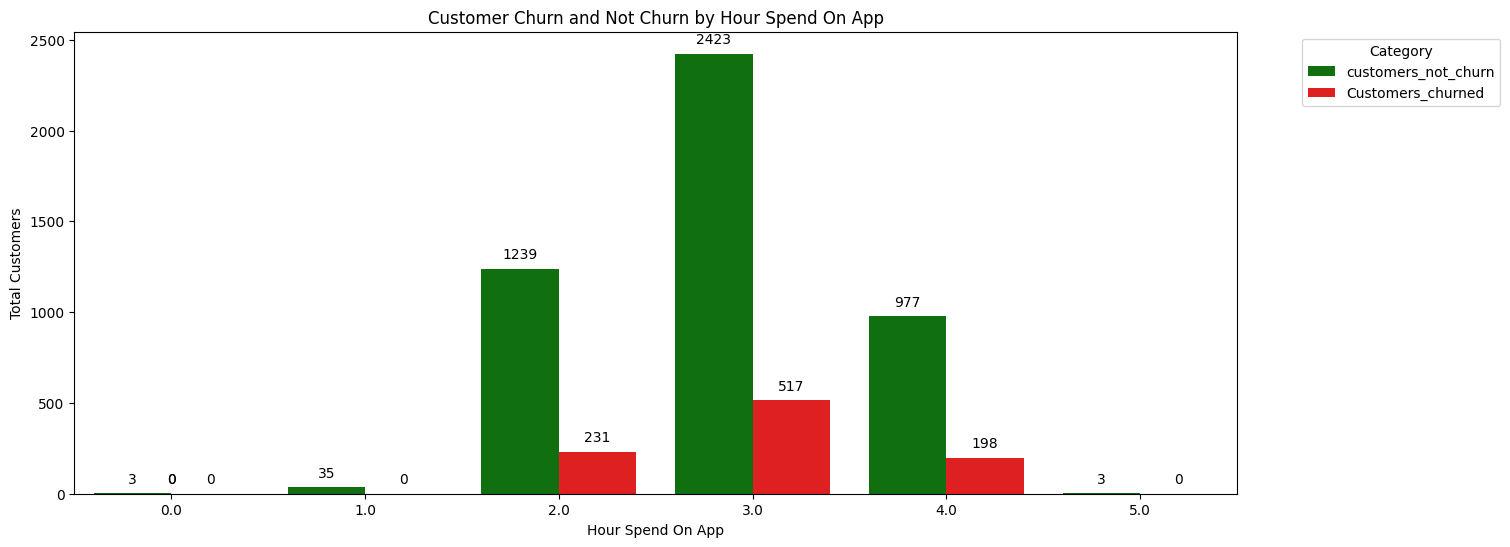

In [ ]:
# Melt DataFrame
hour_melt = pd.melt(result_hour, id_vars='HourSpendOnApp', value_vars=['customers_not_churn', 'Customers_churned'], var_name='Category', value_name='Count')
# Visualisasi
plt.figure(figsize=(15, 6))
sns.barplot(x='HourSpendOnApp', y='Count', hue='Category',data=hour_melt,palette={'customers_not_churn': 'green', 'Customers_churned': 'red'})

# label
for p in plt.gca().patches:
    price_label = f"{int(p.get_height())}"
    plt.gca().annotate(price_label, (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=10, color='black')
plt.title('Customer Churn and Not Churn by Hour Spend On App')
plt.xlabel('Hour Spend On App')
plt.ylabel('Total Customers')
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

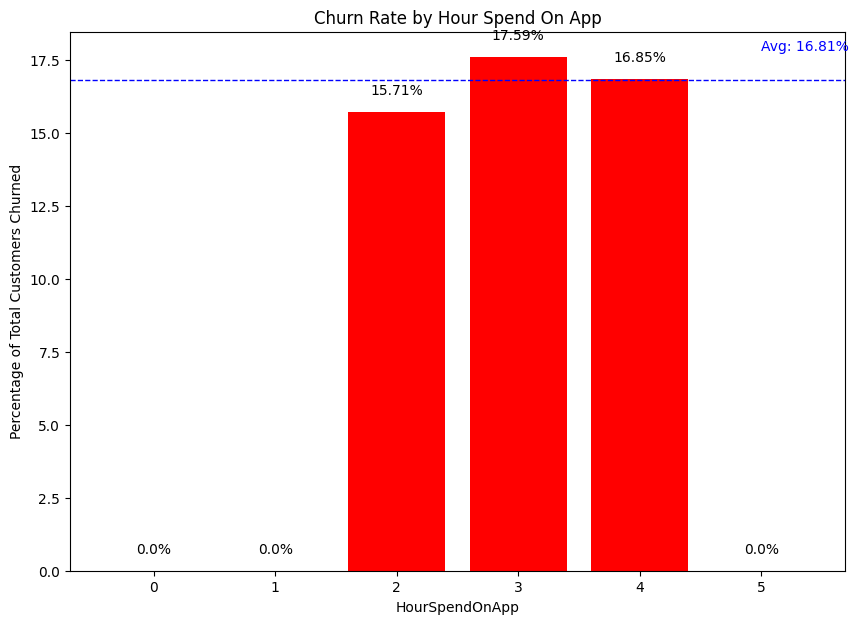

In [ ]:
# Visualisai
plt.figure(figsize=(10, 7))
plt.bar(result_hour['HourSpendOnApp'], result_hour['perc_of_total_cust'],color = 'red')
plt.xlabel('HourSpendOnApp')
plt.ylabel('Percentage of Total Customers Churned')
plt.title('Churn Rate by Hour Spend On App')

# Label
for device, perc in zip(result_hour['HourSpendOnApp'], result_hour['perc_of_total_cust']):
    plt.text(device, perc + 0.5, f'{perc}%', ha='center', va='bottom', fontsize=10)
plt.xticks(result_hour['HourSpendOnApp'])

# Add label for average churn rate
plt.axhline(y=avg_churn, color='blue', linestyle='--', linewidth=1)
plt.text(len(result_hour['HourSpendOnApp']) - 1, avg_churn + 1, f'Avg: {avg_churn:.2f}%', color='blue', fontsize=10)

plt.show()



- Berdasarkan **Waktu yang digunakan dalam sebuah aplikasi atau website**, dapat dilihat bahwa customer tidak ada yang mengalami churn ketika menggunakan aplikasi dalam kurun waktu 0, 1, dan 5 jam. Namun dapat dilihat jika kurun waktu 2-4 jam kemungkinan customer akan mengalami churn. Hal ini cukup disayangkan, karena jumlah customer pada jam tersebut tergolong sangat tinggi dibandingkan dengan jam yang tidak mengalami churn.

#### Complain

In [ ]:
customers_churned = df.groupby('Complain').Churn.sum()
total_customers = df['Complain'].value_counts()
customers_not_churn = total_customers - customers_churned
perc_of_total_cust = round(customers_churned * 100 / total_customers, 2)

result = pd.concat([total_customers, customers_churned, customers_not_churn,perc_of_total_cust], axis=1)
result.columns = ['Total_Customers','Customers_churned', 'customers_not_churn', 'perc_of_total_cust']
result = result.reset_index().rename(columns={'index': 'Complain'})
result_complain = result.sort_values(by='Complain')
print(result_complain)

   Complain  Total_Customers  Customers_churned  customers_not_churn  \
0         0             4024                440                 3584   
1         1             1602                506                 1096   

   perc_of_total_cust  
0               10.93  
1               31.59  


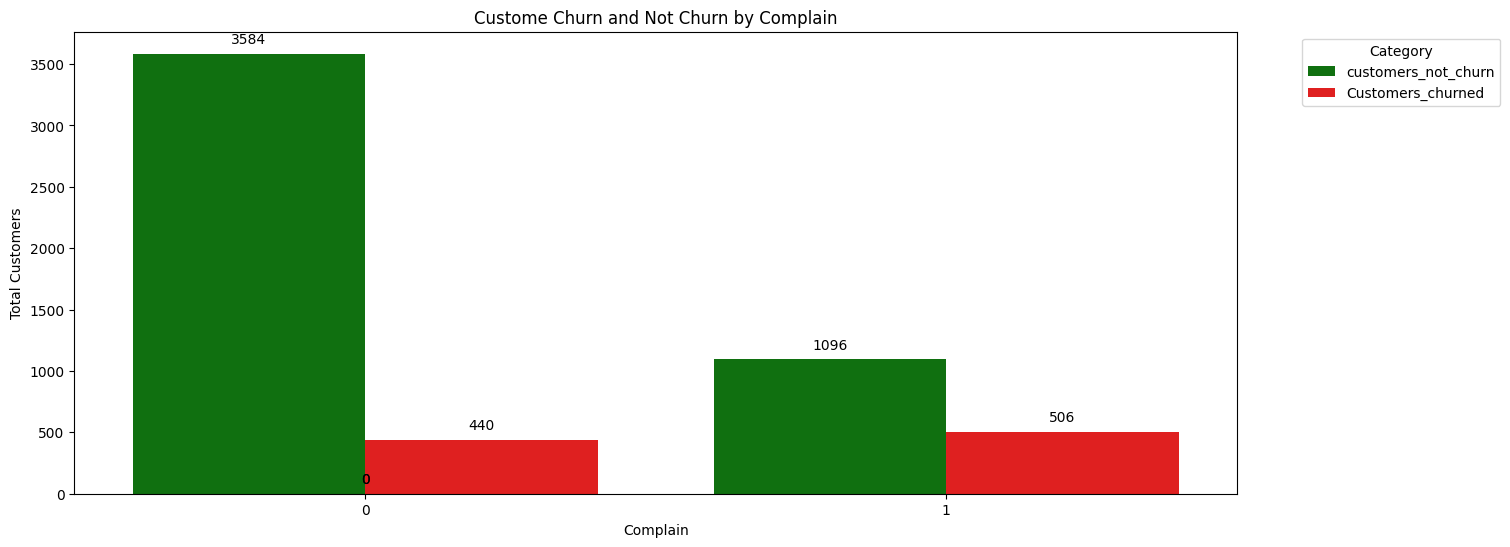

In [ ]:
# Melt DataFrame
complain_melt = pd.melt(result_complain, id_vars='Complain', value_vars=['customers_not_churn', 'Customers_churned'], var_name='Category', value_name='Count')
# Visualisasi
plt.figure(figsize=(15, 6))
sns.barplot(x='Complain', y='Count', hue='Category',data=complain_melt,palette={'customers_not_churn': 'green', 'Customers_churned': 'red'})

# label
for p in plt.gca().patches:
    price_label = f"{int(p.get_height())}"
    plt.gca().annotate(price_label, (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=10, color='black')
plt.title('Custome Churn and Not Churn by Complain')
plt.xlabel('Complain')
plt.ylabel('Total Customers')
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

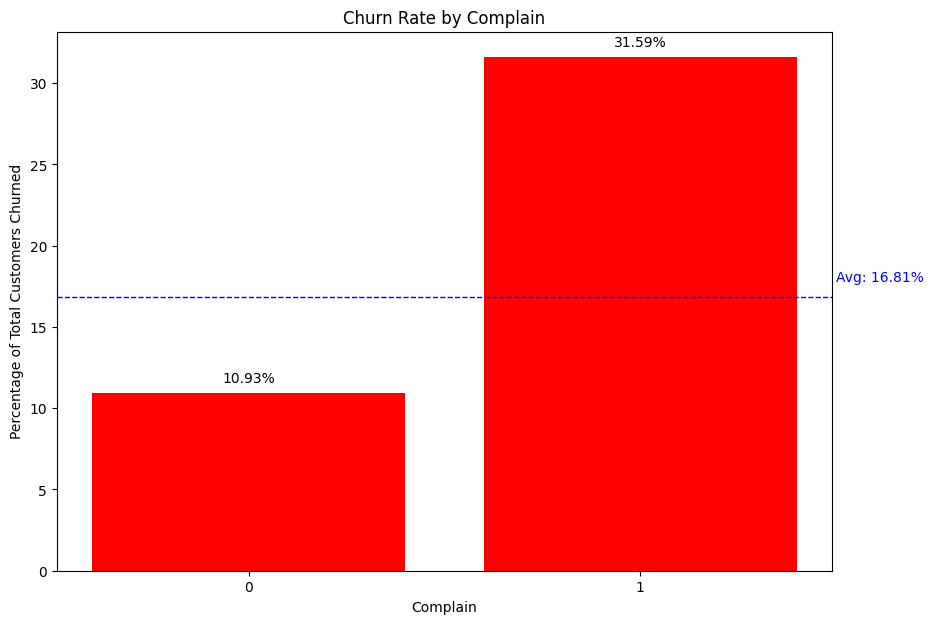

In [ ]:
# Visualisasi
plt.figure(figsize=(10, 7))
plt.bar(result_complain['Complain'], result_complain['perc_of_total_cust'],color ='red')
plt.xlabel('Complain')
plt.ylabel('Percentage of Total Customers Churned')
plt.title('Churn Rate by Complain')

# Label
for device, perc in zip(result_complain['Complain'], result_complain['perc_of_total_cust']):
    plt.text(device, perc + 0.5, f'{perc}%', ha='center', va='bottom', fontsize=10)
plt.xticks(result_complain['Complain'])

# Add label for average churn rate
plt.axhline(y=avg_churn, color='blue', linestyle='--', linewidth=1)
plt.text(len(result_complain['Complain']) - 0.5, avg_churn + 1, f'Avg: {avg_churn:.2f}%', color='blue', fontsize=10)

plt.show()

- Berdasarkan complain, terlihat bahwa total customer yang complain lebih sedikit dibandingkan yang tidak complain. Tetapi, jika dilihat dari persentase yang churn adalah 32% atau hampir 3 kali lipat dari yang tidak complain. Hal ini menunjukkan bahwa customer akan rentan untuk churn ketika memiliki complain terhadap layanan yang diberikan.


#### Complain in Satisfaction Score

In [ ]:
# Menghitung jumlah pengaduan berdasarkan SatisfactionScore dan Churn status
df_score_complain = df.groupby(['SatisfactionScore', 'Churn']).agg({'Complain': 'sum'}).reset_index()
df_score_complain['Complain_Percentage'] = df_score_complain.groupby('SatisfactionScore')['Complain'].transform(lambda x: x / x.sum() * 100)
df_score_complain

,SatisfactionScore,Churn,Complain,Complain_Percentage
0,1,0,294,79.032258
1,1,1,78,20.967742
2,2,0,128,76.190476
3,2,1,40,23.809524
4,3,0,308,65.254237
5,3,1,164,34.745763
6,4,0,164,61.194030
7,4,1,104,38.805970
8,5,0,202,62.732919
9,5,1,120,37.267081


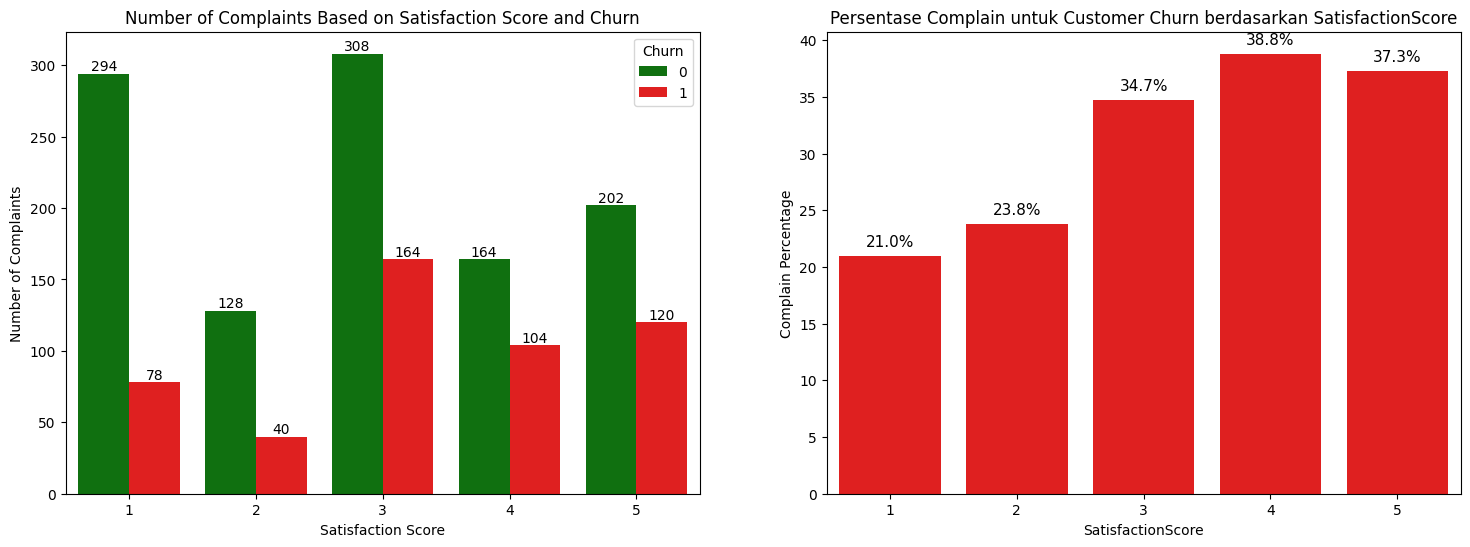

<Figure size 1000x600 with 0 Axes>

In [ ]:
# Membuat figure dan axes untuk subplot
fig, axs = plt.subplots(1, 2, figsize=(18, 6))

# Subplot 1: Jumlah complain dalam setiap satisfaction score berdasarkan churn dan tidak churn
plt.figure(figsize=(10, 6))
sns.barplot(ax= axs[0], data= df_score_complain, x='SatisfactionScore', y='Complain', hue='Churn', palette= ['green', 'red'])
axs[0].set_title('Number of Complaints Based on Satisfaction Score and Churn')
axs[0].set_xlabel('Satisfaction Score')
axs[0].set_ylabel('Number of Complaints')

# Add a top border label to each bar with text colored according to the hue
for p in axs[0].patches:
    if p.get_x() != 0:
      axs[0].annotate(f'{p.get_height():.0f}',
                  (p.get_x() + p.get_width() / 2, p.get_height()),
                  ha='center', va='bottom', color='black')

# Subplot 2: Persentase Churn berdasarkan CityTier
sns.barplot(ax=axs[1], data= df_score_complain[df_score_complain['Churn'] == 1], x='SatisfactionScore', y='Complain_Percentage', color='red')
axs[1].set_title('Persentase Complain untuk Customer Churn berdasarkan SatisfactionScore')
axs[1].set_xlabel('SatisfactionScore')
axs[1].set_ylabel('Complain Percentage')

for p in axs[1].patches:
    axs[1].annotate(f'{p.get_height():.1f}%',
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', color='black', fontsize=11, rotation=0, xytext=(0, 10),
                    textcoords='offset points')

# Menampilkan plot
plt.tight_layout()
plt.show()

1. Jumlah Complain Berdasarkan Satisfaction Score:
  - Satisfaction Score 1: Total 372 Complain, dengan 294 Non-Churn dan 78 Churn
  - Satisfaction Score 2: Total 168 Complain, dengan 128 Non-Churn dan 40 Churn
  - Satisfaction Score 3: Total 472 Complain, dengan 308 Non-Churn dan 164 Churn
  - Satisfaction Score 4: Total 164 Complain, dengan 164 Non-Churn dan 104 Churn
  - Satisfaction Score 5: Total 322 Complain, dengan 202 Non-Churn dan 120 Churn

2. Rata-rata Complain:
  - Non-Churn: Total complain = 294 + 128 + 308 + 164 + 202 = 1096, Rata-rata = 1096/5 = 219.2
  - Churn: Total complain = 78 + 40 + 164 + 104 + 120 = 506, Rata-rata = 506/5 = 101.2

3. Distribusi Complain dan Churn:
  - Pelanggan dengan Satisfaction Score rendah (1-2) yang churn memiliki jumlah complain yang relatif lebih rendah dibandingkan pelanggan yang tidak churn.
  - Satisfaction Score 3 dan 4 menunjukkan bahwa pelanggan yang churn memiliki jumlah complain yang signifikan lebih tinggi dibandingkan Satisfaction Score 1 dan 2.

4. Hubungan Antara Satisfaction Score dan Churn:
  - Pada Satisfaction Score 3, 4, dan 5, pelanggan yang churn cenderung memiliki complain yang lebih tinggi dibandingkan dengan yang tidak churn. `Hal ini menunjukkan bahwa keluhan mungkin memiliki pengaruh lebih besar terhadap churn pada tingkat kepuasan yang lebih tinggi (3-5).

5. Pola Complain:
  - Pelanggan dengan Satisfaction Score 3 yang tidak churn memiliki complain tertinggi (308), sedangkan pelanggan churn dengan Satisfaction Score 3 juga memiliki complain tinggi (164).
  - Jumlah complain pada Satisfaction Score 5 untuk non-churn dan churn juga relatif tinggi, menunjukkan bahwa meskipun puas, pelanggan tetap memiliki Complain yang mungkin mempengaruhi keputusan mereka untuk churn.

### **Customer Preferences**

#### Preferred Login Device

In [ ]:
customers_churned = df.groupby('PreferredLoginDevice').Churn.sum()
total_customers = df['PreferredLoginDevice'].value_counts()
customers_not_churn = total_customers - customers_churned
perc_of_total_cust = round(customers_churned * 100 / total_customers, 2)

result = pd.concat([total_customers, customers_churned, customers_not_churn,perc_of_total_cust], axis=1)
result.columns = ['Total_Customers','Customers_churned', 'customers_not_churn','perc_of_total_cust']
result = result.reset_index()
result_device = result.sort_values(by='perc_of_total_cust', ascending=False)
print(result_device)

  PreferredLoginDevice  Total_Customers  Customers_churned  \
1             Computer             1630                322   
0         Mobile Phone             3996                624   

   customers_not_churn  perc_of_total_cust  
1                 1308               19.75  
0                 3372               15.62  


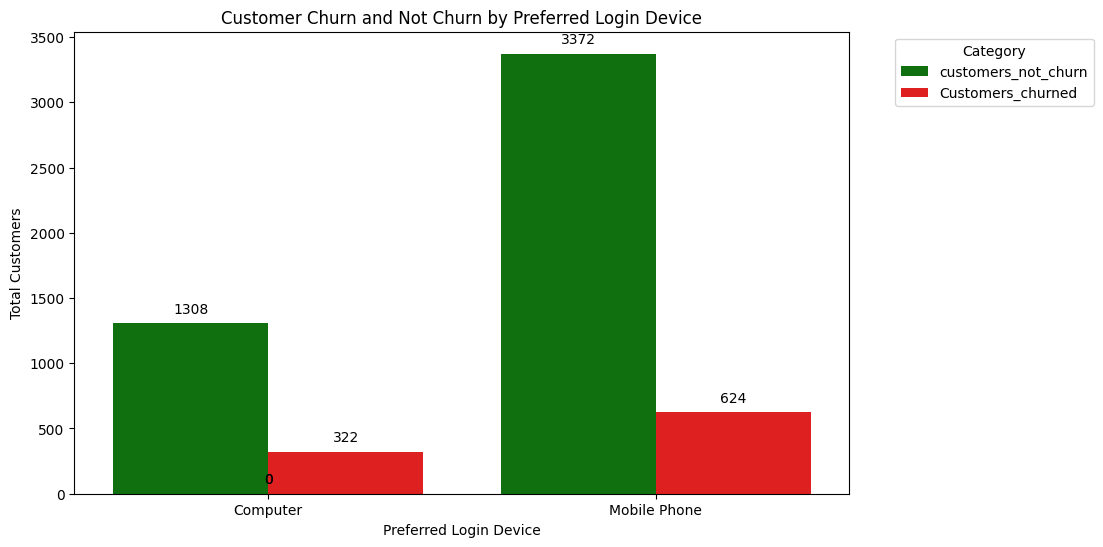

In [ ]:
# Melt DataFrame
device_melt = pd.melt(result_device, id_vars='PreferredLoginDevice', value_vars=['customers_not_churn', 'Customers_churned'], var_name='Category', value_name='Count')

# Visualisasi
plt.figure(figsize=(10, 6))
sns.barplot(x='PreferredLoginDevice', y='Count', hue='Category',data=device_melt, palette={'customers_not_churn': 'green', 'Customers_churned': 'red'})

# label
for p in plt.gca().patches:
    price_label = f"{int(p.get_height())}"
    plt.gca().annotate(price_label, (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=10, color='black')
plt.title('Customer Churn and Not Churn by Preferred Login Device')
plt.xlabel('Preferred Login Device')
plt.ylabel('Total Customers')
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

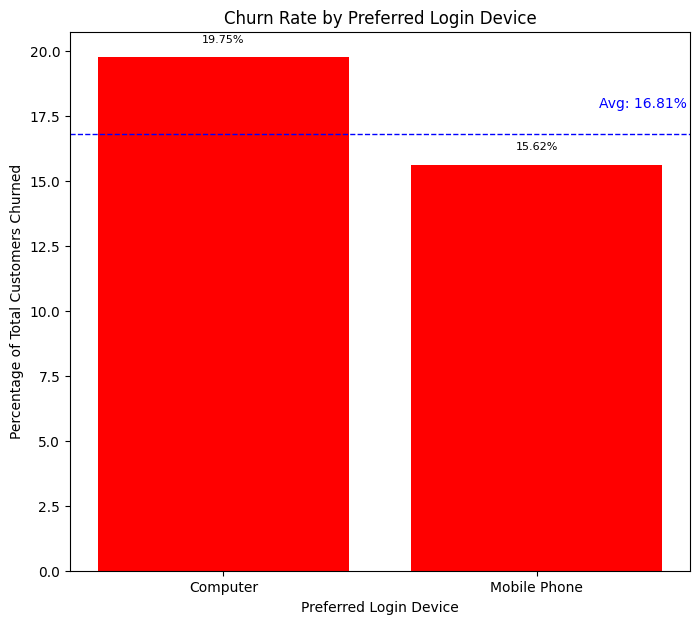

In [ ]:
# Visualisasi
plt.figure(figsize=(8, 7))
plt.bar(result_device['PreferredLoginDevice'], result_device['perc_of_total_cust'], color = 'red')
plt.xlabel('Preferred Login Device')
plt.ylabel('Percentage of Total Customers Churned')
plt.title('Churn Rate by Preferred Login Device')

# Label
for device, perc in zip(result_device['PreferredLoginDevice'], result_device['perc_of_total_cust']):
    plt.text(device, perc + 0.5, f'{perc}%', ha='center', va='bottom', fontsize=8)

# Add label for average churn rate
plt.axhline(y=avg_churn, color='blue', linestyle='--', linewidth=1)
plt.text(len(result_device['PreferredLoginDevice']) - 0.8, avg_churn + 1, f'Avg: {avg_churn:.2f}%', color='blue', fontsize=10)

plt.show()

- Berdasarkan **preferensi device** yang digunakan untuk melakukan login, Jumlah customer yang menggunakan komputer lebih sedikit dibandingkan dengan yang menggunakan mobile phone tetapi churn rate yang menggunakan komputer lebih tinggi yaitu hampir 20%. Hal ini menunjukkan bahwa customer lebih rentan untuk churn menggunakan komputer dibandingkan mobile phone.

#### Preferred Payment Mode

In [ ]:
customers_churned = df.groupby('PreferredPaymentMode').Churn.sum()
total_customers = df['PreferredPaymentMode'].value_counts()
customers_not_churn = total_customers - customers_churned
perc_of_total_cust = round(customers_churned * 100 / total_customers, 2)

result = pd.concat([total_customers, customers_churned, customers_not_churn,perc_of_total_cust], axis=1)
result.columns = ['Total_Customers','Customers_churned',  'customers_not_churn','perc_of_total_cust']
result = result.reset_index()
result_payment = result.sort_values(by='perc_of_total_cust', ascending=False)
print(result_payment)

  PreferredPaymentMode  Total_Customers  Customers_churned  \
3     Cash on Delivery              512                126   
2             E wallet              614                140   
4                  UPI              414                 72   
0           Debit Card             2312                356   
1          Credit Card             1774                252   

   customers_not_churn  perc_of_total_cust  
3                  386               24.61  
2                  474               22.80  
4                  342               17.39  
0                 1956               15.40  
1                 1522               14.21  


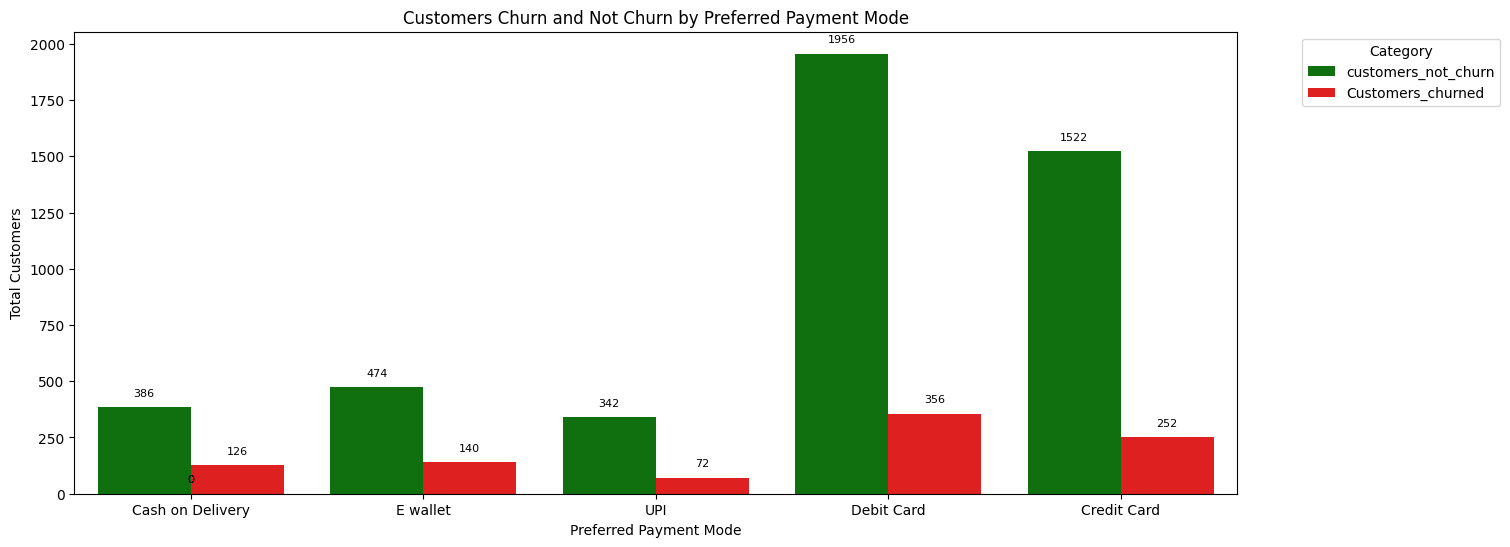

In [ ]:
# Melt DataFrame
payment_melt = pd.melt(result_payment, id_vars='PreferredPaymentMode', value_vars=['customers_not_churn', 'Customers_churned'], var_name='Category', value_name='Count')
# Visualisasi
plt.figure(figsize=(15, 6))
sns.barplot(x='PreferredPaymentMode', y='Count', hue='Category',data=payment_melt,palette={'customers_not_churn': 'green', 'Customers_churned': 'red'})

# label
for p in plt.gca().patches:
    price_label = f"{int(p.get_height())}"
    plt.gca().annotate(price_label, (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=8, color='black')
plt.title('Customers Churn and Not Churn by Preferred Payment Mode')
plt.xlabel('Preferred Payment Mode')
plt.ylabel('Total Customers')
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

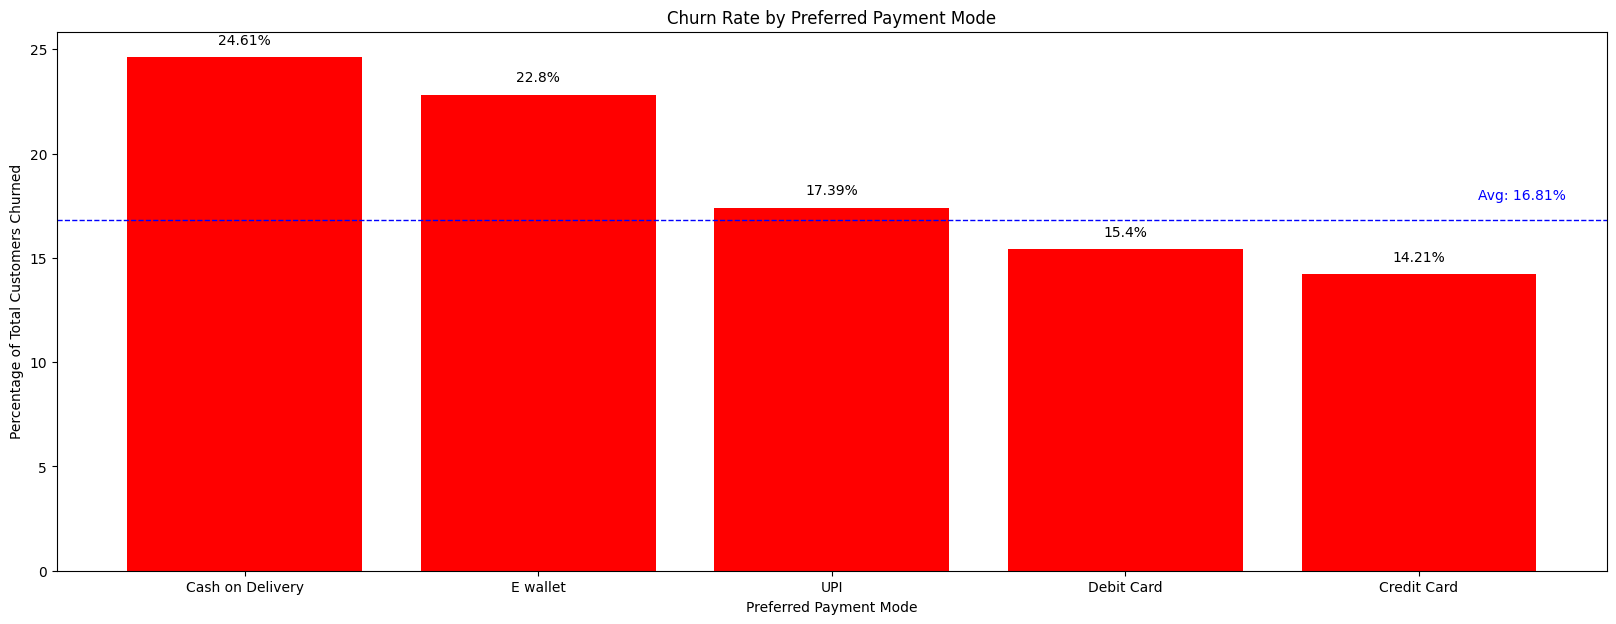

In [ ]:
# Visualisasi
plt.figure(figsize=(20, 7))
plt.bar(result_payment['PreferredPaymentMode'], result_payment['perc_of_total_cust'],color = 'red')
plt.xlabel('Preferred Payment Mode')
plt.ylabel('Percentage of Total Customers Churned')
plt.title('Churn Rate by Preferred Payment Mode')

# Label
for device, perc in zip(result_payment['PreferredPaymentMode'], result_payment['perc_of_total_cust']):
    plt.text(device, perc + 0.5, f'{perc}%', ha='center', va='bottom', fontsize=10)

# Add label for average churn rate
plt.axhline(y=avg_churn, color='blue', linestyle='--', linewidth=1)
plt.text(len(result_payment['PreferredPaymentMode']) - 0.8, avg_churn + 1, f'Avg: {avg_churn:.2f}%', color='blue', fontsize=10)

plt.show()


- Berdasarkan **Preferensi metode pembayaran**, dapat dilihat bahwa customer yang membayar dengan menggunakan COD cenderung sedikit dibandingkan dengan metode pembayaran hal ini juga dapat dilihat bahwa churn rate pada metode ini cukup tinggi yaitu 25%. Hal ini terjadi mungkin karena customer merasa kurang nyaman dan membutuhkan metode pembayaran yang lebih praktis dan modern.

#### Prefered Order Cat

In [ ]:
customers_churned = df.groupby('PreferedOrderCat').Churn.sum()
total_customers = df['PreferedOrderCat'].value_counts()
customers_not_churn = total_customers - customers_churned
perc_of_total_cust = round(customers_churned * 100 / total_customers, 2)

result = pd.concat([total_customers, customers_churned, customers_not_churn,perc_of_total_cust], axis=1)
result.columns = ['Total_Customers','Customers_churned',  'customers_not_churn','perc_of_total_cust']
result = result.reset_index()
result_cat = result.sort_values(by='perc_of_total_cust', ascending=False)
print(result_cat)

     PreferedOrderCat  Total_Customers  Customers_churned  \
0        Mobile Phone             2078                568   
2             Fashion              826                128   
1  Laptop & Accessory             2048                210   
4              Others              264                 20   
3             Grocery              410                 20   

   customers_not_churn  perc_of_total_cust  
0                 1510               27.33  
2                  698               15.50  
1                 1838               10.25  
4                  244                7.58  
3                  390                4.88  


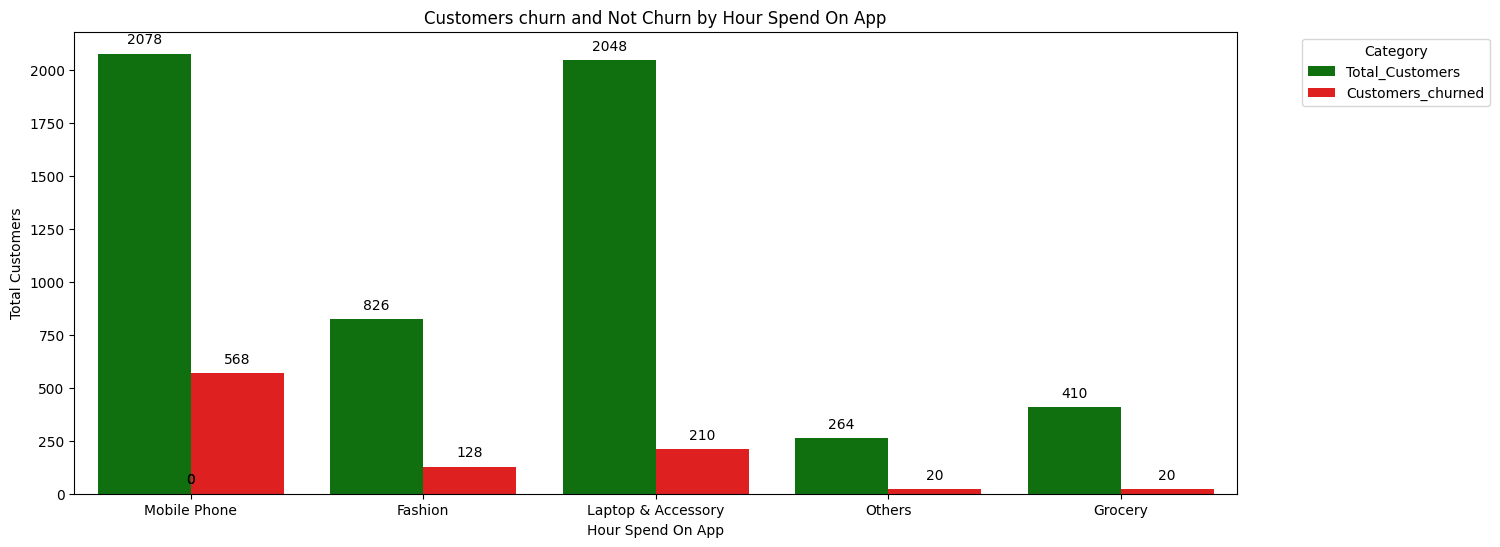

In [ ]:
# Melt DataFrame
cat_melt = pd.melt(result_cat, id_vars='PreferedOrderCat', value_vars=['Total_Customers', 'Customers_churned'], var_name='Category', value_name='Count')
# Visualisasi
plt.figure(figsize=(15, 6))
sns.barplot(x='PreferedOrderCat', y='Count', hue='Category',data=cat_melt,palette={'Total_Customers': 'green', 'Customers_churned': 'red'})

# label
for p in plt.gca().patches:
    price_label = f"{int(p.get_height())}"
    plt.gca().annotate(price_label, (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=10, color='black')
plt.title('Customers churn and Not Churn by Hour Spend On App')
plt.xlabel('Hour Spend On App')
plt.ylabel('Total Customers')
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

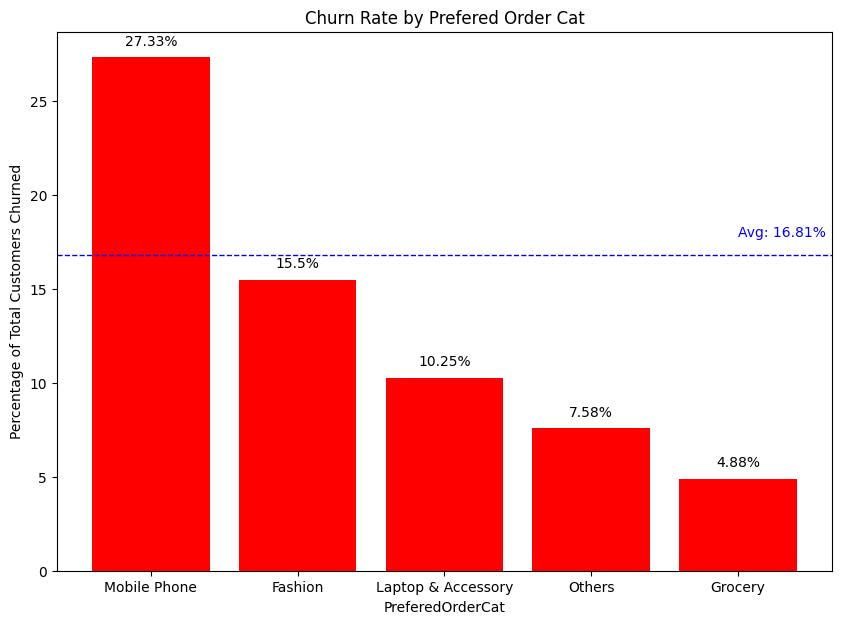

In [ ]:
# Visualisasi
plt.figure(figsize=(10, 7))
plt.bar(result_cat['PreferedOrderCat'], result_cat['perc_of_total_cust'],color = 'red')
plt.xlabel('PreferedOrderCat')
plt.ylabel('Percentage of Total Customers Churned')
plt.title('Churn Rate by Prefered Order Cat')

# Label
for device, perc in zip(result_cat['PreferedOrderCat'], result_cat['perc_of_total_cust']):
    plt.text(device, perc + 0.5, f'{perc}%', ha='center', va='bottom', fontsize=10)

# Add line & label for average churn rate
plt.axhline(y=avg_churn, color='blue', linestyle='--', linewidth=1)
plt.text(len(result_cat['PreferedOrderCat']) - 1, avg_churn + 1, f'Avg: {avg_churn:.2f}%', color='blue', fontsize=10)

plt.show()


- Berdasarkan **Preferensi pemesanan berdasarkan kategori** produk, pelanggan di kategori mobile phone menunjukkan tingkat churn yang tinggi yaitu 27% hal ini mungkin terjadi karena kemungkinan para customer melakukan pembelian terhadap produk elektronik hanya sesekali dan bukan menjadi kebutuhan primer yang menjadi sebuah rutinitas. Sedangkan category yang memiliki tingkat churn rendah yaitu kategori others dan grocery, hal ini menunjukkan bahwa customer di tingkat kategori ini cenderung lebih loyal menggunakan e-commerce untuk berbelanja.


#### Warehouse To Home

In [ ]:
# Merging warehouse to home 50+
df['WarehouseToHome'] = df['WarehouseToHome'].apply(lambda x: '36+' if pd.notna(x) and x > 36.0 else str(int(x)))

# Menghitung jumlah churn dan tidak churn berdasarkan WarehouseToHome
customers_churned = df.groupby('WarehouseToHome').Churn.sum()
total_customers = df['WarehouseToHome'].value_counts()
customers_not_churn = total_customers - customers_churned
perc_of_total_cust = round(customers_churned * 100 / total_customers, 2)

# Menggabungkan hasil ke dalam satu data frame
result = pd.concat([total_customers, customers_churned, customers_not_churn, perc_of_total_cust], axis=1)
result.columns = ['Total_Customers', 'Customers_churned', 'customers_not_churn', 'perc_of_total_cust']
result = result.reset_index().rename(columns={'index': 'WarehouseToHome'})

# Menentukan urutan kategori khusus untuk WarehouseToHome
order = [str(i) for i in range(0, 37)] + ['36+']
result['WarehouseToHome'] = pd.Categorical(result['WarehouseToHome'], categories=order, ordered=True)
result_warehouse = result.sort_values(by='WarehouseToHome')

print(result_warehouse)


   WarehouseToHome  Total_Customers  Customers_churned  customers_not_churn  \
31               5                8                  1                    7   
5                6              295                 34                  261   
3                7              389                 49                  340   
2                8              444                 58                  386   
0                9              559                 80                  479   
7               10              273                 43                  230   
9               11              232                 31                  201   
10              12              221                 30                  191   
8               13              249                 30                  219   
1               14              550                124                  426   
6               15              287                 52                  235   
4               16              321                 

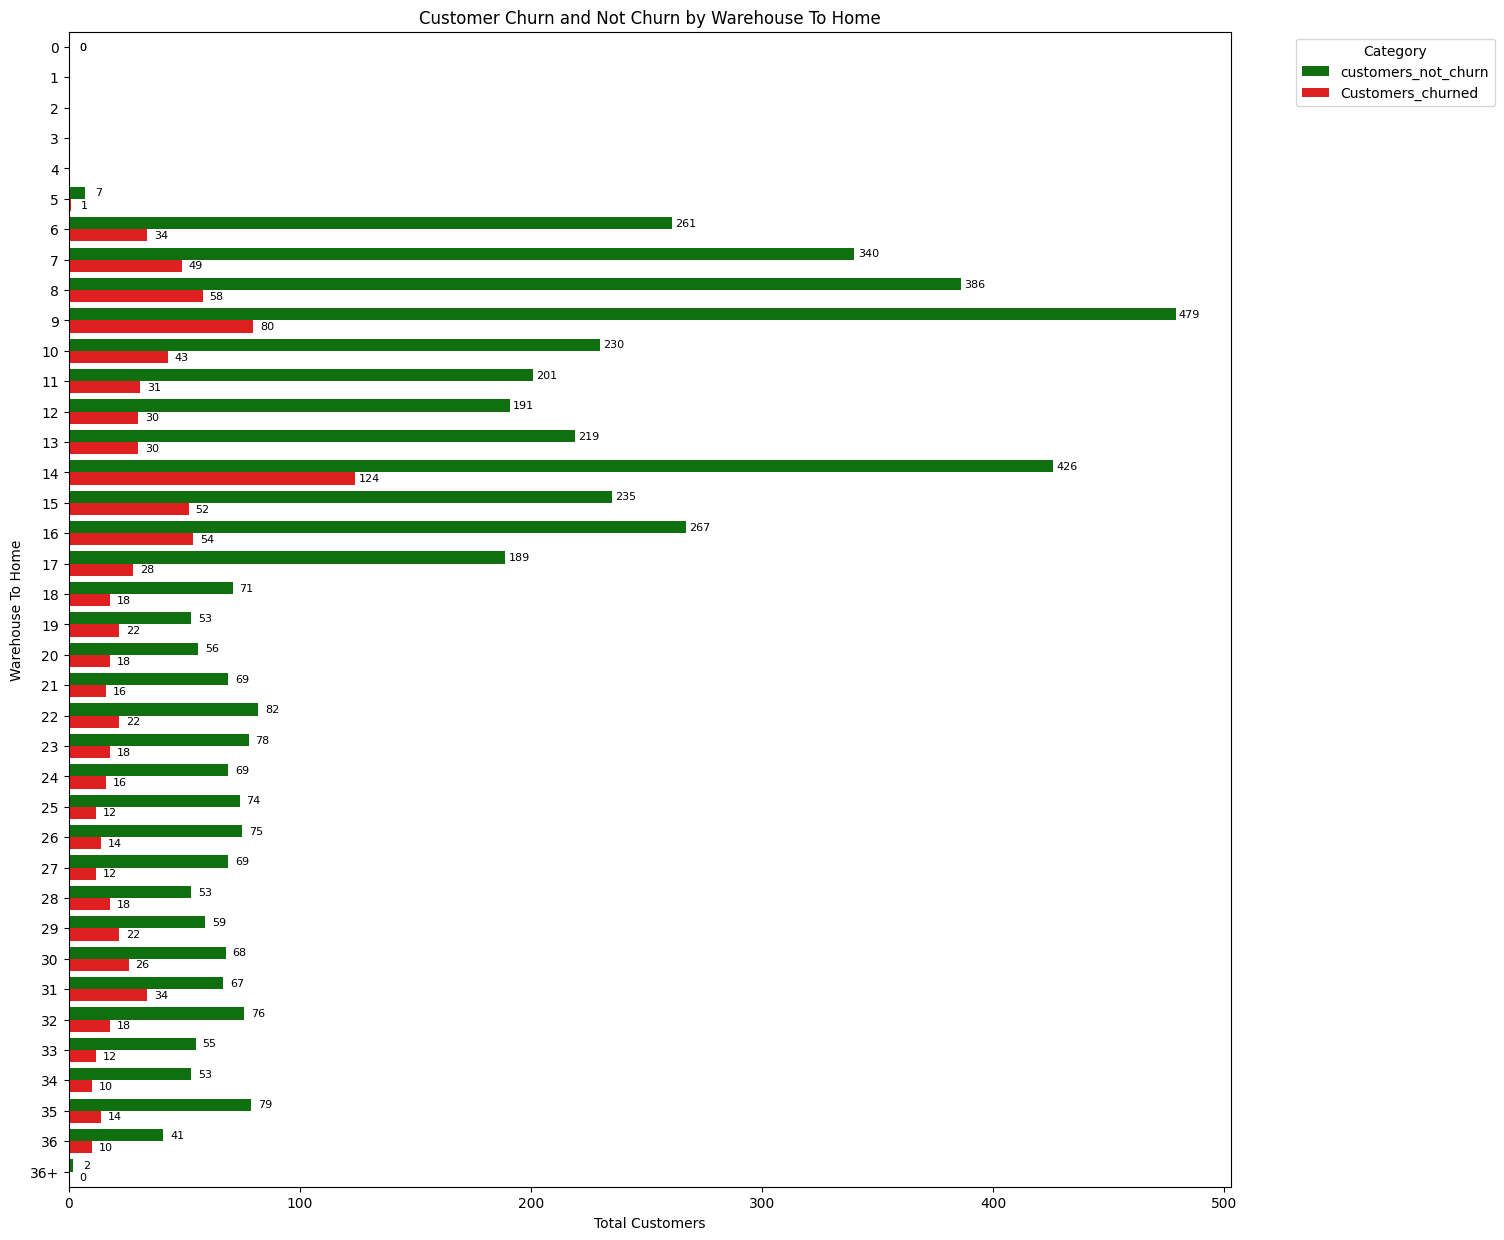

In [ ]:
# Melt DataFrame - Merubah format dataframe
warehouse_melt = pd.melt(result_warehouse, id_vars='WarehouseToHome', value_vars=['customers_not_churn', 'Customers_churned'], var_name='Category', value_name='Count')

# Visualisasi
plt.figure(figsize=(15,15))
sns.barplot(x='Count', y='WarehouseToHome', hue='Category', data=warehouse_melt, palette={'customers_not_churn': 'green', 'Customers_churned': 'red'}, orient='h')

# Menambahkan label pada setiap bar
for p in plt.gca().patches:
    price_label = f"{int(p.get_width())}"
    plt.gca().annotate(price_label, (p.get_width(), p.get_y() + p.get_height() / 2),
                       ha='center', va='center', xytext=(10, 0), textcoords='offset points', fontsize=8, color='black')

# Menambahkan judul dan label sumbu
plt.title('Customer Churn and Not Churn by Warehouse To Home')
plt.xlabel('Total Customers')
plt.ylabel('Warehouse To Home')
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

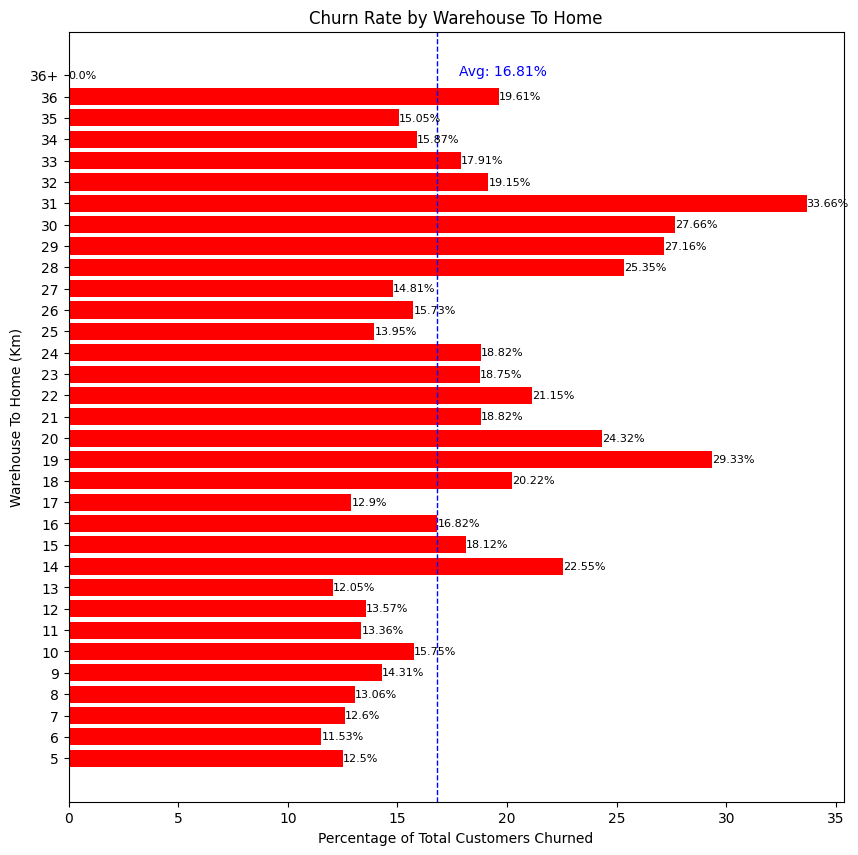

In [ ]:
plt.figure(figsize=(10,10))  # Adjusted figsize for better visualization
bars = plt.barh(result_warehouse['WarehouseToHome'], result_warehouse['perc_of_total_cust'], color='red')
plt.xlabel('Percentage of Total Customers Churned')
plt.ylabel('Warehouse To Home (Km)')
plt.title('Churn Rate by Warehouse To Home')

# Adding the percentage values beside the bars
for bar, perc in zip(bars, result_warehouse['perc_of_total_cust']):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{perc}%', ha='left', va='center', fontsize=8)

# Add line & label for average churn rate
plt.axvline(x=avg_churn, color='blue', linestyle='--', linewidth=1)
plt.text(avg_churn + 1, len(result_warehouse['WarehouseToHome']) - 1, f'Avg: {avg_churn:.2f}%', color='blue', fontsize=10)

plt.show()

-  Berdasarkan **Jarak gudang ke rumah**, dapat dilihat bahwa variasi yang signifikan dalam tingkat churn berdasarkan jarak dari gudang ke rumah pelanggan. jarak antara 19 km dan 29km sampai dengan 31km memiliki tingkat churn tertinggi yaitu lebih dari 25%. Hal ini menunjukkan bahwa jarak dan waktu pengiriman dalam rentang ini mungkin berpengaruh terhadap ketidakpuasan customer secara signifikan. Sedangkan Jarak yang ekstrem yaitu lebih dari 50km tidak menunjukkan churn, hal ini mungkin karena jumlah total pelanggan nya sangat rendah masing-masing hanya 1 customer saja. Hal ini juga mengindikasi bahwa jarak sangat pendek dan sangat jauh tidak selalu berhubungan langsung dengan tingkat churn yang tinggi atau rendah.

#### Coupon Used

In [ ]:
customers_churned = df.groupby('CouponUsed').Churn.sum()
total_customers = df['CouponUsed'].value_counts()
customers_not_churn = total_customers - customers_churned
perc_of_total_cust = round(customers_churned * 100 / total_customers, 2)

result = pd.concat([total_customers, customers_churned, customers_not_churn,perc_of_total_cust], axis=1)
result.columns = ['Total_Customers','Customers_churned',  'customers_not_churn','perc_of_total_cust']
result = result.reset_index()
result_coupon = result.sort_values(by='perc_of_total_cust', ascending=False)
print(result_coupon)

    CouponUsed  Total_Customers  Customers_churned  customers_not_churn  \
16        15.0                1                  1                    0   
15        16.0                2                  1                    1   
9         10.0               14                  3                   11   
8          8.0               42                  9                   33   
7          7.0               89                 18                   71   
2          0.0             1030                186                  844   
5          5.0              129                 23                  106   
1          2.0             1281                221                 1060   
6          6.0              108                 18                   90   
11        11.0               12                  2                   10   
0          1.0             2359                385                 1974   
10         9.0               13                  2                   11   
4          4.0           

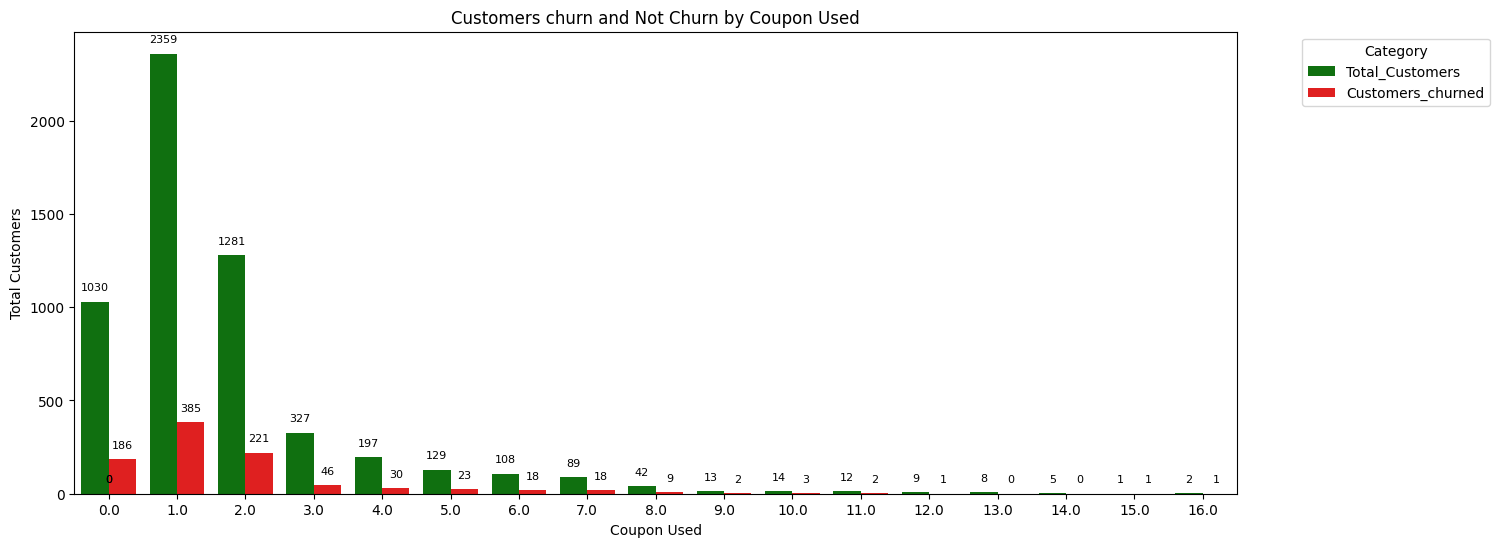

In [ ]:
# Melt DataFrame
coupon_melt = pd.melt(result_coupon, id_vars='CouponUsed', value_vars=['Total_Customers', 'Customers_churned'], var_name='Category', value_name='Count')
# Visualisasi
plt.figure(figsize=(15, 6))
sns.barplot(x='CouponUsed', y='Count', hue='Category',data=coupon_melt,palette={'Total_Customers': 'green', 'Customers_churned': 'red'})

# label
for p in plt.gca().patches:
    price_label = f"{int(p.get_height())}"
    plt.gca().annotate(price_label, (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=8, color='black')
plt.title('Customers churn and Not Churn by Coupon Used')
plt.xlabel('Coupon Used')
plt.ylabel('Total Customers')
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

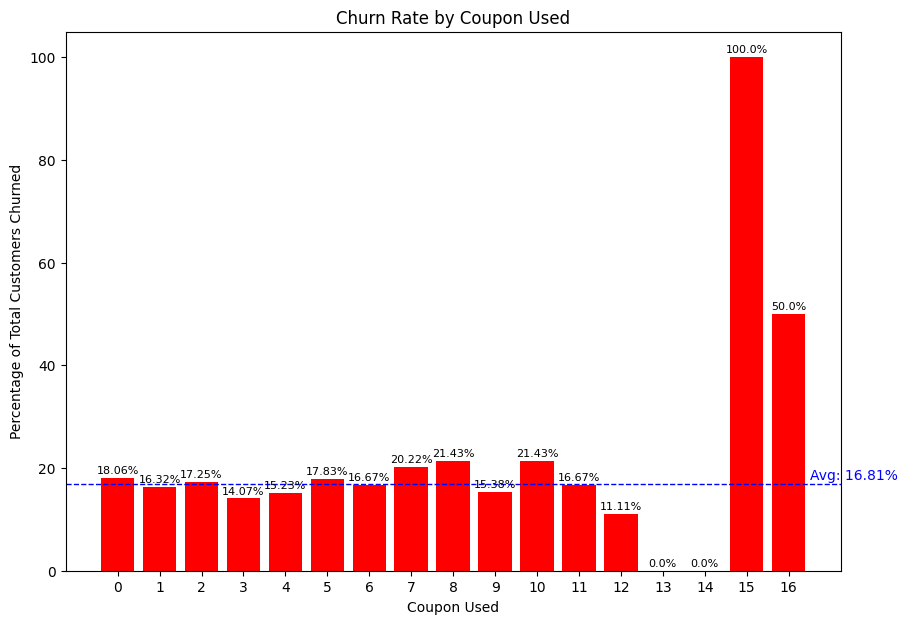

In [ ]:
# Visualisasi
plt.figure(figsize=(10, 7))
plt.bar(result_coupon['CouponUsed'], result_coupon['perc_of_total_cust'],color = 'red')
plt.xlabel('Coupon Used')
plt.ylabel('Percentage of Total Customers Churned')
plt.title('Churn Rate by Coupon Used')

# Label
for device, perc in zip(result_coupon['CouponUsed'], result_coupon['perc_of_total_cust']):
    plt.text(device, perc + 0.5, f'{perc}%', ha='center', va='bottom', fontsize=8)
plt.xticks(result_coupon['CouponUsed'])

# Add line & label for average churn rate
plt.axhline(y=avg_churn, color='blue', linestyle='--', linewidth=1)
plt.text(len(result_coupon['CouponUsed']) - 0.5, avg_churn + 1, f'Avg: {avg_churn:.2f}%', color='blue', fontsize=10)

plt.show()

- Berdasarkan kupon yang digunakan dapat dilihat bahwa ketika penggunaan kupon diantara 15 dan 16, persentase churn adalah 100% dan 50% masing-masing. Namun, jumlah pelanggan dalam kategori ini sangat kecil yaitu 1 dan 2 pelanggan, sehingga hasilnya tidak representatif. Namun terdapat pola bahwa penggunaan kupon yang lebih tinggi cenderung berhubungan dengan tingkat churn yang lebih rendah. Ini bisa diartikan bahwa pelanggan yang lebih sering menggunakan kupon memiliki kecenderungan untuk tetap berlangganan.

#### CouponUsed in PreferredPaymentMode

In [ ]:
df_payment_coupon = df.groupby(['PreferredPaymentMode', 'Churn']).agg({'CouponUsed': 'sum'}).reset_index()
df_payment_coupon['CouponUsed_Percentage'] = df_payment_coupon.groupby('PreferredPaymentMode')['CouponUsed'].transform(lambda x: x / x.sum() * 100)
df_payment_coupon

,PreferredPaymentMode,Churn,CouponUsed,CouponUsed_Percentage
0,Cash on Delivery,0,719.0,77.145923
1,Cash on Delivery,1,213.0,22.854077
2,Credit Card,0,2553.0,85.786290
3,Credit Card,1,423.0,14.213710
4,Debit Card,0,3336.0,84.009066
5,Debit Card,1,635.0,15.990934
6,E wallet,0,858.0,79.591837
7,E wallet,1,220.0,20.408163
8,UPI,0,575.0,81.792319
9,UPI,1,128.0,18.207681


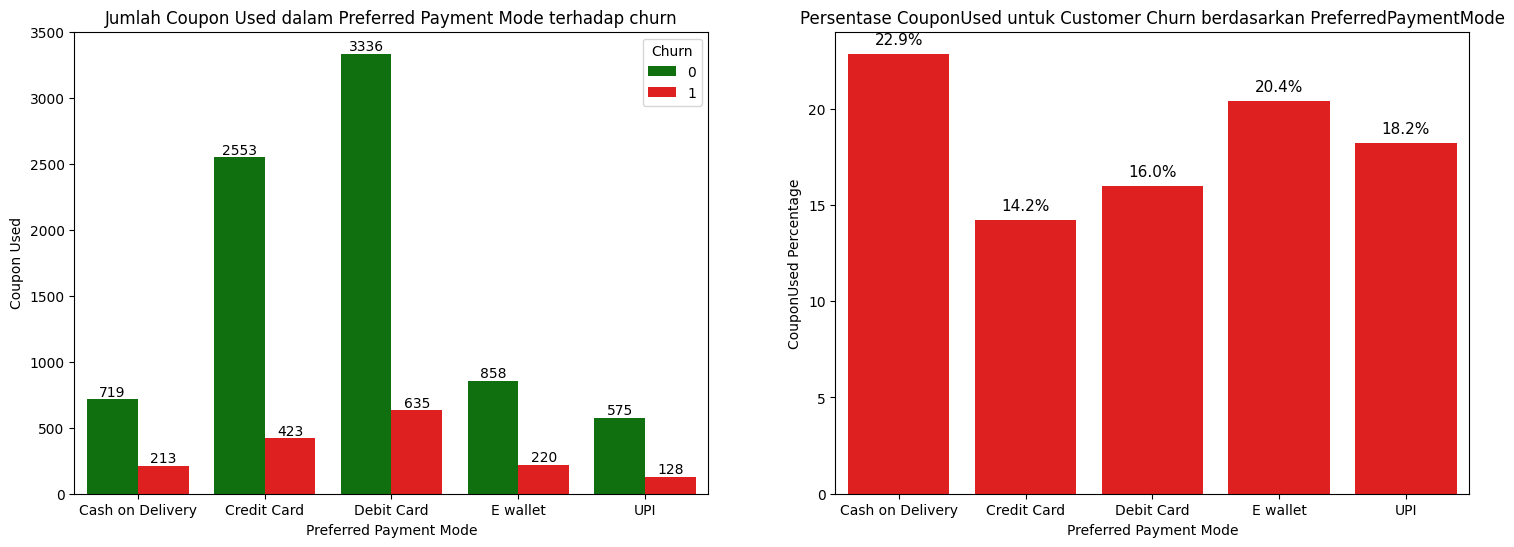

<Figure size 1000x600 with 0 Axes>

In [ ]:
# Membuat figure dan axes untuk subplot
fig, axs = plt.subplots(1, 2, figsize=(18, 6))

# Subplot 1: Total Coupon dalam setiap PreferredPaymentMode berdasarkan Churn
plt.figure(figsize=(10, 6))
sns.barplot(ax=axs[0], data=df_payment_coupon, x='PreferredPaymentMode', y='CouponUsed', hue='Churn', palette=['green', 'red'])
axs[0].set_title('Jumlah Coupon Used dalam Preferred Payment Mode terhadap churn')
axs[0].set_xlabel('Preferred Payment Mode')
axs[0].set_ylabel('Coupon Used')

# Menambahkan label CouponUsed pada setiap bar
for p in axs[0].patches:
    height = p.get_height()
    if height != 0:
      axs[0].annotate(f'{height:.0f}',
                  (p.get_x() + p.get_width() / 2, height),
                  ha='center', va='bottom', color='black')

# Subplot 2: Persentase Churn berdasarkan CityTier
sns.barplot(ax=axs[1], data= df_payment_coupon[df_payment_coupon['Churn'] == 1], x='PreferredPaymentMode', y='CouponUsed_Percentage', color='red')
axs[1].set_title('Persentase CouponUsed untuk Customer Churn berdasarkan PreferredPaymentMode')
axs[1].set_xlabel('Preferred Payment Mode')
axs[1].set_ylabel('CouponUsed Percentage')

for p in axs[1].patches:
    axs[1].annotate(f'{p.get_height():.1f}%',
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', color='black', fontsize=11, rotation=0, xytext=(0, 10),
                    textcoords='offset points')

# Menampilkan plot
plt.tight_layout()
plt.show()

Analisis Kuantitatif:

1. Cash on Delivery: Total penggunaan kupon sebesar 932, dengan persentase penggunaan 77.15% pada non Churn dan 22.85% pada kasus churn.
2. Credit Card: Total penggunaan kupon sebesar 2976, dengan persentase penggunaan 85.79% pada non churn dan 14.21% pada kasus churn.
3. Debit Card: Total penggunaan kupon sebesar 3971, dengan persentase penggunaan 84.01% pada non churn dan 15.99% pada kasus churn.
4. E-wallet: Total penggunaan kupon sebesar 1078, dengan persentase  penggunaan 79.59% pada non churn dan 20.41% pada kasus churn.
5. UPI: Total pengunaan kupon sebesar 703, dengan persentase penggunaan 81.79% pada non churn dan 18.21% pada kasus churn.

Analisis Pola terhadap Churn dan Non-Churn:
- **Penggunaan kupon cenderung lebih rendah pada pelanggan yang cenderung untuk churn, terlepas dari metode pembayaran yang digunakan**, menunjukkan bahwa strategi kupon yang saat ini diterapkan masih belum maksimal dalam mempertahankan pelanggan


## **Analysis Conclusion**
- Berdasarkan **customer demography** perbedaan churn rate antara gender, status pernikahan, dan city tier yang menunjukkan bahwa laki-laki dan customer di city tier 3 memiliki churn rate lebih tinggi, sedangkan customer dengan status yang menikah lebih loyal dibandingkan dengan customer yang berstatus single atau bercerai, hal ini mengindikasikan bahwa preferensi, kebutuhan, dan perkembangan infrastruktur mempengaruhi kepuasan dan loyalitas pelanggan

- Berdasarkan **Customer Behavior**, didapatkan bahwa customer dengan dengan tenure baru memiliki tingkat churn cukup tinggi yaitu lebih dari 34%, tetapi semakin lama tenure tingkat churn nya tergolong menurun hal ini berarti bahwa customer loyal dan setia pada layanan. Dari segi waktu customer membuka aplikasi, customer mengalami churn ketika berada di aplikasi sekitar 2-4 jam dan lebih dari 5 jam. Hal ini memungkinkan bahwa aplikasi atau website yang disediakan kurang friendly atau sedikit membosankan bagi para customer. Selain itu, customer yang memberikan complain rentan untuk churn. Complain cenderung lebih berpengaruh pada keputusan churn pada tingkat kepuasan yang lebih tinggi

- Berdasarkan **Customer Preferences**, pelanggan yang menggunakan komputer untuk login, metode pembayaran COD, dan membeli produk kategori mobile phone menunjukkan churn rate yang lebih tinggi, sementara penggunaan kupon yang lebih tinggi cenderung meningkatkan loyalitas pelanggan; jarak tertentu dari gudang juga mempengaruhi churn, dengan jarak 19 km hingga 31 km menunjukkan churn rate tertinggi.

  Untuk tingginya churn rate dari customer pembeli mobile phone, membeli handphone seringkali merupakan keputusan yang jarang dibuat, terutama karena orang cenderung mempertahankan ponsel mereka selama beberapa tahun sebelum mempertimbangkan untuk menggantinya. Oleh karena itu, tingkat churn yang tinggi dapat terjadi karena jangka waktu antara pembelian yang lebih lama.




## **Recommendation**
1. Untuk mengurangi terjadinya kenaikan churn rate maka dapat dilakukan pemberian kupon discount kepada para customer bisa berupa discount belanja ataupun discount ongkos kirim. hal ini dapat mengurangi churn pada customer yang memiliki jarak rumah jauh dari gudang. Customer dengan tenure rendah (rawan churn) dapat dihandle dengan membuat loyalty program. Biasanya loyalti program dalam bentuk poin dari pembelanjaan, yang nantinya bisa ditukarkan menjadi kupon/promo lainnya sehingga mendorong customer dengan tenure rendah untuk tetap menggunakan platform kita dan bertransaksi lebih banyak.
2. Untuk mempertahankan para customer menggunakan aplikasi atau website dapat dilakukan perbaikan terhadap layout aplikasi agar lebih friendly dan tidak membosankan para customer seperti ada live streaming, pilihan menu yang mudah dipahami dan rekomendasi produk yang dapat memudahkan para customer mencari produk yang diinginkan.
3. Memberikan dan mengedukasi customer terhadap pilihan metode pembayaran yang mudah dan praktis kepada para customer seperti membayar melalui mobile banking, credit card maupun debit card.
4. Menjaga, mengoptimalkan serta meningkatkan kualitas layanan. Dengan memberikan beberapa layanan sebagai berikut :
  - Memberikan layanan 24/7 bagi para customer
  - Melakukan marketing melalui notifikasi melalui email para customer, seperti adana bundling terhadap produk ataupun event untuk produk
  - Memberikan fasilitas Bagi para customer berupa feedback terhadap pelayanan yang diterima
  - Menyegerakan feedback terhadap komplain kepada Customer yang memberikan nilai kepuasan yang tinggi.
5. Mempertimbangkan strategi pemasaran yang bereda antara laki-laki dań perempuan dengan cara :
  - Menganalisis untuk penggunaan media social mana yang paling dominan di gunakan di antara kedua gender tersebut untuk dilakukan iklan terhadap produk yang dijual
  - Melakukan survey kepuasan terhadap layanan serta product yang dijual Apakah sesuai dengan kebutuhan yang diinginkan atau tidak
  - Memberikan algoritma yang sesuai berdasarkan data diri yang diisi oleh customer pada saat login.

6. Untuk mengurangi churn rate pada kategori mobile phone, jenis upaya retensi yang mungkin bisa dilakukan adalah pemberian diskon untuk pembelian berulang. Hal tersebut dikarenakan customer biasanya hanya membeli handphone 1 atau 2 tahun sekali. Dengan mengadakan promo pembelian ulang, customer akan terdorong untuk bertahan di platform kita untuk membeli handphone selanjutnya.

---

---

# **Churn Predictive Model**

*Workflow*




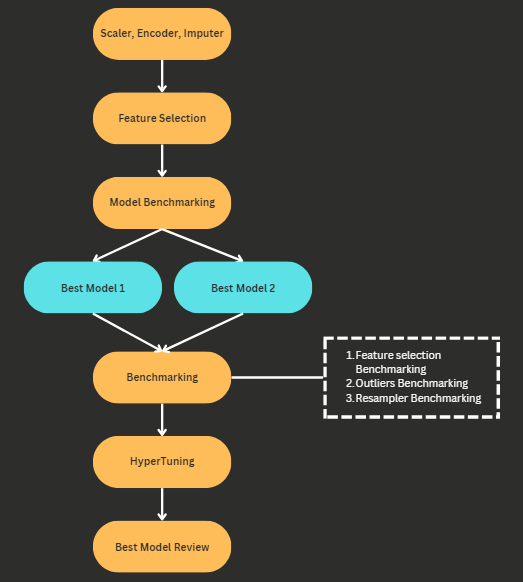

## **Scaler, Encoder, and Imputer**

Jenis **Scaler, Encoder** dan **Imputation** apa yang akan digunakan?. Strategi imputasi sudah ditentukan pada bagian Data Analysis sehingga tinggal menyesuaikan.

In [ ]:
from scipy.stats import kstest

cat_columns = ['PreferredLoginDevice', 'PreferredPaymentMode', 'Gender', 'PreferedOrderCat', 'MaritalStatus', 'CityTier', 'SatisfactionScore']
num_columns = ['NumberOfDeviceRegistered', 'NumberOfAddress', 'Complain', 'CashbackAmount']

normality_results = {}
for col in num_columns:
    result = kstest(df[col], 'norm')
    if result.pvalue < 0.05:
        normality_results[col] = {"Normality": "Not Normal", "p-value": result.pvalue}
    else:
        normality_results[col] = {"Normality": "Normal", "p-value": result.pvalue}



for col, result in normality_results.items():
    print(f"{col}: {result['Normality']}")

NumberOfDeviceRegistered: Not Normal
NumberOfAddress: Not Normal
Complain: Not Normal
CashbackAmount: Not Normal


**Scaler, Encoder and Imputation** Summary:

Berdasarkan uji normalitas yang telah dilakukan sebelumnya di bagian missing values Data analysis, dan uji normalitas sisa dari kolom numerical yang belum di uji, semua kolom numerical menunjukan distribusi yang non-normal, sehingga dapat digunakan **Robust Scaler** untuk jenis scalling. Untuk Encoder, semua kolom yang perlu di encode memiliki jumlah kategori kurang-lebih 5 buah kategori, sehingga **OneHotEncoder** dapat digunakan sebagai jenis encoder.

| Column Name                | Distribution   | Scaler  | Unique Values | Encoder     | Imputation  |
|----------------------------|----------------|---------|---------------|-------------|-------------|
| Tenure                     | Not Normal     | Robust  | -             | -           | Replace: 0 |
| WarehouseToHome            | Not Normal     | Robust  | -             | -           | Median |
| HourSpendOnApp             | Not Normal     | Robust  | -             | -           | Mode |
| NumberOfDeviceRegistered   | Not Normal     | Robust  | -             | -           | - |
| NumberOfAddress            | Not Normal     | Robust  | -             | -           | - |
| Complain                   | Not Normal     | Robust  | -             | -           | - |
| OrderAmountHikeFromlastYear| Not Normal     | Robust  | -             | -           | Replace: 0 |
| CouponUsed                 | Not Normal     | Robust  | -             | -           | Mode |
| OrderCount                 | Not Normal     | Robust  | -             | -           | Median |
| DaySinceLastOrder          | Not Normal     | Robust  | -             | -           | Median |
| CashbackAmount             | Not Normal     | Robust  | -             | -           | - |
| PreferredLoginDevice       | -              | -       | 3             | OHE         | - |
| PreferredPaymentMode       | -              | -       | 7             | OHE         | - |
| Gender                     | -              | -       | 2             | OHE         | - |
| PreferedOrderCat           | -              | -       | 6             | OHE         | - |
| MaritalStatus              | -              | -       | 3             | OHE         | - |


---

## **Feature Selection** (Correlation Test)

Feature selection dilakukan dengan **Filter Method**. Filter method mengevaluasi fitur berdasarkan karakteristik statistik dari data. Masing - masing feature diperiksa korelasinya terhadap target yaitu Churn. Untuk fitur - fitur numerical, digunakan correlation check Pearson (distribusi kolom numerical tidak normal). Untuk fitur categorical digunakan correlation check Chi-Square test.

In [ ]:
df = pd.read_excel('ecom.xlsx')
df.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


In [ ]:
# filnna ONLY FOR CORRELATION TEST

df['Tenure'].fillna(0, inplace=True)
df['WarehouseToHome'].fillna(df['WarehouseToHome'].median(), inplace=True)
df['HourSpendOnApp'].fillna(df['HourSpendOnApp'].mode()[0], inplace=True)
df['OrderAmountHikeFromlastYear'].fillna(0, inplace=True)
df['CouponUsed'].fillna(df['CouponUsed'].mode()[0], inplace=True)
df['OrderCount'].fillna(df['OrderCount'].median(), inplace=True)
df['DaySinceLastOrder'].fillna(df['DaySinceLastOrder'].median(), inplace=True)

In [ ]:
from scipy.stats import chi2_contingency

correlation_results = {}
for col in cat_columns:
    contingency_table = pd.crosstab(df[col], df['Churn'])
    chi2, p, _, _ = chi2_contingency(contingency_table)
    if p < 0.05:
        correlation_results[col] = {"Correlation": "Yes", "p-value": p}
    else:
        correlation_results[col] = {"Correlation": "No", "p-value": p}

for col, result in correlation_results.items():
    print(f"{col}: Correlation = {result['Correlation']}, p-value = {result['p-value']}")

PreferredLoginDevice: Correlation = Yes, p-value = 1.0756922373255213e-16
PreferredPaymentMode: Correlation = Yes, p-value = 9.708708511076305e-15
Gender: Correlation = Yes, p-value = 0.030820940334890086
PreferedOrderCat: Correlation = Yes, p-value = 2.7708325346337454e-60
MaritalStatus: Correlation = Yes, p-value = 1.073011277910542e-41
CityTier: Correlation = Yes, p-value = 1.2612000812079956e-09
SatisfactionScore: Correlation = Yes, p-value = 2.4233349782737515e-14


In [ ]:
from scipy.stats import pearsonr

num_columns = ['Tenure', 'WarehouseToHome', 'HourSpendOnApp', 'NumberOfDeviceRegistered', 'NumberOfAddress', 'Complain', 'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount', 'DaySinceLastOrder', 'CashbackAmount']

correlation_results = {}
for col in num_columns:
    correlation, p_value = pearsonr(df['Churn'], df[col])
    if p_value < 0.05:
        correlation_results[col] = {"Correlation": "Yes", "p-value": p_value}
    else:
        correlation_results[col] = {"Correlation": "No", "p-value": p_value}

for col, result in correlation_results.items():
    print(f"{col}: Correlation = {result['Correlation']}, p-value = {result['p-value']}")

Tenure: Correlation = Yes, p-value = 1.806726639848661e-157
WarehouseToHome: Correlation = Yes, p-value = 1.7579836224031157e-07
HourSpendOnApp: Correlation = No, p-value = 0.15806134596429194
NumberOfDeviceRegistered: Correlation = Yes, p-value = 4.626451530290544e-16
NumberOfAddress: Correlation = Yes, p-value = 0.0009767132246168266
Complain: Correlation = Yes, p-value = 4.282981610340582e-81
OrderAmountHikeFromlastYear: Correlation = Yes, p-value = 0.0031321917472365043
CouponUsed: Correlation = No, p-value = 0.9145651164356211
OrderCount: Correlation = No, p-value = 0.07131354286585057
DaySinceLastOrder: Correlation = Yes, p-value = 5.920403597328462e-32
CashbackAmount: Correlation = Yes, p-value = 2.8677093048159106e-31


**Feature Selection** Summary:

Menurut correlation test, kolom **HourSpendOnApp**, **CouponUsed**, dan **OrderCount** tidak memiliki korelasi yang cukup signifikan terhadap variabel target (Churn). Sehingga pada tahap uji Feature Selection vs All Feature benchmarking akan di drop


| Column Name (Numerical)                | Correlation | p-value                 |
|----------------------------|-------------|-------------------------|
| Tenure                     | Yes         | 1.7332156527376574e-140|
| WarehouseToHome            | Yes         | 1.7353454073869455e-07 |
| HourSpendOnApp             | **No**          | 0.05027223894360482    |
| NumberOfDeviceRegistered   | Yes         | 3.043074204060047e-17  |
| NumberOfAddress            | Yes         | 0.00018003765490180843 |
| Complain                   | Yes         | 4.354860198839113e-79  |
| OrderAmountHikeFromlastYear| Yes          | 0.46139064259594265    |
| CouponUsed                 | **No**          | 0.696279478680174      |
| OrderCount                 | **No**          | 0.13878390618900258    |
| DaySinceLastOrder          | Yes         | 2.0086583861763276e-30 |
| CashbackAmount             | Yes         | 1.4327248546223502e-25 |


| Column Name (Categorical)         | Correlation | p-value                 |
|----------------------|-------------|-------------------------|
| PreferredLoginDevice | Yes         | 6.951897628101791e-15  |
| PreferredPaymentMode | Yes         | 9.601315233674653e-13  |
| Gender               | Yes         | 0.009080808336551524   |
| PreferedOrderCat     | Yes         | 5.257822796871648e-53  |
| MaritalStatus        | Yes         | 2.4955551433293164e-39 |
| CityTier             | Yes         | 3.5119205009604933e-09 |
| SatisfactionScore    | Yes         | 1.561711892170359e-14  |


---

## **Benchmarking 1** : Model Benchmarking

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, KFold, StratifiedKFold
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split

from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.under_sampling import RandomUnderSampler, NearMiss
from imblearn.over_sampling import RandomOverSampler, SMOTE

from sklearn.metrics import make_scorer, fbeta_score, classification_report
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import RobustScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_excel('ecom.xlsx')

df['PreferredLoginDevice']=df['PreferredLoginDevice'].replace('Phone','Mobile Phone')
df['PreferredPaymentMode'] = df['PreferredPaymentMode'].replace({'CC': 'Credit Card', 'COD': 'Cash on Delivery'})
df['PreferedOrderCat']=df['PreferedOrderCat'].replace('Mobile','Mobile Phone')

In [ ]:
pd.DataFrame({
    'features': df.columns.values,
    'data_type': df.dtypes.values,
    'null_values': df.isna().mean().values * 100,
    'n_unique': df.nunique().values,
    'sample_unique': [df[col].unique() for col in df.columns]
})

,features,data_type,null_values,n_unique,sample_unique
0,CustomerID,int64,0.000000,5630,"[50001, 50002, 50003, 50004, 50005, 50006, 500..."
1,Churn,int64,0.000000,2,"[1, 0]"
2,Tenure,float64,4.689165,36,"[4.0, nan, 0.0, 13.0, 11.0, 9.0, 19.0, 20.0, 1..."
3,PreferredLoginDevice,object,0.000000,2,"[Mobile Phone, Computer]"
4,CityTier,int64,0.000000,3,"[3, 1, 2]"
5,WarehouseToHome,float64,4.458259,34,"[6.0, 8.0, 30.0, 15.0, 12.0, 22.0, 11.0, 9.0, ..."
6,PreferredPaymentMode,object,0.000000,5,"[Debit Card, UPI, Credit Card, Cash on Deliver..."
7,Gender,object,0.000000,2,"[Female, Male]"
8,HourSpendOnApp,float64,4.529307,6,"[3.0, 2.0, nan, 1.0, 0.0, 4.0, 5.0]"
9,NumberOfDeviceRegistered,int64,0.000000,6,"[3, 4, 5, 2, 1, 6]"


In [ ]:
df

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Mobile Phone,1,8.0,UPI,Male,3.0,4,Mobile Phone,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Mobile Phone,1,30.0,Debit Card,Male,2.0,4,Mobile Phone,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Mobile Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Mobile Phone,1,12.0,Credit Card,Male,NaN,3,Mobile Phone,5,Single,3,0,11.0,1.0,1.0,3.0,129.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5625,55626,0,10.0,Computer,1,30.0,Credit Card,Male,3.0,2,Laptop & Accessory,1,Married,6,0,18.0,1.0,2.0,4.0,150.71
5626,55627,0,13.0,Mobile Phone,1,13.0,Credit Card,Male,3.0,5,Fashion,5,Married,6,0,16.0,1.0,2.0,NaN,224.91
5627,55628,0,1.0,Mobile Phone,1,11.0,Debit Card,Male,3.0,2,Laptop & Accessory,4,Married,3,1,21.0,1.0,2.0,4.0,186.42
5628,55629,0,23.0,Computer,3,9.0,Credit Card,Male,4.0,5,Laptop & Accessory,4,Married,4,0,15.0,2.0,2.0,9.0,178.90


Create Preprocessor

In [ ]:
preprocessor = ColumnTransformer(
    transformers=[
        ('tenure_and_hike_imputer', Pipeline([
            ('imputer', SimpleImputer(strategy='constant', fill_value=0)),
            ('scaler', RobustScaler())
        ]), ["Tenure", "OrderAmountHikeFromlastYear"]),

        ('median_imputer', Pipeline([
            ('imputer', SimpleImputer(strategy='median')),
            ('scaler', RobustScaler())
        ]), ["WarehouseToHome", "OrderCount", "DaySinceLastOrder"]),

        ('mode_imputer', Pipeline([
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('scaler', RobustScaler())
        ]), ["HourSpendOnApp", "CouponUsed"]),

        ('numerical_scaling', RobustScaler(), ["NumberOfDeviceRegistered",
                                                "NumberOfAddress",
                                                "Complain",
                                                "CashbackAmount"]),

        ('categorical', OneHotEncoder(drop='first'), ["PreferredLoginDevice",
                                           "PreferredPaymentMode",
                                           "Gender",
                                           "PreferedOrderCat",
                                           "MaritalStatus"])
    ],
    remainder='passthrough'
)

Data Split

In [ ]:
X = df.drop(['CustomerID', 'Churn'], axis=1)
y = df['Churn']
xtrain, xtest, ytrain, ytest = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=2024,
    stratify=y)


In [ ]:

logreg = LogisticRegression(max_iter=1000)
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier()
svc = SVC(probability=True)
forest = RandomForestClassifier()

models = [logreg, knn, dt, svc, forest]
model_names = ['Logistic Regression', 'KNN', 'Decision Tree', 'SVC', 'Random Forest']
f2_scores_list = []

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=2024)

# Define the custom F2 score
f2_scorer = make_scorer(fbeta_score, beta=2)

for model in models:
    model_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                     ('classifier', model)])

    cv_scores = cross_val_score(model_pipeline, X, y, cv=kfold, scoring=f2_scorer)

    f2_scores_list.append(cv_scores.mean())

df_benchmark = pd.DataFrame({
    'Model': model_names,
    'AVG F2': f2_scores_list
})

print(df_benchmark.sort_values('AVG F2', ascending=False))

                 Model    AVG F2
2        Decision Tree  0.904794
4        Random Forest  0.892809
1                  KNN  0.571438
0  Logistic Regression  0.552254
3                  SVC  0.510799


**Benchmarking 1** Summary:
- Berdasakan uji model diatas, terlihat bahwa **Decision Tree** adalah model dengan F2 Score tertinggi yaitu **90.6%**
- **Random Forest** adalah model kedua tertinggi dengan F2 Score **90.3%**

Langkah selanjutnya adalah mengambil 2 model terbaik tersebut untuk dilakukan beberapa uji coba lainnya dan hyperparameter tuning

---

## **Benchmarking 2** : Selected Feature VS All Feature

Terkadang, model akan kesulitan mencapai skor yang baik jika feature - feature yang tidak berkorelasi atau tidak mempengaruhi target diikutsertakan. Pada bagian ini, dilakukan experimen untuk membandingkan performa model yang dilatih dengan semua Feature, dengan mmodel yang dilatih dengan Feature yang sudah di seleksi sebelumnya.

- Features yang di drop pada **Selected feature model**:
    - HourSpendOnApp
    - CouponUsed
    - OrderCount

In [ ]:
x_selected = df.drop(['HourSpendOnApp', 'CouponUsed', 'OrderCount', 'CustomerID', 'Churn'], axis=1)
y_selected = df['Churn']

xtrain_selected, xtest_selected, ytrain_selected, ytest_selected = train_test_split(
    x_selected,
    y_selected,
    test_size=0.2,
    random_state=2024,
    stratify= y_selected
)

# For models trained on all features
x_all = df.drop(['Churn', 'CustomerID'], axis=1)
y_all = df['Churn']

xtrain_all, xtest_all, ytrain_all, ytest_all = train_test_split(
    x_all,
    y_all,
    test_size=0.2,
    random_state=2024,
    stratify=y_all
)

Create preprocessor for **Selected Feature**

In [ ]:
preprocessor_selected_features = ColumnTransformer(
    transformers=[
        ('zero_imputer', Pipeline([
            ('imputer', SimpleImputer(strategy='constant', fill_value=0)),
            ('scaler', RobustScaler())
        ]), ["Tenure", "OrderAmountHikeFromlastYear"]),

        ('median_imputer', Pipeline([
            ('imputer', SimpleImputer(strategy='median')),
            ('scaler', RobustScaler())
        ]), ["WarehouseToHome", "DaySinceLastOrder"]),

        ('numerical_scaling', RobustScaler(), ["NumberOfDeviceRegistered",
                                                "NumberOfAddress",
                                                "Complain",
                                                "CashbackAmount"]),

        ('categorical', OneHotEncoder(drop='first'), ["PreferredLoginDevice",
                                           "PreferredPaymentMode",
                                           "Gender",
                                           "PreferedOrderCat",
                                           "MaritalStatus"])
    ],
    remainder='passthrough'
)


In [ ]:
f2_scorer = make_scorer(fbeta_score, beta=2)

model_rf = RandomForestClassifier(random_state=2024)
pipeline_selected = Pipeline([
    ('preprocessor', preprocessor_selected_features),
    ('model', model_rf)
])
pipeline_all = Pipeline([
    ('preprocessor', preprocessor),
    ('model', model_rf)
])

cv_scores_selected = cross_val_score(pipeline_selected, xtrain_selected, ytrain_selected, cv=kfold, scoring=f2_scorer)

cv_scores_all = cross_val_score(pipeline_all, xtrain_all, ytrain_all, cv= kfold, scoring=f2_scorer)

print("RANDOM FOREST Performance")
print("Mean F2 Score on Model with Selected Feature:", cv_scores_selected.mean())
print("Mean F2 Score on Model with ALL Feature:", cv_scores_all.mean())

RANDOM FOREST Performance
Mean F2 Score on Model with Selected Feature: 0.8286349433522376
Mean F2 Score on Model with ALL Feature: 0.8226715128251716


In [ ]:
model_dt = DecisionTreeClassifier(random_state=2024)
pipeline_selected = Pipeline([
    ('preprocessor', preprocessor_selected_features),
    ('model', model_dt)
])
pipeline_all = Pipeline([
    ('preprocessor', preprocessor),
    ('model', model_dt)
])

cv_scores_selectd = cross_val_score(pipeline_selected, xtrain_selected, ytrain_selected, cv=kfold, scoring=f2_scorer)

cv_scores_all = cross_val_score(pipeline_all, xtrain_all, ytrain_all, cv=kfold, scoring=f2_scorer)

print("DECISION TREE Performance")
print("Mean F2 Score on Model with Selected Feature:", cv_scores_selectd.mean())
print("Mean F2 Score on Model with ALL Feature:", cv_scores_all.mean())

DECISION TREE Performance
Mean F2 Score on Model with Selected Feature: 0.8339631516767987
Mean F2 Score on Model with ALL Feature: 0.8257307264119513


**Benchmarking 2** Summary:
- Untuk **Random Forest**, perfoma model ketika semua Feature diikutsertakan lebih rendah (**F2 Score: 82.2%**) dibandingkan model dengan Feature yang di seleksi (**F2 Score: 82.8%**). Walaupun F2 Score nya hanya lebih tinggi **0.6 %**
- Untuk **Decision Tree**, perfoma model ketika semua Feature diikutsertakan lebih rendah (**F2 Score: 82.5**) dibandingkan model dengan Feature yang di seleksi (**F2 Score: 83.3%**). Walaupun hanya terdapat perbedaan **0.8%**


Berdasarkan hasil uji diatas, proses uji coba akan dilanjutkan dengan model yang dilatih dengan Feature yang telah diseleksi untuk kedua model (**Random Forest** & **Decision Tree**)

---

## **Benchmarking 3** : Outliers VS No Outliers

Beberapa algoritma model Machine Learning dikenal dengan ke-sensitifannya terhadap outliers. Pada uji coba ini, dilakukan pengujian terhadap kedua model terbaik untuk membandingkan apakah perfoma model akan lebih baik jika Outliers tidak diikutsertakan.

**Outliers**

| **Column** | **Total Outlier** | **Lower** | **Upper** | **Action** | **Additional Info** |
|------------|-------------------|-----------|-----------|------------|---------------------|
| Tenure | 4 | -19.0 | 37.0 | | |
| Warehouse to Home | 2 | -7.5 | 36.5 | Drop | Distance from the upper fence is too far|
| Number Of Address | 4 | -4.0 | 12.0 | Drop | Customer having more than 12 address doesnt make sense. probably a **Bot** or an **Error** |
| Order Amount Hike From Last Year | 33 | 5.5 | 25.5 | | |
| Coupon Used | 629 | -0.5 | 3.5 | | |
| Order Count | 703 | -2.0 | 6.0 | | |
| Day Since Last Order | 62 | -5.5 | 14.5 | Drop > 25 days | Distance from the upper fence is too far |
| Cashback Amount | 438 | 69.83625 | 272.32625 | | |


Drop Outliers:

In [ ]:
df_clean = pd.read_excel('ecom.xlsx')

df_clean['PreferredLoginDevice']= df_clean['PreferredLoginDevice'].replace('Phone','Mobile Phone')
df_clean['PreferredPaymentMode'] = df_clean['PreferredPaymentMode'].replace({'CC': 'Credit Card', 'COD': 'Cash on Delivery'})
df_clean['PreferedOrderCat']= df_clean['PreferedOrderCat'].replace('Mobile','Mobile Phone')

df_clean.drop(df_clean[df_clean['WarehouseToHome'] > 37].index, inplace = True)
df_clean.drop(df_clean[df_clean['NumberOfAddress'] > 12].index, inplace = True)
df_clean.drop(df_clean[df_clean['DaySinceLastOrder'] > 25].index, inplace = True)


In [ ]:
df_clean

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Mobile Phone,1,8.0,UPI,Male,3.0,4,Mobile Phone,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Mobile Phone,1,30.0,Debit Card,Male,2.0,4,Mobile Phone,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Mobile Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Mobile Phone,1,12.0,Credit Card,Male,NaN,3,Mobile Phone,5,Single,3,0,11.0,1.0,1.0,3.0,129.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5625,55626,0,10.0,Computer,1,30.0,Credit Card,Male,3.0,2,Laptop & Accessory,1,Married,6,0,18.0,1.0,2.0,4.0,150.71
5626,55627,0,13.0,Mobile Phone,1,13.0,Credit Card,Male,3.0,5,Fashion,5,Married,6,0,16.0,1.0,2.0,NaN,224.91
5627,55628,0,1.0,Mobile Phone,1,11.0,Debit Card,Male,3.0,2,Laptop & Accessory,4,Married,3,1,21.0,1.0,2.0,4.0,186.42
5628,55629,0,23.0,Computer,3,9.0,Credit Card,Male,4.0,5,Laptop & Accessory,4,Married,4,0,15.0,2.0,2.0,9.0,178.90


Split Data **Tanpa Outliers**

In [ ]:
x_clean = df_clean.drop(['HourSpendOnApp', 'CouponUsed', 'OrderCount', 'CustomerID', 'Churn'], axis=1)
y_clean = df_clean['Churn']

xtrain_clean, xtest_clean, ytrain_clean, ytest_clean = train_test_split(
    x_clean,
    y_clean,
    test_size=0.2,
    random_state=2024,
    stratify=y_clean
)

**Random Forest**

In [ ]:
model_rf = RandomForestClassifier(random_state=2024)

pipeline_rf = Pipeline([
    ('preprocessor', preprocessor_selected_features),
    ('model', model_rf)
])
cv_scores_outliers_rf = cross_val_score(pipeline_rf, xtrain_selected, ytrain_selected, cv=kfold, scoring=f2_scorer)

cv_scores_nooutliers_rf = cross_val_score(pipeline_rf, xtrain_clean, ytrain_clean, cv=kfold, scoring=f2_scorer)

print("RANDOM FOREST Performance")
print("Mean F2 Score on dataset with outliers:", cv_scores_outliers_rf.mean())
print("Mean F2 Score on dataset without outliers:", cv_scores_nooutliers_rf.mean())

RANDOM FOREST Performance
Mean F2 Score on dataset with outliers: 0.8286349433522376
Mean F2 Score on dataset without outliers: 0.8410013708337869


**Decision Tree**

In [ ]:
model_dt = DecisionTreeClassifier(random_state=2024)

pipeline_dt = Pipeline([
    ('preprocessor', preprocessor_selected_features),
    ('model', model_dt)
])

cv_scores_outliers_dt = cross_val_score(pipeline_dt, xtrain_selected, ytrain_selected, cv=kfold, scoring=f2_scorer)
cv_scores_nooutliers_dt = cross_val_score(pipeline_dt, xtrain_clean, ytrain_clean, cv=kfold, scoring=f2_scorer)

print("DECISION TREE Performance")
print("Mean F2 Score on dataset with outliers:", cv_scores_outliers_dt.mean())
print("Mean F2 Score on dataset without outliers:", cv_scores_nooutliers_dt.mean())

DECISION TREE Performance
Mean F2 Score on dataset with outliers: 0.8339631516767987
Mean F2 Score on dataset without outliers: 0.8402468347027534


**Benchmarking 3** Summary:
- Untuk **Random Forest**, perfoma model ketika outliers diikutsertakan lebih rendah (**F2 Score: 82.8%**) dibandingkan model tanpa outliers(**F2 Score: 84.1%**). terdapat perbedaan **1.3%**
- Untuk **Decision Tree**, perfoma model ketika outliers diikutsertakan lebih rendah (**F2 Score: 83.3**) dibandingkan model tanpa outliers (**F2 Score: 84%**). hanya terdapat perbedaan **0.7%**

Berdasarkan hasil diatas, proses uji coba akan dilanjutkan dengan model yang dilatih dengan menghilangkan outliers di data training di kedua model. Perbedaan yang sangat kecil terhadap model dengan outliers dan tanpa outliers sangat wajar. Hal tersebut dikarenakan model "*Tree-Based*" dikenal tidak sensitif terhadap outliers.

---

##  **Benchmarking 4** : Resampler Benchmarking

In [ ]:
class_counts = df['Churn'].value_counts()
total_rows = len(df)

class_percentage = class_counts / total_rows


print(class_percentage)

print(class_counts)

Churn
0    0.831616
1    0.168384
Name: count, dtype: float64
Churn
0    4682
1     948
Name: count, dtype: int64


Data diatas menunjukan bahwa data yang kita gunakan ***Imbalance*** (83% - 17%). Upaya resampling perlu dipertimbangkan untuk memperbaiki performa model. Umumnya terdapat 4 metode resampling:
- Under Sampler
- Over Sampler
- SMOTE
- Near Miss

Keempat resampler tersebut di *Benchmark* untuk mengetahui metode resampling mana yang menghasilkan performa model terbaik

**Random Forest**

In [ ]:
resampling_methods = {
    'RandomUnderSampler': RandomUnderSampler(random_state=2024),
    'RandomOverSampler': RandomOverSampler(random_state=2024),
    'SMOTE': SMOTE(random_state=2024),
    'NearMiss': NearMiss(),
}

results = {}

for name, method in resampling_methods.items():
    pipeline_resample_rf = ImbPipeline([
        ('preprocessing', preprocessor_selected_features),
        ('resampling', method),
        ('model', RandomForestClassifier(random_state=2024))
    ])

    cv_scores = cross_val_score(pipeline_resample_rf, xtrain_clean, ytrain_clean, cv=kfold, scoring=f2_scorer)

    results[name] = cv_scores.mean()

for resampling_method, f2 in results.items():
    print(f'{resampling_method}: {f2:.4f}')


RandomUnderSampler: 0.8466
RandomOverSampler: 0.8751
SMOTE: 0.8454
NearMiss: 0.6876


**Decision Tree**

In [ ]:
results = {}

for name, method in resampling_methods.items():
    pipeline_resample_dt = ImbPipeline([
        ('preprocessing', preprocessor_selected_features),
        ('resampling', method),
        ('model', DecisionTreeClassifier(random_state=2024))
    ])

    cv_scores = cross_val_score(pipeline_resample_dt, xtrain_clean, ytrain_clean, cv=kfold, scoring=f2_scorer)

    results[name] = cv_scores.mean()

for resampling_method, f2 in results.items():
    print(f'{resampling_method}: {f2:.4f}')

RandomUnderSampler: 0.7804
RandomOverSampler: 0.8380
SMOTE: 0.8283
NearMiss: 0.6556


**Benchmarking 4** Summary:

Metode resampling yang paling cocok untuk kedua model (Random Forest & Decision Tree) adalah **Oversampling** dengan F2 Score **87.5% untuk Random forest**, dan **83.8% untuk Decision Tree**.

## **Benchmarking Recap**

2 model dengan performa terbaik adalah **Random Forest** dan **Decision Tree**.
- Konfigurasi
    - Trained with Selected Features (3 columns are dropped)
    - Trained Without Outliers
    - Resampler: Over Sampling

---

## **Hyperparameter Tuning**

**Random Forest** HyperTuning

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

model_pipeline_rf = ImbPipeline(steps=[
    ('preprocessor', preprocessor_selected_features),
    ('oversampler', RandomOverSampler(random_state=2024)),
    ('rf', RandomForestClassifier(random_state=2024))
])

param_distributions_rf = {
    'rf__n_estimators': randint(100, 500),
    'rf__max_features': ['auto', 'sqrt'],
    'rf__max_depth': randint(10, 30),
    'rf__min_samples_split': randint(2, 5),
    'rf__min_samples_leaf': randint(1, 5)
}


random_search_rf = RandomizedSearchCV(
    model_pipeline_rf,
    param_distributions=param_distributions_rf,
    n_iter=50,
    cv=5,
    scoring=f2_scorer,
    random_state=2024,
    n_jobs=-1
)

random_search_rf.fit(xtrain_clean, ytrain_clean)

print("Best parameters found: ", random_search_rf.best_params_)
print("Best F2 score found: ", random_search_rf.best_score_)


Best parameters found:  {'rf__max_depth': 26, 'rf__max_features': 'auto', 'rf__min_samples_leaf': 1, 'rf__min_samples_split': 3, 'rf__n_estimators': 463}
Best F2 score found:  0.8941509879360188


In [ ]:
model_pipeline_dt = ImbPipeline(steps=[
    ('preprocessor', preprocessor_selected_features),
    ('oversampler', RandomOverSampler(random_state=2024)),
    ('dt', DecisionTreeClassifier(random_state=2024))
])

param_distributions_dt = {
    'dt__max_depth': randint(10, 30),
    'dt__min_samples_split': randint(2, 5),
    'dt__min_samples_leaf': randint(1, 5),
    'dt__max_features': ['auto', 'sqrt'],
    'dt__criterion': ['gini', 'entropy']
}
random_search_dt = RandomizedSearchCV(
    model_pipeline_dt,
    param_distributions=param_distributions_dt,
    n_iter=100,
    cv=5,
    scoring=f2_scorer,
    random_state=2024,
    n_jobs=-1
)

random_search_dt.fit(xtrain_clean, ytrain_clean)

print("Best parameters found: ", random_search_dt.best_params_)
print("Best F2 score found: ", random_search_dt.best_score_)

Best parameters found:  {'dt__criterion': 'gini', 'dt__max_depth': 25, 'dt__max_features': 'sqrt', 'dt__min_samples_leaf': 1, 'dt__min_samples_split': 4}
Best F2 score found:  0.8042712954623461


##### **Hyperparameter Tuning** Summary:
- Random Forest model with HyperTuning parameters has **1.9% more F1Score** than the model that uses the default parameters.
    - Default : 87.5 %
    - HyperTuning : 89.4 %
- Decision Tree model with default parameters has **3.4% more F1Score** than the model that uses the best parameters on hyperparameter tuning
    - Default : 83.8 %
    - HyperTuning : 80.4%

**Random Forest** with **Hyperparameter Tuning best parameters** will be our final model.

---

## **Final Model Review**

#### **Performance Review**

Final Model Configuration (Random Forest)
- Trained with Selected Features
- Trained With Outliers
- Resampler: OverSampling
- Using best parameters from Hyperparameter Tuning
  - max_depth = 26,
  - max_features = auto
  - min_samples_leaf = 1
  - min_samples_split = 3
  - n_estimators = 463

In [ ]:
final_pipeline = ImbPipeline(steps=[
    ('preprocessor', preprocessor_selected_features),
    ('oversampler', RandomOverSampler(random_state=2024)),
    ('rf', RandomForestClassifier(random_state=2024,
                                   max_depth=26,
                                   max_features='auto',
                                   min_samples_leaf=1,
                                   min_samples_split=3,
                                   n_estimators=463))
])

final_pipeline.fit(xtrain_clean, ytrain_clean)
ytest_pred = final_pipeline.predict(xtest_clean)

f2_score = fbeta_score(ytest_clean, ytest_pred, beta=2)
print("F2 score on the test set: ", f2_score)



F2 score on the test set:  0.9427966101694915


Berdasarkan hasil tes fitting ke data test, **model yang telah dibentuk menghasilkan F2 Score yang lebih baik** (**F2 Score: 94.3%**) dibanding pengujian sebelumnya yang dimana masih menggunakan data training (**F2 Score: 89.4 %**). Terdapat perbedaan **4.5%**. Hal tersebut menunjukkan bahwa model yang telah dibentuk tidak overfitting.

In [ ]:
print("Classification report:\n", classification_report(ytest_clean, ytest_pred))

Classification report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       936
           1       0.95      0.94      0.94       189

    accuracy                           0.98      1125
   macro avg       0.97      0.97      0.97      1125
weighted avg       0.98      0.98      0.98      1125



Walaupun metrics utama kita adalah F2 Score, mari kita breakdown sedikit mengenai performa model secara overall.

- Presisi dan Recall tinggi untuk kasus **Tidak Churn (0)**

Model menunjukkan kinerja yang sangat baik dalam mengidentifikasi pelanggan yang tidak churn, dengan presisi dan recall mendekati 1.  Ini menunjukan hampir selalu mengidentifikasi pelanggan yang memang tidak churn dengan benar. Walaupun biaya dari kesalahan False Negative lebih signifikan (sehingga kami menggunakan F2-Score sebagai metrik evaluasi utama), model ini juga menunjukkan kinerja yang sangat baik dalam menghindari kesalahan dalam memprediksi pelanggan yang tidak churn.

- F1 Score

F1-score untuk churn sebesar 94% yang menunjukan kinerja model yang cukup baik secara keseluruhan

#### **Confusion Matrix**

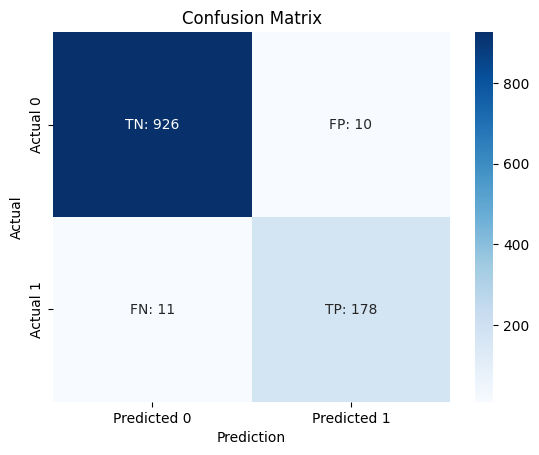

In [ ]:
from sklearn.metrics import confusion_matrix


conf_matrix = confusion_matrix(ytest_clean, ytest_pred)
labels = [f'TN: {conf_matrix[0, 0]}', f'FP: {conf_matrix[0, 1]}', f'FN: {conf_matrix[1, 0]}', f'TP: {conf_matrix[1, 1]}']

# Plot the confusion matrix with annotations
sns.heatmap(conf_matrix, annot=np.array(labels).reshape(2, 2), fmt='', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Prediction')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Menurut [Artikel](https://www.gocustomer.ai/blog/average-customer-acquisition-cost), estimasi biaya untuk mengakuisisi customer baru untuk industri e-commerce adalah kurang lebih 64$ (Metrics ini disebut **Customer Aqcuisition Cost**). Berdasarkan angka estimasi tersebut, mari kita simulasikan berapa biaya yang harus kita keluarkan akibat dari kesalahan model yang telah dibuat berdasarkan skenario confusion matrix diatas.

- **False Negative: 11**
Data False Negative pada kasus ini menunjukan terdapat 11 pelanggan yang akan berpotensi churn. maka:

  $ 64\$ \times 11 \text{ customers} = 704 \$ $

- **False Positive: 9**
Data False Positive pada kasus ini menunjukan terdapat 9 buah pelanggan akan mendapatkan resource retensi yang seharusnya tidak diberikan. Sebelumnya, kita sudah memiliki sumber yang menyatakan bahwa biaya kehilangan customer adalah 5 kali lebih banyak dibandingkan mempertahankan customer yang sudah ada. maka biaya untuk mempertahankan customer adalah 1/5 nya dari 64$:

  \$ \frac{64$}{5} \times 10 \text{ customers} = 128\$ \$

Berdasarkan perhitungan tersebut, perusahaan akan perlu mengeluarkan biaya sebesar **832 $** dalam kasus seperti confusion matrix diatas. Maka untuk biaya total pengeluaran dari kasus diatas adalah biaya mempertahankan customer (TP) ditambahkan dengan cost FN & FP  (832\$) :

\$ (\frac{64$}{5} \times 178 \text{ customers}) + 832  = 3.110\$ \$


 Jika kita menjadikan jumlah customer churn pada data test sebagai acuan (not churn: 936, churn 189), maka biaya yang perlu dikeluarkan akibat customer churn jika model ini tidak ada adalah:

$ (64\$ \times 189 \text{ customers}) = 12.096\$ $

Perhitungan tersebut menunjukkan bahwa dengan adanya model ini, perusahaan dapat menghemat pengeluaran sebesar **8.986\$**. Perlu diingatkan bahwa perhitungan ini hanya estimasi, karena kita tidak memiliki data asli dari CAC dan cost ketika customer churn dan mengasumsikan customer yang tidak churn (TN) tidak diberikan resource retensi apapun.


In [ ]:
ytest_clean.value_counts()

Churn
0    936
1    189
Name: count, dtype: int64

#### **Feature Importance**

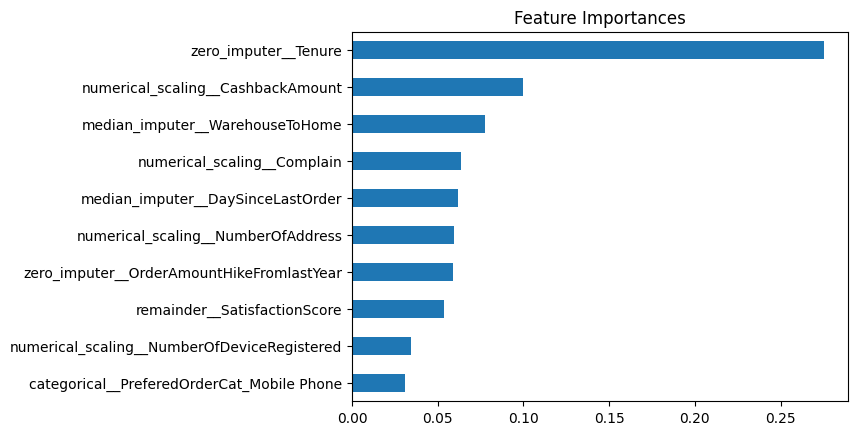

In [ ]:
best_model = random_search_rf.best_estimator_
coef1 = pd.Series(best_model['rf'].feature_importances_, preprocessor_selected_features.get_feature_names_out()).sort_values(ascending = True).tail(10)
coef1.plot(kind='barh', title='Feature Importances')
plt.show()

Berdasarkan grafik feature importance diatas, **Tenure** memiliki kontribusi paling signifikan terhadap model prediksi churn kami. Sedangkan diposisi kedua tertinggi terdapat kolom Cashback Amount. Mari kita cek lebih detil terlebih dahulu hubungan kedua fitur ini terhadap churn dengan membuat scatter plot antara probabilitas churn dan fitur tersebut.

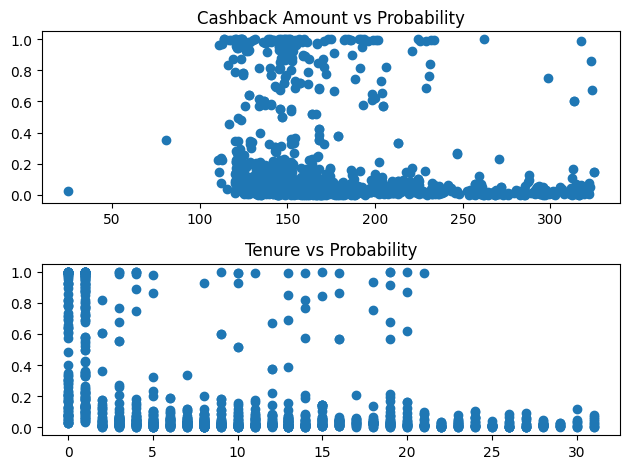

In [ ]:
probaresult = xtest_clean.copy()


proba = final_pipeline.predict_proba(xtest_clean)[:,1]
probaresult['Probability'] = proba

fig, axs = plt.subplots(2)

# Scatter plot 1
axs[0].scatter(probaresult['CashbackAmount'], probaresult['Probability'])
axs[0].set_title('Cashback Amount vs Probability')

# Scatter plot 2
axs[1].scatter(probaresult['Tenure'], probaresult['Probability'])
axs[1].set_title('Tenure vs Probability')

plt.tight_layout()
plt.show()

Pada grafik diatas, bisa terlihat bahwa ada penumpukan sebaran data di bagian kiri-atas dari masing - masing grafik fitur. Hal tersebut menunjukkan **jika tenure dari suatu customer masih rendah**, banyak dari mereka yang memiliki **kemungkinan churn tinggi**. Begitu juga dengan cashback amount, terdapat banyak customer dengan **probability churn yang tinggi pada customer dengan nilai cashback yang rendah**




Hasil eksplorasi data kami yang sebelumnya sudah dilakukan juga menunjukkan bahwa pelanggan dengan 'tenure' 1 dan 2 bulan memiliki tingkat churn yang tinggi.Temuan ini menunjukkan bahwa 'tenure' dapat menjadi indikator penting untuk menangani masalah resiko churn. Resource retensi juga bisa difokuskan pada customer - customer dengan tenure yang rendah, contohnya denga cara:
- **Loyalty Points / Loyalty Program**

  Menerapkan loyalty points untuk memungkinkan pelanggan mengumpulkan poin setiap kali mereka melakukan pembelian. Poin ini kemudian dapat ditukarkan dengan diskon atau hadiah lainnya, mendorong pelanggan untuk tetap berbelanja

- **Pemberian Diskon/Kupon Untuk Pelanggan Baru**

  Memberikan penawaran diskon atau kupon khusus untuk pembelian berikutnya kepada pelanggan dengan "tenure" rendah dapat meningkatkan kesetiaan pelanggan dan mendorong mereka untuk kembali melakukan transaksi.

Selain Tenure, **Cashback Amount** adalah fitur dengan importance kedua tertinggi. Untuk penanganan potensi churn pada cashback amount rendah, berikut hal yang dapat dipertimbangkan.

- **Segmentasi Customer Cashback Rendah**

  Dengan menyegmentasi pelanggan berdasarkan tingkat cashback amount mereka, Kita dapat menyesuaikan strategi retensi untuk memenuhi kebutuhan dan preferensi masing-masing segmen (personalisasi). Dengan menawarkan penawaran khusus kepada pelanggan dengan cashback amount rendah, kita dapat mendorong mereka untuk melakukan pembelian lebih lanjut.

#### **Churn Probability**

Selain memprediksi apakah customer churn/tidak, kita dapat menampilkan probabilitas kemungkinan churn dari tiap customer.

In [ ]:
probaresult = xtest_clean.copy()


proba = final_pipeline.predict_proba(xtest_clean)[:,1]
probaresult['Probability'] = proba

probaresult.head(10)

,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,DaySinceLastOrder,CashbackAmount,Probability
2912,11.0,Computer,1,18.0,UPI,Male,4,Fashion,2,Married,3,1,15.0,8.0,246.85,0.024838
156,15.0,Mobile Phone,3,6.0,Debit Card,Male,3,Laptop & Accessory,3,Divorced,2,0,25.0,6.0,149.07,0.023758
2731,0.0,Mobile Phone,1,7.0,Credit Card,Male,3,Mobile Phone,5,Single,1,0,13.0,6.0,128.67,0.347372
4021,22.0,Mobile Phone,1,17.0,Debit Card,Male,5,Others,4,Married,6,0,NaN,10.0,321.65,0.010799
3640,5.0,Computer,3,9.0,Debit Card,Female,4,Fashion,3,Married,3,1,20.0,NaN,223.52,0.052916
4674,1.0,Computer,1,10.0,Debit Card,Male,4,Mobile Phone,5,Single,3,1,12.0,8.0,158.48,0.979950
2621,10.0,Mobile Phone,3,15.0,E wallet,Male,4,Laptop & Accessory,4,Married,2,0,14.0,3.0,141.89,0.006479
1245,20.0,Computer,1,20.0,Cash on Delivery,Male,3,Laptop & Accessory,4,Married,9,0,18.0,7.0,154.67,0.010799
2135,6.0,Mobile Phone,1,11.0,Debit Card,Male,4,Fashion,1,Married,5,0,15.0,2.0,171.19,0.008639
3678,15.0,Computer,1,29.0,Debit Card,Female,4,Laptop & Accessory,2,Married,5,1,15.0,4.0,179.67,0.009719


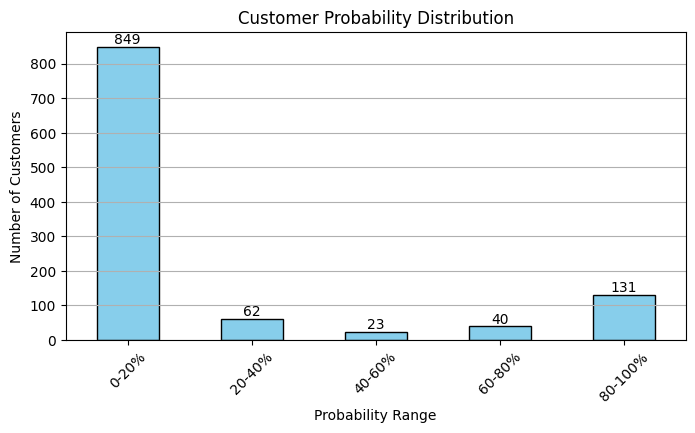

In [ ]:
bins = [0, 0.2, 0.4, 0.6, 0.8, 1.0]
labels = ['0-20%', '20-40%', '40-60%', '60-80%', '80-100%']

probaresult['Probability Range'] = pd.cut(probaresult['Probability'], bins=bins, labels=labels)

bin_counts = probaresult['Probability Range'].value_counts().sort_index()

plt.figure(figsize=(8, 4))
ax = bin_counts.plot(kind='bar', color='skyblue', edgecolor='black')

for i in ax.containers:
    ax.bar_label(i)

plt.title('Customer Probability Distribution')
plt.xlabel('Probability Range')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.grid(axis='y')

plt.show()

Dengan menampilkan probabilitas churn dari tiap customer, kita dapat mengelompokkan/membedakan mana customer yang akan mendapatkan resource retensi yang lebih (diprioritaskan) dibanding customer lain. Berdasarkan data diatas, dari 1125 customer terdapat 131 customer yang memiliki probabilitas untuk Churn diatas 80%. Yang dimana mereka patut diprioritaskan untuk diberikan resource retensi lebih banyak untuk menghindari terjadinya churn.

#### **Limitasi Model**

- Menghilangkan outliers dari dataset dapat membantu model fokus pada pola yang lebih umum dan relevan dalam data. Ini dapat meningkatkan kinerja model jika outliers tersebut sebenarnya merupakan anomali yang tidak relevan atau jika mereka mengganggu pembentukan model yang baik. namun jika memang ada customer yang memiliki feature dengan value yang ekstrim, hasil prediksi model ini mungkin tidak sebaik prediksi yang featurenya masih didalam range data training kami.

- Model ini di latih dengan 15 buah feature, sehingga jika di masa yang akan datang sudah ditemukan feature baru yang sangat mempengaruhi churn-nya sebuah customer, prediksi model tidak terpengaruh oleh feature tersebut. Model perlu di training kembali.

- Resource data kami dalam melatih dataset ini hanya memiliki sekitar 5000 jumlah data. Terdapat kemungkinan pengurangan performa jika model ini digunakan untuk memprediksi karakteristik dataset yang lain. dibutuhkan data yang lebih banyak lagi sehingga dapat meng-generalisasikan model dengan baik.

#### **Cara Kerja Algoritma Model (Random Forest)**

Karena model akhir yang kita gunakan adalah Random Forest, kami akan menjelaskan secara singkat bagaimana cara kerja dari algoritma ini. Untuk memahami cara kerja random forest, ada baiknya kita lebih dulu memahami cara kerja decision tree karena random forest merupakan **kumpuluan dari beberapa decision tree yang akan voting untuk hasil prediksi akhir**. Untuk mempermudah pemahaman, mari kita bahas terminologi atau istilah - istilah yang perlu diketahui untuk memahami cara kerja decision tree.
    
  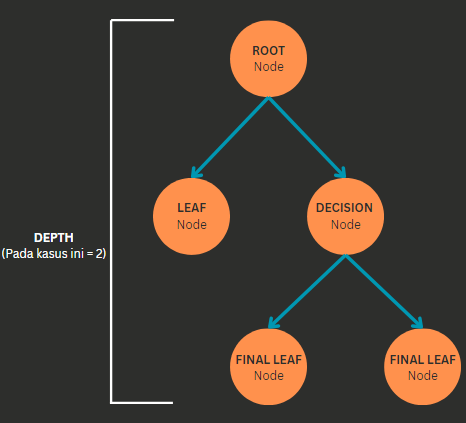


  - **Root Node**

  Node pertama dalam decision tree yang memulai proses pengambilan keputusan. semua data yang akan masuk ke algoritma bermulai dari *Root* ini.
  - **Decision Node**

  Pada node ini, fitur dievaluasi untuk membuat keputusan cara membagi data sehingga nantinya akan di bagi (split).

  - **Leaf Node & Final Leaf Node**

  Leaf Node adalah cabang decision tree yang tidak lagi membagi data, atau tidak lagi melakukan Splitting. Node ini mewakili hasil akhir atau prediksi untuk kondisi tertentu. ketika node telah mencapai impuritas atau di atur maximum kedalamannya, di ujing tree akan terdapat 2 Node akhir yang merupakan penentuan hasil prediksi dari tree tersebut. Node tersebut dinamakan **Final Leaf Node**.

  - **Depth**
  
  Kedalaman dari tree tersebut. Jumlah depth dihitung dari berapa kali model tersebut melakukan splitting. Depth merupakan salah satu HyperParameter pada algoritma decision tree dan random forest yang bisa atur value nya.

Selanjutnya, mari kita lihat struktur dari decision tree yang sudah di train sehingga sudah terdapat kondisi - kondisi yang optimal pada node nya (untuk mempermudah pemahaman).

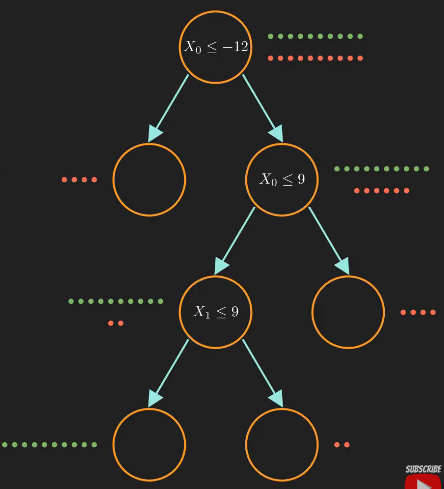

 (sumber ilustrasi 1: [Source](https://www.youtube.com/watch?v=ZVR2Way4nwQ&t=375s))

Seperti yang dapat dilihat, decision tree sebenarnya hanyalah kondisional if-else yang bercabang seperti ranting pohon. Bagian yang kompleks adalah bagaimana cara mengatur kondisi tersebut dengan angka yang benar sehingga bisa menghasilkan prediksi yang baik.

Pada ilustrasi tersebut, dot merah dan hijau menunjukan training data (hijau kelas 0, dan merah kelas 1). data point tersebut akan dibagi (split) dan dikirim ke cabang kiri atau kanan berdasarkan aturan kondisi di setiap node, dan akan terus di split hingga mencapai impuritas yang murni, atau parameter tertentu sudah memenuhi sebuah kondisi. apa saja parameter tersebut?

  - **Max Depth** : Kedalaman dari tree dapat diatur sehingga model tidak perlu terus - menerus splitting hingga mencapai impuritas yang murni.
  - **Min Sample Split**: Menentukan jumlah minimum sampel yang diperlukan untuk membagi node. Jika jumlah sampel di suatu node kurang dari nilai ini, node tersebut tidak akan dibagi lagi.
  - **Min Sample leaf**: menentukan jumlah minimum sampel yang diperlukan untuk membentuk leaf node. Jika jumlah sampel di suatu leaf node kurang dari nilai ini, node tersebut tidak akan dibagi lagi.

Ketika model telah berhenti splitting, kondisi pada leaf terakhir lah yang akan menentukan hasil prediksinya. Selanjutnya, apa itu **Random Forest**?. Random forest merupakan kumpulan dari beberapa decision tree. Gambar dibawah merupakan ilustrasi dari Random Forest dengan 4 buah estimator (4 buah tree):

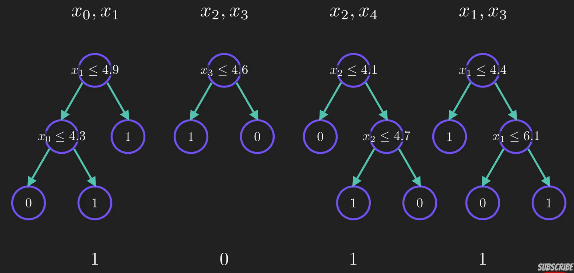

(sumber ilustrasi 2: [Source](https://www.youtube.com/watch?v=v6VJ2RO66Ag&t=82s))


Dapat dilihat bahwa ke-empat tree memiliki hasil prediksinya masing - masing. Untuk menghasilkan prediksi akhir, Algoritma ini akan melakukan voting sehingga kelas yang mayoritas akan menjadi nilai prediksi akhir untuk kasus klasifikasi, atau melakukan averaging untuk kasus regresi. Untuk Random Forest, ada beberapa Hyperparameter tambahan yang dapat kita set:

  - **Max Features** : Menentukan jumlah fitur maksisum yang akan diproses pada 1 tree (1 estimator). Dapat dilihat pada ilustrasi diatas bahwa dalam kasus tersebut, jumlah features bernilai 2 (variabel diatas ilustrasi tree).

  - **N Estimator** : Jumlah estimator merupakan jumlah tree yang ada didalam random forest ini. Sebelumnya telah dibahas bahwa ilustrasi diatas menunjukkan n_estimator = 4.


#### **Interface Model**

Untuk melakukan prediksi dengan cepat dan praktis, dibuat sebuah interface dari mode tersebut sehingga user dapat menginput fitur - fitur secara manual dan mendapatkan prediksinya. Selain menampilkan prediksi churn, UI ini juga menunjukan probabilitas churn dari customer tersebut sehingga kita dapat langsung menilai apakah customer tersebut perlu diprioritaskan dalam program retensi.

Sebagai catatan, interface ini masih hanya bisa di run secara local di pc masing - masing (Tidak bisa di akses melalui internet).

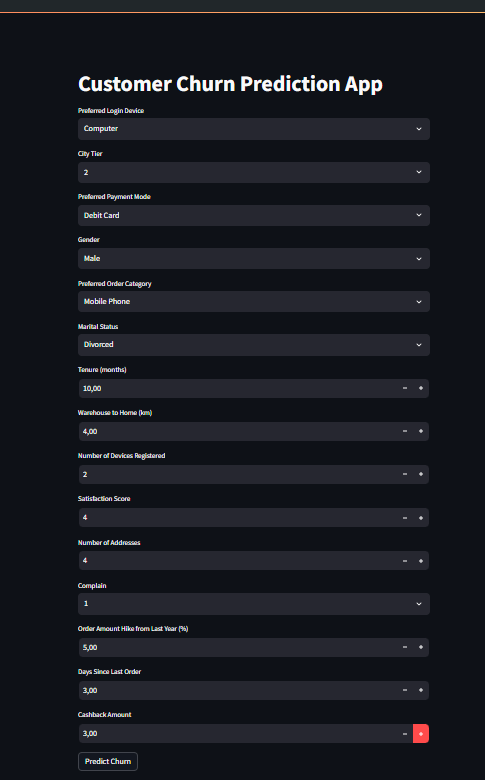

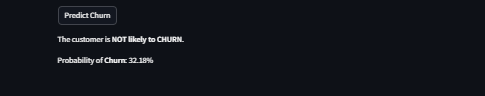

---

## **Predictive Model Conclusion**

- F2 Score dari model final berhasil mencapai angka **94%** pada data set test(validasi) yang dimana angka tersebut cukup tinggi sehingga hasil prediksi dapat diandalkan. Model dilatih dengan dataset yang telah dibersihkan dari outliers dan fitur yang telah diseleksi, serta menggunakan oversampling sebagai metode resampling

- Berdasarkan simulasi kasus dari hasil prediksi model ini, kesalahan prediksi menyebabkan 11 pelanggan akan meninggalkan platform kita, dan 9 pelanggan akan mendapatkan program retensi yang seharusnya tidak diberikan. Hal tersebut menyebabkan perusahaan harus mengeluarkan biaya sebesar **819.2 $**. Namun secara keseluruhan, dengan adanya 'tools' untuk memprediksi customer yang akan churn, perusahaan dapat menghemat perkiraan pengeluaran sebesar **8.999 \$** jika disimulasikan pada kasus data 1125 customer.

- **Tenure & CashbackAmount** adalah 2 fitur dengan importance tertinggi, yang dimana kedua fitur tersebut sangat mempengaruhi hasil dari prediksi.

- Model ini dilatih dengan dataset dengan outliers yang dihilangkan, dengan 15 fitur, dan dengan jumlah data sekitar 5000 data sehingga jika model ini diprediksi dengan karakteristik yang berbeda, akan memungkinkan perbedaan performa dari model.

- Berdasarkan probabilitas churn dari setiap customer, terdapat 131 customer dari (1125) yang memiliki tingkat probabilitas yang tinggi (diatas 80%).

- Dengan adanya interface model, user yang tidak memiliki pengetahuan coding juga dapat memanfaatkan model ini secara langsung, walaupun terbatas (harus menginput banyak kombinasi feature jika ingin memprediksi banyak customer). Divisi lain di perusahaan ini juga dapat memanfaatkan model ini jika sedang berhubungan dengan customer dan ingin mengecek dengan cepat apakah customer ini perlu diberi upaya retensi atau tidak.


## **Recomendation**

**Business Perspective**

- Customer dengan Tenure dan Cashback rendah cenderung memiliki probabilitas yang tinggi untuk churn. Hal tersebut dapat dicegah dengan mengadakan loyalty program, kupon pelanggan baru, dan segmentasi untuk customer dengan cashback rendah.

- Customer dengan probabilitas churn yang tinggi dapat diberikan resource retensi yang lebih agar dapat meredam potensi customer tersebut menginginkan untuk meninggalkan platform kita. Dapat dilakukan analisa lebih lanjut untuk 131 customer ini dan mencari pola - pola yang dapat memberikan wawasan dalam penentuan treatment retensi yang akan diberikan

**Model Perspective**

- Data yang tersedia sangat imbalance (kelas minoritas 17%) dan jumlah rows dari keselurhan data hanya sekitar 5000. Perlu dilakukan pengambilan data kembali untuk memperkaya *resource* kita sehingga dapat membangun model yang lebih baik lagi.

- Pada proses konstruksi model ini, kita membandingkan 5 tipe algoritma machine learning. Untuk dimasa yang akan datang dapat dicoba untuk mencoba fitting dengan algoritma - algoritma machine learning lainnya seperti ANN ataupun Ensemble Learning.

- Menambahkan metrics Customer Lifetime Value pada dataset. Dengan mengetahui nilai CLV pada customer yang akan churn, kita dapat mempertimbangkan apakah customer tersebut adalah high-value customer atau low-value customer (apakah layak untuk dipertahankan).



---

In [ ]:
import pickle

#pickle.dump(model_pipeline_rf, open('finalmodel_finpro.sav', 'wb'))